# DxA Olympics 2023 Final Case

### in this case i'm excepting the university counts and young peoples in districts and office counts and costs gonna be effective in this problem 

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [3]:
train = pd.read_excel("../data/DxA23' Veri Seti.xlsx", sheet_name=["İlçe Bazlı Maliyetler", "Mahalle Bazlı Nüfus Bilgisi", "BrewStation Lokasyonları"])

In [4]:
df_maliyet = train['İlçe Bazlı Maliyetler']
df_nufüs = train['Mahalle Bazlı Nüfus Bilgisi']
df_brew = train['BrewStation Lokasyonları']

In [5]:
df_nufüs.tail()

#         İLÇE     MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)   NÜFUS  \
952  953.0  Zeytinburnu  Kazlıçeşme                       973.0  2078.0   
953  954.0  Zeytinburnu     Maltepe                       807.0  2592.0   
954    NaN          NaN         NaN                         NaN     NaN   
955    NaN          NaN         NaN                         NaN     NaN   
956    NaN          NaN         NaN                         NaN     NaN   

     YÜZÖLÇÜMÜ(KM2)  Unnamed: 6  Unnamed: 7  Unnamed: 8  
952             2.1         NaN         NaN         NaN  
953             3.2         NaN         NaN         NaN  
954             NaN         NaN         NaN         NaN  
955             NaN         NaN         NaN         NaN  
956             NaN         NaN         NaN      1348.5

### removing unnecessary rows and columns

In [6]:
df_nufüs = df_nufüs.iloc[:954, 1:6]

In [7]:
df_nufüs.tail()


İLÇE       MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
949  Zeytinburnu     Beştelsiz                     41357.0  23926.0   
950  Zeytinburnu    Seyitnizam                     19385.0  24113.0   
951  Zeytinburnu  Merkezefendi                     17433.0  23742.0   
952  Zeytinburnu    Kazlıçeşme                       973.0   2078.0   
953  Zeytinburnu       Maltepe                       807.0   2592.0   

     YÜZÖLÇÜMÜ(KM2)  
949            0.58  
950            1.20  
951            1.40  
952            2.10  
953            3.20

In [8]:
df_brew.tail()


#     ŞEHİR                                         AÇIK ADRES  \
274  275  İSTANBUL  KazlıÇeşme Mah. Kennedy Caddesi, No:54 C Blok ...   
275  276  İSTANBUL  Kucuksu Cad. No:60 Magaza No: 1B-3 Orya Park Ü...   
276  277  İSTANBUL  Yeşilköy Mah. İstasyon Cad. Hemera İş merkezi ...   
277  278  İSTANBUL  Levent Mahallesi, Çamlık Sok. Yapı Kredi Plaza...   
278  279  İSTANBUL  Ortaköy Mah. Barbaros Bulvarı Kavşağı Zorlu Ce...   

            İLÇE     MAHALLE  
274  ZEYTİNBURNU  KAZLIÇEŞME  
275     ÜMRANİYE     İNKILAP  
276     BAKIRKÖY    YEŞİLKÖY  
277     BEŞİKTAŞ      LEVENT  
278     BEŞİKTAŞ     ORTAKÖY

In [9]:
df_maliyet.tail()


#         İLÇE  KAHVE DÜKKANI AÇMA MALİYETİ
34  35        ŞİŞLİ                       543000
35  36        TUZLA                       294000
36  37     ÜMRANİYE                       372000
37  38      ÜSKÜDAR                       393000
38  39  ZEYTİNBURNU                       360000

In [10]:
df_nufüs["İLÇE"] = df_nufüs["İLÇE"].str.replace('i', 'İ').str.upper()

In [11]:
df_nufüs.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              Anadolu                     21607.0  33177.0   
1  ARNAVUTKÖY           Yunus Emre                     14919.0  16085.0   
2  ARNAVUTKÖY     Boğazköy Atatürk                     11965.0   7726.0   
3  ARNAVUTKÖY  Arnavutköy İslambey                     11923.0  18832.0   
4  ARNAVUTKÖY   Mustafa Kemal Paşa                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  
0            1.50  
1            1.10  
2            0.65  
3            1.60  
4            1.30

### fixing eyüp district

In [13]:
df_nufüs.loc[df_nufüs['İLÇE'] == 'EYÜP', 'İLÇE'] = 'EYÜPSULTAN'

### merging tables

In [16]:
df_nufüs_maliyet = df_nufüs.merge(df_maliyet.iloc[:,1:], on="İLÇE", how="left")

In [17]:
df_nufüs_maliyet.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              Anadolu                     21607.0  33177.0   
1  ARNAVUTKÖY           Yunus Emre                     14919.0  16085.0   
2  ARNAVUTKÖY     Boğazköy Atatürk                     11965.0   7726.0   
3  ARNAVUTKÖY  Arnavutköy İslambey                     11923.0  18832.0   
4  ARNAVUTKÖY   Mustafa Kemal Paşa                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ  
0            1.50                       201000  
1            1.10                       201000  
2            0.65                       201000  
3            1.60                       201000  
4            1.30                       201000

In [19]:
df_nufüs_maliyet[df_nufüs_maliyet["MAHALLE"]=="Cumhuriyet"]


İLÇE     MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
91   BAHÇELİEVLER  Cumhuriyet                     59967.0  41720.0   
187        BEYKOZ  Cumhuriyet                       186.0   1966.0   
205    BEYLİKDÜZÜ  Cumhuriyet                     17975.0  21674.0   
267  BÜYÜKÇEKMECE  Cumhuriyet                      3195.0   7553.0   
323      ÇEKMEKÖY  Cumhuriyet                     27033.0  12709.0   
374      ESENYURT  Cumhuriyet                     41283.0  14369.0   
565        KARTAL  Cumhuriyet                     14612.0  21609.0   
580  KÜÇÜKÇEKMECE  Cumhuriyet                     38556.0  51065.0   
675       SARIYER  Cumhuriyet                      9800.0  11247.0   
769       SİLİVRİ  Cumhuriyet                      2073.0   7442.0   
819         ŞİŞLİ  Cumhuriyet                     19941.0   7255.0   
850    SULTANGAZİ  Cumhuriyet                     20167.0  14819.0   
909       ÜSKÜDAR  Cumhuriyet                     42304.0  36237.0   

     YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ  
91             0.70                       264000  
187           10.60                       363000  
205            1.20                       291000  
267            2.40                       267000  
323            0.47                       312000  
374            0.35                       246000  
565            1.50                       363000  
580            1.30                       315000  
675            1.10                       819000  
769            3.60                       186000  
819            0.36                       543000  
850            0.73                       231000  
909            0.86                       393000

In [20]:
df_nufüs_maliyet_merged = df_nufüs_maliyet.copy()

In [21]:
df_nufüs_maliyet_merged["MAHALLE"] = df_nufüs_maliyet_merged["MAHALLE"].str.replace('i', 'İ').str.upper()


In [22]:
df_nufüs_maliyet_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ  
0            1.50                       201000  
1            1.10                       201000  
2            0.65                       201000  
3            1.60                       201000  
4            1.30                       201000

In [24]:
df_nufüs_maliyet_brew_merged = df_nufüs_maliyet_merged.merge(df_brew.iloc[:,2:], on=["İLÇE", "MAHALLE"], how="left")

In [25]:
df_nufüs_maliyet_brew_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ AÇIK ADRES  
0            1.50                       201000        NaN  
1            1.10                       201000        NaN  
2            0.65                       201000        NaN  
3            1.60                       201000        NaN  
4            1.30                       201000        NaN

In [27]:
df_nufüs_maliyet_brew_merged[df_nufüs_maliyet_brew_merged["AÇIK ADRES"].isna()==False][:10]

İLÇE         MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
26  ARNAVUTKÖY       TAYAKADIN                       149.0   5242.0   
27  ARNAVUTKÖY       TAYAKADIN                       149.0   5242.0   
28  ARNAVUTKÖY       TAYAKADIN                       149.0   5242.0   
29  ARNAVUTKÖY       TAYAKADIN                       149.0   5242.0   
50    ATAŞEHİR       İÇERENKÖY                     21205.0  76344.0   
51    ATAŞEHİR       İÇERENKÖY                     21205.0  76344.0   
53    ATAŞEHİR       YENİSAHRA                     16164.0  11428.0   
55    ATAŞEHİR  KÜÇÜKBAKKALKÖY                     12777.0  29032.0   
56    ATAŞEHİR  KÜÇÜKBAKKALKÖY                     12777.0  29032.0   
57    ATAŞEHİR  KÜÇÜKBAKKALKÖY                     12777.0  29032.0   

    YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ  \
26           35.30                       201000   
27           35.30                       201000   
28           35.30                       201000   
29           35.30                       201000   
50            3.60                       486000   
51            3.60                       486000   
53            0.71                       486000   
55            2.30                       486000   
56            2.30                       486000   
57            2.30                       486000   

                                           AÇIK ADRES  
26  New Airport International E31: Tayakadın Mahal...  
27  Tayakadın Mahallesi, Terminal Caddesi. Havalim...  
28  Tayakadın Mahallesi, Terminal Caddesi.Havalima...  
29  Tayakadın Mahallesi, Terminal Caddesi. Havalim...  
50  Kayışdağı Caddesi No:32 Acıbadem Üniversitesi,...  
51  Icerenkoy Mah. Cayir Caddesi, No:1 City's Kozy...  
53  İstiklal Sok. No:10/4 Optimum AVM Z61 Yenisahr...  
55  Kucukbakkalkoy Mah. Vedat Gunyol Cad. No.36 At...  
56  Küçükbakkalkoy Mahallesi Kayısdagi Caddesi All...  
57  Küçükbakkalköy  Mah. Dudullu Yolu Cad. No: 25/...

In [29]:
df_nufüs_maliyet_brew_merged.shape

(1062, 7)

In [32]:
df_map_acibadem = df_nufüs_maliyet_brew_merged[df_nufüs_maliyet_brew_merged["MAHALLE"]=="ACIBADEM"]
df_map_acibadem.head()


İLÇE   MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  YÜZÖLÇÜMÜ(KM2)  \
564   KADIKÖY  ACIBADEM                     20983.0  30549.0             1.5   
565   KADIKÖY  ACIBADEM                     20983.0  30549.0             1.5   
1028  ÜSKÜDAR  ACIBADEM                     15154.0  24747.0             1.6   
1029  ÜSKÜDAR  ACIBADEM                     15154.0  24747.0             1.6   
1030  ÜSKÜDAR  ACIBADEM                     15154.0  24747.0             1.6   

      KAHVE DÜKKANI AÇMA MALİYETİ  \
564                        567000   
565                        567000   
1028                       393000   
1029                       393000   
1030                       393000   

                                             AÇIK ADRES  
564   Acıbadem Mahallesi Acıbadem Caddesi Kristal Ap...  
565    Tekin Sokak No:8, Acıbadem Mah. Kadıköy/İstanbul  
1028  Acibadem Mah. Acibadem Cad. No:190 Uskudar,Ist...  
1029  Akasya Acıbadem, Acıbadem Mh. Çeçen Sokak, Aka...  
1030  ACIBADEM MAH. ÇEÇEN SOK. AKASYA AVM Apt. No: 2...

In [33]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium

geolocator = Nominatim(user_agent="my_app")

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

df_map_acibadem['location'] = df_map_acibadem['MAHALLE'] + ', ' + df_map_acibadem['İLÇE'] + ', Istanbul'
df_map_acibadem['point'] = df_map_acibadem['location'].apply(geocode).apply(lambda loc: tuple(loc.point) if loc else None)

df_map_acibadem.head()

c:\Users\Furka\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\Users\Furka\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


İLÇE   MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  YÜZÖLÇÜMÜ(KM2)  \
564   KADIKÖY  ACIBADEM                     20983.0  30549.0             1.5   
565   KADIKÖY  ACIBADEM                     20983.0  30549.0             1.5   
1028  ÜSKÜDAR  ACIBADEM                     15154.0  24747.0             1.6   
1029  ÜSKÜDAR  ACIBADEM                     15154.0  24747.0             1.6   
1030  ÜSKÜDAR  ACIBADEM                     15154.0  24747.0             1.6   

      KAHVE DÜKKANI AÇMA MALİYETİ  \
564                        567000   
565                        567000   
1028                       393000   
1029                       393000   
1030                       393000   

                                             AÇIK ADRES  \
564   Acıbadem Mahallesi Acıbadem Caddesi Kristal Ap...   
565    Tekin Sokak No:8, Acıbadem Mah. Kadıköy/İstanbul   
1028  Acibadem Mah. Acibadem Cad. No:190 Uskudar,Ist...   
1029  Akasya Acıbadem, Acıbadem Mh. Çeçen Sokak, Aka...   
1030  ACIBADEM MAH. ÇEÇEN SOK. AKASYA AVM Apt. No: 2...   

                         location                                  point  
564   ACIBADEM, KADIKÖY, Istanbul  (41.0017412, 29.038702176120772, 0.0)  
565   ACIBADEM, KADIKÖY, Istanbul  (41.0017412, 29.038702176120772, 0.0)  
1028  ACIBADEM, ÜSKÜDAR, Istanbul          (41.0062328, 29.0528941, 0.0)  
1029  ACIBADEM, ÜSKÜDAR, Istanbul          (41.0062328, 29.0528941, 0.0)  
1030  ACIBADEM, ÜSKÜDAR, Istanbul          (41.0062328, 29.0528941, 0.0)

In [34]:
istanbul_location = geocode('Istanbul, Turkey')
map = folium.Map(location=[istanbul_location.latitude, istanbul_location.longitude], zoom_start=12)

for index, row in df_map_acibadem.iterrows():
    if row['point']:
        folium.Marker(location=[row['point'][0], row['point'][1]]).add_to(map)

map

In [35]:
df_nufüs_maliyet_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ  
0            1.50                       201000  
1            1.10                       201000  
2            0.65                       201000  
3            1.60                       201000  
4            1.30                       201000

In [36]:
df_nufüs_maliyet_brew_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ AÇIK ADRES  
0            1.50                       201000        NaN  
1            1.10                       201000        NaN  
2            0.65                       201000        NaN  
3            1.60                       201000        NaN  
4            1.30                       201000        NaN

In [37]:
df_nufüs_maliyet_merged.to_csv("nufüs_maliyet_merged.csv",index=False)

In [157]:
df_nufüs_maliyet_brew_merged.to_csv("nufüs_maliyet_brew_merged.csv", index=False)


### Adding some external data

In [37]:
df_sosyo_ekonomik = pd.read_excel("../data/lcelerin-sosyo-ekonomik-gelismislik-siralamasi.xlsx")
df_sosyo_ekonomik["İLÇE"] = df_sosyo_ekonomik["İLÇE"].str.replace('i', 'İ').str.upper()
df_sosyo_ekonomik.head()

İLÇE  Genel Sıralama  il içindeki Sıralama   Skor  Kademe
0     ŞİŞLİ               1                     1  6.959       1
1  BEŞİKTAŞ               3                     2  5.940       1
2   KADIKÖY               4                     3  4.910       1
3  BAKIRKÖY               6                     4  4.465       1
4     FATİH               7                     5  4.226       1

In [38]:
df_genc_nufus = pd.read_excel("../data/İstanbul metropoliten alanında kadın ve erkek genç nüfusun (15-29 yaş) ilçelere.xlsx")
df_genc_nufus["İLÇE"] = df_genc_nufus["İLÇE"].str.replace('i', 'İ').str.upper()
df_genc_nufus.head()

İLÇE  İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
0      ESENYURT                                           6.2   
1  KÜÇÜKÇEKMECE                                           5.1   
2      BAĞCILAR                                           4.8   
3        PENDİK                                           4.7   
4      ÜMRANİYE                                           4.6   

   İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
0                                                6.8       
1                                                5.2       
2                                                5.2       
3                                                4.7       
4                                                4.5       

   15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
0                                               25.2   
1                                               23.5   
2                                               25.1   
3                                               22.8   
4                                               22.5   

   15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı  \
0                                               12.4         
1                                               11.6         
2                                               12.4         
3                                               11.3         
4                                               11.2         

   15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı  
0                                               12.8        
1                                               11.9        
2                                               12.8        
3                                               11.5        
4                                               11.3

In [39]:
df_üniversite_sayisi = pd.read_excel("../data/ilçe-üniversite-sayısı.xlsx")
df_üniversite_sayisi.head()

İLÇE  Üniversite Sayısı
0      ESENYURT                  0
1      BAĞCILAR                  0
2  KÜÇÜKÇEKMECE                  2
3    SULTANGAZİ                  0
4        PENDİK                  0

In [40]:
df_yüksekokul = pd.read_excel("../data/Yüksekokul ve Fakülteden Mezun Nüfusun İlçelere Dağılımı.xlsx")
df_yüksekokul.head()

İLÇE  Yüksekokul Mezunu Sayısı
0       KADIKÖY                    167306
1      ÜMRANİYE                    126413
2       ÜSKÜDAR                    121698
3       MALTEPE                    118545
4  KÜÇÜKÇEKMECE                    116664

In [41]:
df_egitim = pd.read_excel("../data/+6 Yaş Okuma Yazma Bilmeyen Nüfusun İlçelere Dağılımı.xlsx")
df_egitim.head()

İLÇE  Okuma Yazma\nBilmeyen Sayısı
0      ESENYURT                         14834
1      BAĞCILAR                         13562
2  KÜÇÜKÇEKMECE                         12380
3    SULTANGAZİ                         11177
4        PENDİK                         10726

In [42]:
df_nufüs_maliyet_brew_merged = df_nufüs_maliyet_brew_merged.merge(df_sosyo_ekonomik, on="İLÇE", how="left")
df_nufüs_maliyet_brew_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ AÇIK ADRES  Genel Sıralama  \
0            1.50                       201000        NaN             167   
1            1.10                       201000        NaN             167   
2            0.65                       201000        NaN             167   
3            1.60                       201000        NaN             167   
4            1.30                       201000        NaN             167   

   il içindeki Sıralama   Skor  Kademe  
0                    36  0.771       2  
1                    36  0.771       2  
2                    36  0.771       2  
3                    36  0.771       2  
4                    36  0.771       2

In [43]:
df_nufüs_maliyet_merged = df_nufüs_maliyet_merged.merge(df_sosyo_ekonomik, on="İLÇE", how="left")
df_nufüs_maliyet_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ  Genel Sıralama  \
0            1.50                       201000             167   
1            1.10                       201000             167   
2            0.65                       201000             167   
3            1.60                       201000             167   
4            1.30                       201000             167   

   il içindeki Sıralama   Skor  Kademe  
0                    36  0.771       2  
1                    36  0.771       2  
2                    36  0.771       2  
3                    36  0.771       2  
4                    36  0.771       2

In [44]:
df_nufüs_maliyet_brew_merged = df_nufüs_maliyet_brew_merged.merge(df_genc_nufus, on="İLÇE", how="left")
df_nufüs_maliyet_brew_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ AÇIK ADRES  Genel Sıralama  \
0            1.50                       201000        NaN             167   
1            1.10                       201000        NaN             167   
2            0.65                       201000        NaN             167   
3            1.60                       201000        NaN             167   
4            1.30                       201000        NaN             167   

   il içindeki Sıralama   Skor  Kademe  \
0                    36  0.771       2   
1                    36  0.771       2   
2                    36  0.771       2   
3                    36  0.771       2   
4                    36  0.771       2   

   İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
0                                           1.9   
1                                           1.9   
2                                           1.9   
3                                           1.9   
4                                           1.9   

   İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
0                                                2.1       
1                                                2.1       
2                                                2.1       
3                                                2.1       
4                                                2.1       

   15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
0                                               25.6   
1                                               25.6   
2                                               25.6   
3                                               25.6   
4                                               25.6   

   15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı  \
0                                               12.7         
1                                               12.7         
2                                               12.7         
3                                               12.7         
4                                               12.7         

   15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı  
0                                               12.9        
1                                               12.9        
2                                               12.9        
3                                               12.9        
4                                               12.9

In [45]:
df_nufüs_maliyet_merged = df_nufüs_maliyet_merged.merge(df_genc_nufus, on="İLÇE", how="left")
df_nufüs_maliyet_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ  Genel Sıralama  \
0            1.50                       201000             167   
1            1.10                       201000             167   
2            0.65                       201000             167   
3            1.60                       201000             167   
4            1.30                       201000             167   

   il içindeki Sıralama   Skor  Kademe  \
0                    36  0.771       2   
1                    36  0.771       2   
2                    36  0.771       2   
3                    36  0.771       2   
4                    36  0.771       2   

   İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
0                                           1.9   
1                                           1.9   
2                                           1.9   
3                                           1.9   
4                                           1.9   

   İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
0                                                2.1       
1                                                2.1       
2                                                2.1       
3                                                2.1       
4                                                2.1       

   15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
0                                               25.6   
1                                               25.6   
2                                               25.6   
3                                               25.6   
4                                               25.6   

   15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı  \
0                                               12.7         
1                                               12.7         
2                                               12.7         
3                                               12.7         
4                                               12.7         

   15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı  
0                                               12.9        
1                                               12.9        
2                                               12.9        
3                                               12.9        
4                                               12.9

In [46]:
df_nufüs_maliyet_brew_merged = df_nufüs_maliyet_brew_merged.merge(df_üniversite_sayisi, on="İLÇE", how="left")
df_nufüs_maliyet_brew_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ AÇIK ADRES  Genel Sıralama  \
0            1.50                       201000        NaN             167   
1            1.10                       201000        NaN             167   
2            0.65                       201000        NaN             167   
3            1.60                       201000        NaN             167   
4            1.30                       201000        NaN             167   

   il içindeki Sıralama   Skor  Kademe  \
0                    36  0.771       2   
1                    36  0.771       2   
2                    36  0.771       2   
3                    36  0.771       2   
4                    36  0.771       2   

   İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
0                                           1.9   
1                                           1.9   
2                                           1.9   
3                                           1.9   
4                                           1.9   

   İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
0                                                2.1       
1                                                2.1       
2                                                2.1       
3                                                2.1       
4                                                2.1       

   15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
0                                               25.6   
1                                               25.6   
2                                               25.6   
3                                               25.6   
4                                               25.6   

   15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı  \
0                                               12.7         
1                                               12.7         
2                                               12.7         
3                                               12.7         
4                                               12.7         

   15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı  Üniversite Sayısı  
0                                               12.9                        0  
1                                               12.9                        0  
2                                               12.9                        0  
3                                               12.9                        0  
4                                               12.9                        0

In [47]:
df_nufüs_maliyet_merged = df_nufüs_maliyet_merged.merge(df_üniversite_sayisi, on="İLÇE", how="left")
df_nufüs_maliyet_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ  Genel Sıralama  \
0            1.50                       201000             167   
1            1.10                       201000             167   
2            0.65                       201000             167   
3            1.60                       201000             167   
4            1.30                       201000             167   

   il içindeki Sıralama   Skor  Kademe  \
0                    36  0.771       2   
1                    36  0.771       2   
2                    36  0.771       2   
3                    36  0.771       2   
4                    36  0.771       2   

   İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
0                                           1.9   
1                                           1.9   
2                                           1.9   
3                                           1.9   
4                                           1.9   

   İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
0                                                2.1       
1                                                2.1       
2                                                2.1       
3                                                2.1       
4                                                2.1       

   15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
0                                               25.6   
1                                               25.6   
2                                               25.6   
3                                               25.6   
4                                               25.6   

   15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı  \
0                                               12.7         
1                                               12.7         
2                                               12.7         
3                                               12.7         
4                                               12.7         

   15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı  Üniversite Sayısı  
0                                               12.9                        0  
1                                               12.9                        0  
2                                               12.9                        0  
3                                               12.9                        0  
4                                               12.9                        0

In [48]:
df_nufüs_maliyet_brew_merged = df_nufüs_maliyet_brew_merged.merge(df_yüksekokul, on="İLÇE", how="left")
df_nufüs_maliyet_brew_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ AÇIK ADRES  Genel Sıralama  \
0            1.50                       201000        NaN             167   
1            1.10                       201000        NaN             167   
2            0.65                       201000        NaN             167   
3            1.60                       201000        NaN             167   
4            1.30                       201000        NaN             167   

   il içindeki Sıralama   Skor  Kademe  \
0                    36  0.771       2   
1                    36  0.771       2   
2                    36  0.771       2   
3                    36  0.771       2   
4                    36  0.771       2   

   İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
0                                           1.9   
1                                           1.9   
2                                           1.9   
3                                           1.9   
4                                           1.9   

   İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
0                                                2.1       
1                                                2.1       
2                                                2.1       
3                                                2.1       
4                                                2.1       

   15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
0                                               25.6   
1                                               25.6   
2                                               25.6   
3                                               25.6   
4                                               25.6   

   15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı  \
0                                               12.7         
1                                               12.7         
2                                               12.7         
3                                               12.7         
4                                               12.7         

   15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı  Üniversite Sayısı  \
0                                               12.9                        0   
1                                               12.9                        0   
2                                               12.9                        0   
3                                               12.9                        0   
4                                               12.9                        0   

   Yüksekokul Mezunu Sayısı  
0                     22690  
1                     22690  
2                     22690  
3                     22690  
4                     22690

In [49]:
df_nufüs_maliyet_merged = df_nufüs_maliyet_merged.merge(df_yüksekokul, on="İLÇE", how="left")
df_nufüs_maliyet_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ  Genel Sıralama  \
0            1.50                       201000             167   
1            1.10                       201000             167   
2            0.65                       201000             167   
3            1.60                       201000             167   
4            1.30                       201000             167   

   il içindeki Sıralama   Skor  Kademe  \
0                    36  0.771       2   
1                    36  0.771       2   
2                    36  0.771       2   
3                    36  0.771       2   
4                    36  0.771       2   

   İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
0                                           1.9   
1                                           1.9   
2                                           1.9   
3                                           1.9   
4                                           1.9   

   İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
0                                                2.1       
1                                                2.1       
2                                                2.1       
3                                                2.1       
4                                                2.1       

   15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
0                                               25.6   
1                                               25.6   
2                                               25.6   
3                                               25.6   
4                                               25.6   

   15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı  \
0                                               12.7         
1                                               12.7         
2                                               12.7         
3                                               12.7         
4                                               12.7         

   15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı  Üniversite Sayısı  \
0                                               12.9                        0   
1                                               12.9                        0   
2                                               12.9                        0   
3                                               12.9                        0   
4                                               12.9                        0   

   Yüksekokul Mezunu Sayısı  
0                     22690  
1                     22690  
2                     22690  
3                     22690  
4                     22690

In [50]:
df_nufüs_maliyet_brew_merged = df_nufüs_maliyet_brew_merged.merge(df_egitim, on="İLÇE", how="left")
df_nufüs_maliyet_brew_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ AÇIK ADRES  Genel Sıralama  \
0            1.50                       201000        NaN             167   
1            1.10                       201000        NaN             167   
2            0.65                       201000        NaN             167   
3            1.60                       201000        NaN             167   
4            1.30                       201000        NaN             167   

   il içindeki Sıralama   Skor  Kademe  \
0                    36  0.771       2   
1                    36  0.771       2   
2                    36  0.771       2   
3                    36  0.771       2   
4                    36  0.771       2   

   İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
0                                           1.9   
1                                           1.9   
2                                           1.9   
3                                           1.9   
4                                           1.9   

   İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
0                                                2.1       
1                                                2.1       
2                                                2.1       
3                                                2.1       
4                                                2.1       

   15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
0                                               25.6   
1                                               25.6   
2                                               25.6   
3                                               25.6   
4                                               25.6   

   15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı  \
0                                               12.7         
1                                               12.7         
2                                               12.7         
3                                               12.7         
4                                               12.7         

   15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı  Üniversite Sayısı  \
0                                               12.9                        0   
1                                               12.9                        0   
2                                               12.9                        0   
3                                               12.9                        0   
4                                               12.9                        0   

   Yüksekokul Mezunu Sayısı  Okuma Yazma\nBilmeyen Sayısı  
0                     22690                          6291  
1                     22690                          6291  
2                     22690                          6291  
3                     22690                          6291  
4                     22690                          6291

In [51]:
df_nufüs_maliyet_merged = df_nufüs_maliyet_merged.merge(df_egitim, on="İLÇE", how="left")
df_nufüs_maliyet_merged.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1  ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2  ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3  ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4  ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ  Genel Sıralama  \
0            1.50                       201000             167   
1            1.10                       201000             167   
2            0.65                       201000             167   
3            1.60                       201000             167   
4            1.30                       201000             167   

   il içindeki Sıralama   Skor  Kademe  \
0                    36  0.771       2   
1                    36  0.771       2   
2                    36  0.771       2   
3                    36  0.771       2   
4                    36  0.771       2   

   İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
0                                           1.9   
1                                           1.9   
2                                           1.9   
3                                           1.9   
4                                           1.9   

   İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
0                                                2.1       
1                                                2.1       
2                                                2.1       
3                                                2.1       
4                                                2.1       

   15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
0                                               25.6   
1                                               25.6   
2                                               25.6   
3                                               25.6   
4                                               25.6   

   15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı  \
0                                               12.7         
1                                               12.7         
2                                               12.7         
3                                               12.7         
4                                               12.7         

   15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı  Üniversite Sayısı  \
0                                               12.9                        0   
1                                               12.9                        0   
2                                               12.9                        0   
3                                               12.9                        0   
4                                               12.9                        0   

   Yüksekokul Mezunu Sayısı  Okuma Yazma\nBilmeyen Sayısı  
0                     22690                          6291  
1                     22690                          6291  
2                     22690                          6291  
3                     22690                          6291  
4                     22690                          6291

In [52]:
df_nufüs_maliyet_merged.to_csv("nufüs_maliyet_merged_outsource_final.csv", index=False)

In [53]:
df_nufüs_maliyet_brew_merged.to_csv("nufüs_maliyet_brew_merged_outsource_final.csv", index=False)

In [54]:
df_nufüs_maliyet_brew_merged.shape

(1062, 19)

In [55]:
df_nufüs_maliyet_merged.shape

(954, 18)

### Grouping data for analyzing every group. Grouping like data with brew stations by district and neighborhood, data without brew stations by district and neighborhood and istanbul general by district and neighborhood

In [56]:
feature_aggs = {
    'NÜFUS YOĞUNLUĞU (KİŞİ/KM2)' : ['max', 'min', 'sum'],
    'NÜFUS' : ['max', 'min', 'sum'],
    'YÜZÖLÇÜMÜ(KM2)' : ['max', 'min', 'sum'],
    'KAHVE DÜKKANI AÇMA MALİYETİ': ['max'],
    'Genel Sıralama': ['max'],
    'il içindeki Sıralama': ['max'],
    'Skor': ['max'],
    'Kademe': ['max'],
    'İlçe toplam nüfusun\nİstanbul içindeki\npayı': ['max'],
    'İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı': ['max'],
    '15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı': ['max'],
    '15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı': ['max'],
    '15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı': ['max'],
    'Üniversite Sayısı': ['max'],
    'Yüksekokul Mezunu Sayısı': ['max'],
    'Okuma Yazma\nBilmeyen Sayısı': ['max']}

### splitting like istanbul general - istanbul with brew - istanbul without brew

In [57]:
df_brew_analyze = df_nufüs_maliyet_brew_merged[df_nufüs_maliyet_brew_merged["AÇIK ADRES"].isna()==False].drop_duplicates()

In [58]:
df_istanbul = df_nufüs_maliyet_merged.copy()


In [61]:
df_without_stations = df_nufüs_maliyet_brew_merged[df_nufüs_maliyet_brew_merged["AÇIK ADRES"].isna()==True]


### grouping istanbul without brew by district and neighbourhood

In [64]:
df_without_stations_district_only = df_without_stations.drop(columns=["MAHALLE","AÇIK ADRES"])


In [66]:
df_without_stations_district_only.duplicated().sum()

0

In [67]:
df_without_stations_district_only_agg = df_without_stations_district_only.groupby('İLÇE').agg(feature_aggs)
df_without_stations_district_only_agg.columns = ['İLÇE_' + '_'.join(col) for col in df_without_stations_district_only_agg.columns]
df_without_stations_district_only_agg.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
İLÇE                                                
ARNAVUTKÖY                                21607.0   
ATAŞEHİR                                  31612.0   
AVCILAR                                   50617.0   
BAHÇELİEVLER                              82759.0   
BAKIRKÖY                                  29809.0   

              İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
İLÇE                                                
ARNAVUTKÖY                                   13.7   
ATAŞEHİR                                   5825.0   
AVCILAR                                    1800.0   
BAHÇELİEVLER                               7805.0   
BAKIRKÖY                                   2622.0   

              İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  \
İLÇE                                                                
ARNAVUTKÖY                               120863.2         33177.0   
ATAŞEHİR                                 272926.0         41757.0   
AVCILAR                                  204276.0         71783.0   
BAHÇELİEVLER                             550502.0         85464.0   
BAKIRKÖY                                 161501.0         37778.0   

              İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
İLÇE                                                                    
ARNAVUTKÖY             413.0        256413.0                     41.1   
ATAŞEHİR             10637.0        244018.0                      3.8   
AVCILAR              22496.0        360852.0                     12.5   
BAHÇELİEVLER         26191.0        536622.0                      4.4   
BAKIRKÖY              1667.0        119911.0                      2.1   

              İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
İLÇE                                                             
ARNAVUTKÖY                       0.35                   415.18   
ATAŞEHİR                         0.42                    13.05   
AVCILAR                          0.86                    27.79   
BAHÇELİEVLER                     0.53                    13.47   
BAKIRKÖY                         0.19                     8.97   

              İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
İLÇE                                                                          
ARNAVUTKÖY                                  201000                      167   
ATAŞEHİR                                    486000                        9   
AVCILAR                                     252000                       66   
BAHÇELİEVLER                                264000                       28   
BAKIRKÖY                                    525000                        6   

              İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
İLÇE                                                                          
ARNAVUTKÖY                               36          0.771                2   
ATAŞEHİR                                  6          3.545                1   
AVCILAR                                  29          1.640                1   
BAHÇELİEVLER                             17          2.423                1   
BAKIRKÖY                                  4          4.465                1   

              İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
İLÇE                                                                  
ARNAVUTKÖY                                                  1.9       
ATAŞEHİR                                                    2.7       
AVCILAR                                                     2.8       
BAHÇELİEVLER                                                3.8       
BAKIRKÖY                                                    1.5       

              İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
İLÇE                                                                           
ARNAVUTKÖY                                   

In [68]:
df_without_stations_neighborhood_only = df_without_stations.drop(columns=["İLÇE","AÇIK ADRES"])


In [69]:
df_without_stations_neighborhood_only.head()

MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  YÜZÖLÇÜMÜ(KM2)  \
0              ANADOLU                     21607.0  33177.0            1.50   
1           YUNUS EMRE                     14919.0  16085.0            1.10   
2     BOĞAZKÖY ATATÜRK                     11965.0   7726.0            0.65   
3  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0            1.60   
4   MUSTAFA KEMAL PAŞA                      9630.0  12585.0            1.30   

   KAHVE DÜKKANI AÇMA MALİYETİ  Genel Sıralama  il içindeki Sıralama   Skor  \
0                       201000             167                    36  0.771   
1                       201000             167                    36  0.771   
2                       201000             167                    36  0.771   
3                       201000             167                    36  0.771   
4                       201000             167                    36  0.771   

   Kademe  İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
0       2                                           1.9   
1       2                                           1.9   
2       2                                           1.9   
3       2                                           1.9   
4       2                                           1.9   

   İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
0                                                2.1       
1                                                2.1       
2                                                2.1       
3                                                2.1       
4                                                2.1       

   15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
0                                               25.6   
1                                               25.6   
2                                               25.6   
3                                               25.6   
4                                               25.6   

   15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı  \
0                                               12.7         
1                                               12.7         
2                                               12.7         
3                                               12.7         
4                                               12.7         

   15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı  Üniversite Sayısı  \
0                                               12.9                        0   
1                                               12.9                        0   
2                                               12.9                        0   
3                                               12.9                        0   
4                                               12.9                        0   

   Yüksekokul Mezunu Sayısı  Okuma Yazma\nBilmeyen Sayısı  
0                     22690                          6291  
1                     22690                          6291  
2                     22690                          6291  
3                     22690                          6291  
4                     22690                          6291

In [70]:
df_without_stations_neighborhood_only.duplicated().sum()

0

In [71]:
df_without_stations_neighborhood_only_agg = df_without_stations_neighborhood_only.groupby('MAHALLE').agg(feature_aggs)
df_without_stations_neighborhood_only_agg.columns = ['İLÇE_' + '_'.join(col) for col in df_without_stations_neighborhood_only_agg.columns]
df_without_stations_neighborhood_only_agg.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
MAHALLE                                                         
19 MAYIS                                               1106.0   
50. YIL                                               63763.0   
75. YIL                                               33237.0   
ABBASAĞA                                              36746.0   
ABDURRAHMAN NAFİZ GÜRMAN                              31476.0   

                          İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
MAHALLE                                                         
19 MAYIS                                               1106.0   
50. YIL                                               63763.0   
75. YIL                                               33237.0   
ABBASAĞA                                              36746.0   
ABDURRAHMAN NAFİZ GÜRMAN                              31476.0   

                          İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  \
MAHALLE                                                                         
19 MAYIS                                               1106.0          8337.0   
50. YIL                                               63763.0         72891.0   
75. YIL                                               33237.0         32605.0   
ABBASAĞA                                              36746.0          5288.0   
ABDURRAHMAN NAFİZ GÜRMAN                              31476.0         22696.0   

                          İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  \
MAHALLE                                                    
19 MAYIS                          8337.0          8337.0   
50. YIL                          72891.0         72891.0   
75. YIL                          32605.0         32605.0   
ABBASAĞA                          5288.0          5288.0   
ABDURRAHMAN NAFİZ GÜRMAN         22696.0         22696.0   

                          İLÇE_YÜZÖLÇÜMÜ(KM2)_max  İLÇE_YÜZÖLÇÜMÜ(KM2)_min  \
MAHALLE                                                                      
19 MAYIS                                     7.50                     7.50   
50. YIL                                      1.10                     1.10   
75. YIL                                      0.98                     0.98   
ABBASAĞA                                     0.14                     0.14   
ABDURRAHMAN NAFİZ GÜRMAN                     0.72                     0.72   

                          İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
MAHALLE                                             
19 MAYIS                                     7.50   
50. YIL                                      1.10   
75. YIL                                      0.98   
ABBASAĞA                                     0.14   
ABDURRAHMAN NAFİZ GÜRMAN                     0.72   

                          İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
MAHALLE                                                          
19 MAYIS                                                267000   
50. YIL                                                 231000   
75. YIL                                                 231000   
ABBASAĞA                                                777000   
ABDURRAHMAN NAFİZ GÜRMAN                                273000   

                          İLÇE_Genel Sıralama_max  \
MAHALLE                                             
19 MAYIS                                       51   
50. YIL                                       161   
75. YIL                                       161   
ABBASAĞA                                        3   
ABDURRAHMAN NAFİZ GÜRMAN                       50   

                          İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  \
MAHALLE                                                                  
19 MAYIS                                             25          1.891   
50. YIL                                              35          0.816   
75. YIL                                              35          0.816   
A

In [72]:
df_nufüs.head()

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0  ARNAVUTKÖY              Anadolu                     21607.0  33177.0   
1  ARNAVUTKÖY           Yunus Emre                     14919.0  16085.0   
2  ARNAVUTKÖY     Boğazköy Atatürk                     11965.0   7726.0   
3  ARNAVUTKÖY  Arnavutköy İslambey                     11923.0  18832.0   
4  ARNAVUTKÖY   Mustafa Kemal Paşa                      9630.0  12585.0   

   YÜZÖLÇÜMÜ(KM2)  
0            1.50  
1            1.10  
2            0.65  
3            1.60  
4            1.30

### total population of districts

In [73]:
df_nufüs_sum = df_nufüs.drop(columns=["MAHALLE","NÜFUS YOĞUNLUĞU (KİŞİ/KM2)"]).groupby("İLÇE").agg('sum')
df_nufüs_sum["İLÇE NÜFUS YOĞUNLUĞU"] = df_nufüs_sum["NÜFUS"]/df_nufüs_sum["YÜZÖLÇÜMÜ(KM2)"]

In [74]:
df_nufüs_sum.head()

NÜFUS  YÜZÖLÇÜMÜ(KM2)  İLÇE NÜFUS YOĞUNLUĞU
İLÇE                                                        
ARNAVUTKÖY    261655.0          450.48            580.835997
ATAŞEHİR      423372.0           25.06          16894.333599
AVCILAR       435682.0           41.99          10375.851393
BAHÇELİEVLER  598454.0           16.67          35900.059988
BAKIRKÖY      222370.0           29.76           7472.110215

### grouping istanbul by district and neighbourhood

In [75]:
df_istanbul

İLÇE              MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
0     ARNAVUTKÖY              ANADOLU                     21607.0  33177.0   
1     ARNAVUTKÖY           YUNUS EMRE                     14919.0  16085.0   
2     ARNAVUTKÖY     BOĞAZKÖY ATATÜRK                     11965.0   7726.0   
3     ARNAVUTKÖY  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0   
4     ARNAVUTKÖY   MUSTAFA KEMAL PAŞA                      9630.0  12585.0   
..           ...                  ...                         ...      ...   
949  ZEYTİNBURNU            BEŞTELSİZ                     41357.0  23926.0   
950  ZEYTİNBURNU           SEYİTNİZAM                     19385.0  24113.0   
951  ZEYTİNBURNU         MERKEZEFENDİ                     17433.0  23742.0   
952  ZEYTİNBURNU           KAZLIÇEŞME                       973.0   2078.0   
953  ZEYTİNBURNU              MALTEPE                       807.0   2592.0   

     YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ  Genel Sıralama  \
0              1.50                       201000             167   
1              1.10                       201000             167   
2              0.65                       201000             167   
3              1.60                       201000             167   
4              1.30                       201000             167   
..              ...                          ...             ...   
949            0.58                       360000              29   
950            1.20                       360000              29   
951            1.40                       360000              29   
952            2.10                       360000              29   
953            3.20                       360000              29   

     il içindeki Sıralama   Skor  Kademe  \
0                      36  0.771       2   
1                      36  0.771       2   
2                      36  0.771       2   
3                      36  0.771       2   
4                      36  0.771       2   
..                    ...    ...     ...   
949                    18  2.382       1   
950                    18  2.382       1   
951                    18  2.382       1   
952                    18  2.382       1   
953                    18  2.382       1   

     İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
0                                             1.9   
1                                             1.9   
2                                             1.9   
3                                             1.9   
4                                             1.9   
..                                            ...   
949                                           1.8   
950                                           1.8   
951                                           1.8   
952                                           1.8   
953                                           1.8   

     İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
0                                                  2.1       
1                                                  2.1       
2                                                  2.1       
3                                                  2.1       
4                                                  2.1       
..                                                 ...       
949                                                2.1       
950                                                2.1       
951                                                2.1       
952                                                2.1       
953                                                2.1       

     15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
0                                                 25.6   
1                                                 25.6   
2                                                 25.6   
3                                                 25.6   
4                                                 25.6   

In [77]:
df_istanbul_district_only = df_istanbul.drop(columns=["MAHALLE"])


In [78]:
df_istanbul_district_only.head()

İLÇE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  YÜZÖLÇÜMÜ(KM2)  \
0  ARNAVUTKÖY                     21607.0  33177.0            1.50   
1  ARNAVUTKÖY                     14919.0  16085.0            1.10   
2  ARNAVUTKÖY                     11965.0   7726.0            0.65   
3  ARNAVUTKÖY                     11923.0  18832.0            1.60   
4  ARNAVUTKÖY                      9630.0  12585.0            1.30   

   KAHVE DÜKKANI AÇMA MALİYETİ  Genel Sıralama  il içindeki Sıralama   Skor  \
0                       201000             167                    36  0.771   
1                       201000             167                    36  0.771   
2                       201000             167                    36  0.771   
3                       201000             167                    36  0.771   
4                       201000             167                    36  0.771   

   Kademe  İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
0       2                                           1.9   
1       2                                           1.9   
2       2                                           1.9   
3       2                                           1.9   
4       2                                           1.9   

   İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
0                                                2.1       
1                                                2.1       
2                                                2.1       
3                                                2.1       
4                                                2.1       

   15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
0                                               25.6   
1                                               25.6   
2                                               25.6   
3                                               25.6   
4                                               25.6   

   15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı  \
0                                               12.7         
1                                               12.7         
2                                               12.7         
3                                               12.7         
4                                               12.7         

   15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı  Üniversite Sayısı  \
0                                               12.9                        0   
1                                               12.9                        0   
2                                               12.9                        0   
3                                               12.9                        0   
4                                               12.9                        0   

   Yüksekokul Mezunu Sayısı  Okuma Yazma\nBilmeyen Sayısı  
0                     22690                          6291  
1                     22690                          6291  
2                     22690                          6291  
3                     22690                          6291  
4                     22690                          6291

In [80]:
df_istanbul_district_only_agg = df_istanbul_district_only.groupby('İLÇE').agg(feature_aggs)
df_istanbul_district_only_agg.columns = ['İLÇE_' + '_'.join(col) for col in df_istanbul_district_only_agg.columns]
df_istanbul_district_only_agg.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
İLÇE                                                
ARNAVUTKÖY                                21607.0   
ATAŞEHİR                                  31612.0   
AVCILAR                                   50617.0   
BAHÇELİEVLER                              82759.0   
BAKIRKÖY                                  29809.0   

              İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
İLÇE                                                
ARNAVUTKÖY                                   13.7   
ATAŞEHİR                                   5825.0   
AVCILAR                                    1800.0   
BAHÇELİEVLER                               7805.0   
BAKIRKÖY                                   1794.0   

              İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  \
İLÇE                                                                
ARNAVUTKÖY                               121012.2         33177.0   
ATAŞEHİR                                 345980.0         76344.0   
AVCILAR                                  216556.0         71783.0   
BAHÇELİEVLER                             569954.0         85464.0   
BAKIRKÖY                                 212747.0         37778.0   

              İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
İLÇE                                                                    
ARNAVUTKÖY             413.0        261655.0                     41.1   
ATAŞEHİR             10637.0        423372.0                      3.8   
AVCILAR              21621.0        435682.0                     12.5   
BAHÇELİEVLER         26191.0        598454.0                      4.4   
BAKIRKÖY              1667.0        222370.0                     13.3   

              İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
İLÇE                                                             
ARNAVUTKÖY                       0.35                   450.48   
ATAŞEHİR                         0.42                    25.06   
AVCILAR                          0.86                    41.99   
BAHÇELİEVLER                     0.53                    16.67   
BAKIRKÖY                         0.19                    29.76   

              İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
İLÇE                                                                          
ARNAVUTKÖY                                  201000                      167   
ATAŞEHİR                                    486000                        9   
AVCILAR                                     252000                       66   
BAHÇELİEVLER                                264000                       28   
BAKIRKÖY                                    525000                        6   

              İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
İLÇE                                                                          
ARNAVUTKÖY                               36          0.771                2   
ATAŞEHİR                                  6          3.545                1   
AVCILAR                                  29          1.640                1   
BAHÇELİEVLER                             17          2.423                1   
BAKIRKÖY                                  4          4.465                1   

              İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
İLÇE                                                                  
ARNAVUTKÖY                                                  1.9       
ATAŞEHİR                                                    2.7       
AVCILAR                                                     2.8       
BAHÇELİEVLER                                                3.8       
BAKIRKÖY                                                    1.5       

              İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
İLÇE                                                                           
ARNAVUTKÖY                                   

In [81]:
df_istanbul_neighborhood_only = df_istanbul.drop(columns=["İLÇE"])


In [82]:
df_istanbul_neighborhood_only.head()

MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  YÜZÖLÇÜMÜ(KM2)  \
0              ANADOLU                     21607.0  33177.0            1.50   
1           YUNUS EMRE                     14919.0  16085.0            1.10   
2     BOĞAZKÖY ATATÜRK                     11965.0   7726.0            0.65   
3  ARNAVUTKÖY İSLAMBEY                     11923.0  18832.0            1.60   
4   MUSTAFA KEMAL PAŞA                      9630.0  12585.0            1.30   

   KAHVE DÜKKANI AÇMA MALİYETİ  Genel Sıralama  il içindeki Sıralama   Skor  \
0                       201000             167                    36  0.771   
1                       201000             167                    36  0.771   
2                       201000             167                    36  0.771   
3                       201000             167                    36  0.771   
4                       201000             167                    36  0.771   

   Kademe  İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
0       2                                           1.9   
1       2                                           1.9   
2       2                                           1.9   
3       2                                           1.9   
4       2                                           1.9   

   İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
0                                                2.1       
1                                                2.1       
2                                                2.1       
3                                                2.1       
4                                                2.1       

   15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
0                                               25.6   
1                                               25.6   
2                                               25.6   
3                                               25.6   
4                                               25.6   

   15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı  \
0                                               12.7         
1                                               12.7         
2                                               12.7         
3                                               12.7         
4                                               12.7         

   15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı  Üniversite Sayısı  \
0                                               12.9                        0   
1                                               12.9                        0   
2                                               12.9                        0   
3                                               12.9                        0   
4                                               12.9                        0   

   Yüksekokul Mezunu Sayısı  Okuma Yazma\nBilmeyen Sayısı  
0                     22690                          6291  
1                     22690                          6291  
2                     22690                          6291  
3                     22690                          6291  
4                     22690                          6291

In [83]:
df_istanbul_neighborhood_only.duplicated().sum()

0

In [84]:
df_istanbul_neighborhood_only_agg = df_istanbul_neighborhood_only.groupby('MAHALLE').agg(feature_aggs)
df_istanbul_neighborhood_only_agg.columns = ['İLÇE_' + '_'.join(col) for col in df_istanbul_neighborhood_only_agg.columns]
df_istanbul_neighborhood_only_agg.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
MAHALLE                                          
15 TEMMUZ                              26817.0   
19 MAYIS                               26284.0   
50. YIL                                63763.0   
75. YIL                                33237.0   
ABBASAĞA                               36746.0   

           İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
MAHALLE                                          
15 TEMMUZ                              26817.0   
19 MAYIS                                1106.0   
50. YIL                                63763.0   
75. YIL                                33237.0   
ABBASAĞA                               36746.0   

           İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  \
MAHALLE                                                          
15 TEMMUZ                              26817.0         50755.0   
19 MAYIS                               50085.0         30310.0   
50. YIL                                63763.0         72891.0   
75. YIL                                33237.0         32605.0   
ABBASAĞA                               36746.0          5288.0   

           İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
MAHALLE                                                              
15 TEMMUZ         50755.0         50755.0                     1.90   
19 MAYIS           8337.0         50105.0                     7.50   
50. YIL           72891.0         72891.0                     1.10   
75. YIL           32605.0         32605.0                     0.98   
ABBASAĞA           5288.0          5288.0                     0.14   

           İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
MAHALLE                                                       
15 TEMMUZ                     1.90                     1.90   
19 MAYIS                      0.44                     9.24   
50. YIL                       1.10                     1.10   
75. YIL                       0.98                     0.98   
ABBASAĞA                      0.14                     0.14   

           İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
MAHALLE                                                                    
15 TEMMUZ                                315000                       33   
19 MAYIS                                 567000                       51   
50. YIL                                  231000                      161   
75. YIL                                  231000                      161   
ABBASAĞA                                 777000                        3   

           İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
MAHALLE                                                                    
15 TEMMUZ                             19          2.346                1   
19 MAYIS                              25          6.959                1   
50. YIL                               35          0.816                2   
75. YIL                               35          0.816                2   
ABBASAĞA                               2          5.940                1   

           İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
MAHALLE                                                            
15 TEMMUZ                                                4.8       
19 MAYIS                                                 3.1       
50. YIL                                                  3.5       
75. YIL                                                  3.5       
ABBASAĞA                                                 1.1       

           İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
MAHALLE                                                                     
15 TEMMUZ                                                5.2                
19 MAYIS                                                 2.2                
50. YIL                                                  3.8  

### grouping istanbul with brew by district and neighbourhood

In [85]:
feature_aggs_brew = {
    'NÜFUS YOĞUNLUĞU (KİŞİ/KM2)' : ['max', 'min', 'sum'],
    'NÜFUS' : ['max', 'min', 'sum'],
    'YÜZÖLÇÜMÜ(KM2)' : ['max', 'min', 'sum','count'],
    'KAHVE DÜKKANI AÇMA MALİYETİ': ['max'],
    'Genel Sıralama': ['max'],
    'il içindeki Sıralama': ['max'],
    'Skor': ['max'],
    'Kademe': ['max'],
    'İlçe toplam nüfusun\nİstanbul içindeki\npayı': ['max'],
    'İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı': ['max'],
    '15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı': ['max'],
    '15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı': ['max'],
    '15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı': ['max'],
    'Üniversite Sayısı': ['max'],
    'Yüksekokul Mezunu Sayısı': ['max'],
    'Okuma Yazma\nBilmeyen Sayısı': ['max']}

In [86]:
df_brew_analyze_district_only = df_brew_analyze.drop(columns=["MAHALLE","AÇIK ADRES"])

In [88]:
df_brew_analyze_district_only_agg = df_brew_analyze_district_only.groupby('İLÇE').agg(feature_aggs_brew)
df_brew_analyze_district_only_agg.columns = ['İLÇE_' + '_'.join(col) for col in df_brew_analyze_district_only_agg.columns]

In [89]:
df_brew_analyze_district_only_agg.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
İLÇE                                                
ARNAVUTKÖY                                  149.0   
ATAŞEHİR                                  21205.0   
AVCILAR                                    7623.0   
BAHÇELİEVLER                              19452.0   
BAKIRKÖY                                  18610.0   

              İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
İLÇE                                                
ARNAVUTKÖY                                  149.0   
ATAŞEHİR                                  11065.0   
AVCILAR                                    4657.0   
BAHÇELİEVLER                              19452.0   
BAKIRKÖY                                   1794.0   

              İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  \
İLÇE                                                                
ARNAVUTKÖY                                  596.0          5242.0   
ATAŞEHİR                                 203026.0         76344.0   
AVCILAR                                   12280.0         53209.0   
BAHÇELİEVLER                              38904.0         61832.0   
BAKIRKÖY                                  91124.0         28206.0   

              İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
İLÇE                                                                    
ARNAVUTKÖY            5242.0         20968.0                     35.3   
ATAŞEHİR             11428.0        526989.0                      3.6   
AVCILAR              21621.0         74830.0                     11.4   
BAHÇELİEVLER         61832.0        123664.0                      3.2   
BAKIRKÖY              5376.0        183952.0                     13.3   

              İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
İLÇE                                                             
ARNAVUTKÖY                      35.30                   141.20   
ATAŞEHİR                         0.71                    38.11   
AVCILAR                          2.80                    14.20   
BAHÇELİEVLER                     3.20                     6.40   
BAKIRKÖY                         0.29                    39.78   

              İLÇE_YÜZÖLÇÜMÜ(KM2)_count  İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
İLÇE                                                                            
ARNAVUTKÖY                            4                                201000   
ATAŞEHİR                             15                                486000   
AVCILAR                               2                                252000   
BAHÇELİEVLER                          2                                264000   
BAKIRKÖY                              9                                525000   

              İLÇE_Genel Sıralama_max  İLÇE_il içindeki Sıralama_max  \
İLÇE                                                                   
ARNAVUTKÖY                        167                             36   
ATAŞEHİR                            9                              6   
AVCILAR                            66                             29   
BAHÇELİEVLER                       28                             17   
BAKIRKÖY                            6                              4   

              İLÇE_Skor_max  İLÇE_Kademe_max  \
İLÇE                                           
ARNAVUTKÖY            0.771                2   
ATAŞEHİR              3.545                1   
AVCILAR               1.640                1   
BAHÇELİEVLER          2.423                1   
BAKIRKÖY              4.465                1   

              İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
İLÇE                                                                  
ARNAVUTKÖY                                                  1.9       
ATAŞEHİR                                                    2.7       
AVCILAR                                                     2.8       
BAHÇELİEVLER                                  

In [90]:
df_brew_analyze_neighborhood_only = df_brew_analyze.drop(columns=["İLÇE","AÇIK ADRES"])

In [92]:
df_brew_analyze_neighborhood_only_agg = df_brew_analyze_neighborhood_only.groupby('MAHALLE').agg(feature_aggs_brew)
df_brew_analyze_neighborhood_only_agg.columns = ['İLÇE_' + '_'.join(col) for col in df_brew_analyze_neighborhood_only_agg.columns]

In [93]:
df_brew_analyze_neighborhood_only_agg.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
MAHALLE                                                
15 TEMMUZ                                    26817.0   
19 MAYIS                                     26284.0   
ABDURRAHMANGAZİ                              21049.0   
ACARLAR                                       1346.0   
ACIBADEM                                     20983.0   

                 İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
MAHALLE                                                
15 TEMMUZ                                    26817.0   
19 MAYIS                                     22695.0   
ABDURRAHMANGAZİ                               8093.0   
ACARLAR                                       1346.0   
ACIBADEM                                     15154.0   

                 İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  \
MAHALLE                                                                
15 TEMMUZ                                    80451.0         50755.0   
19 MAYIS                                     97958.0         30310.0   
ABDURRAHMANGAZİ                              29142.0         31716.0   
ACARLAR                                       2692.0          7319.0   
ACIBADEM                                     87428.0         30549.0   

                 İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
MAHALLE                                                                    
15 TEMMUZ               50755.0        152265.0                      1.9   
19 MAYIS                11458.0         83536.0                      1.3   
ABDURRAHMANGAZİ         29276.0         60992.0                      3.9   
ACARLAR                  7319.0         14638.0                      5.4   
ACIBADEM                24747.0        135339.0                      1.6   

                 İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
MAHALLE                                                             
15 TEMMUZ                           1.90                     5.70   
19 MAYIS                            0.44                     3.48   
ABDURRAHMANGAZİ                     1.40                     5.30   
ACARLAR                             5.40                    10.80   
ACIBADEM                            1.50                     7.80   

                 İLÇE_YÜZÖLÇÜMÜ(KM2)_count  \
MAHALLE                                      
15 TEMMUZ                                3   
19 MAYIS                                 4   
ABDURRAHMANGAZİ                          2   
ACARLAR                                  2   
ACIBADEM                                 5   

                 İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
MAHALLE                                                 
15 TEMMUZ                                      315000   
19 MAYIS                                       567000   
ABDURRAHMANGAZİ                                252000   
ACARLAR                                        363000   
ACIBADEM                                       567000   

                 İLÇE_Genel Sıralama_max  İLÇE_il içindeki Sıralama_max  \
MAHALLE                                                                   
15 TEMMUZ                             33                             19   
19 MAYIS                               4                              3   
ABDURRAHMANGAZİ                      183                             39   
ACARLAR                               61                             28   
ACIBADEM                              16                             11   

                 İLÇE_Skor_max  İLÇE_Kademe_max  \
MAHALLE                                           
15 TEMMUZ                2.346                1   
19 MAYIS                 6.959                1   
ABDURRAHMANGAZİ          1.275                2   
ACARLAR                  1.732                1   
ACIBADEM                 4.910                1   

                 İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
MAHALLE                     

### count aggregation for brew station counts of every district

In [94]:
df_brew_analyze_district_only_agg["İLÇE_YÜZÖLÇÜMÜ(KM2)_count"].sum()


255

In [95]:
df_brew_analyze_neighborhood_only_agg["İLÇE_YÜZÖLÇÜMÜ(KM2)_count"].sum()

255

In [96]:
df_brew_analyze.shape

(255, 19)

### our 6 final dataframes

In [97]:
df_brew_analyze.head()

İLÇE    MAHALLE  NÜFUS YOĞUNLUĞU (KİŞİ/KM2)    NÜFUS  \
26  ARNAVUTKÖY  TAYAKADIN                       149.0   5242.0   
27  ARNAVUTKÖY  TAYAKADIN                       149.0   5242.0   
28  ARNAVUTKÖY  TAYAKADIN                       149.0   5242.0   
29  ARNAVUTKÖY  TAYAKADIN                       149.0   5242.0   
50    ATAŞEHİR  İÇERENKÖY                     21205.0  76344.0   

    YÜZÖLÇÜMÜ(KM2)  KAHVE DÜKKANI AÇMA MALİYETİ  \
26            35.3                       201000   
27            35.3                       201000   
28            35.3                       201000   
29            35.3                       201000   
50             3.6                       486000   

                                           AÇIK ADRES  Genel Sıralama  \
26  New Airport International E31: Tayakadın Mahal...             167   
27  Tayakadın Mahallesi, Terminal Caddesi. Havalim...             167   
28  Tayakadın Mahallesi, Terminal Caddesi.Havalima...             167   
29  Tayakadın Mahallesi, Terminal Caddesi. Havalim...             167   
50  Kayışdağı Caddesi No:32 Acıbadem Üniversitesi,...               9   

    il içindeki Sıralama   Skor  Kademe  \
26                    36  0.771       2   
27                    36  0.771       2   
28                    36  0.771       2   
29                    36  0.771       2   
50                     6  3.545       1   

    İlçe toplam nüfusun\nİstanbul içindeki\npayı  \
26                                           1.9   
27                                           1.9   
28                                           1.9   
29                                           1.9   
50                                           2.7   

    İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı  \
26                                                2.1       
27                                                2.1       
28                                                2.1       
29                                                2.1       
50                                                2.6       

    15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı  \
26                                               25.6   
27                                               25.6   
28                                               25.6   
29                                               25.6   
50                                               21.8   

    15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı  \
26                                               12.7         
27                                               12.7         
28                                               12.7         
29                                               12.7         
50                                               11.0         

    15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı  \
26                                               12.9         
27                                               12.9         
28                                               12.9         
29                                               12.9         
50                                               10.8         

    Üniversite Sayısı  Yüksekokul Mezunu Sayısı  Okuma Yazma\nBilmeyen Sayısı  
26                  0                     22690                          6291  
27                  0                     22690                          6291  
28                  0                     22690                          6291  
29                  0                     22690                          6291  
50                  2                     88972                          6684

In [99]:
df_istanbul_district_only_agg.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
İLÇE                                                
ARNAVUTKÖY                                21607.0   
ATAŞEHİR                                  31612.0   
AVCILAR                                   50617.0   
BAHÇELİEVLER                              82759.0   
BAKIRKÖY                                  29809.0   

              İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
İLÇE                                                
ARNAVUTKÖY                                   13.7   
ATAŞEHİR                                   5825.0   
AVCILAR                                    1800.0   
BAHÇELİEVLER                               7805.0   
BAKIRKÖY                                   1794.0   

              İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  \
İLÇE                                                                
ARNAVUTKÖY                               121012.2         33177.0   
ATAŞEHİR                                 345980.0         76344.0   
AVCILAR                                  216556.0         71783.0   
BAHÇELİEVLER                             569954.0         85464.0   
BAKIRKÖY                                 212747.0         37778.0   

              İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
İLÇE                                                                    
ARNAVUTKÖY             413.0        261655.0                     41.1   
ATAŞEHİR             10637.0        423372.0                      3.8   
AVCILAR              21621.0        435682.0                     12.5   
BAHÇELİEVLER         26191.0        598454.0                      4.4   
BAKIRKÖY              1667.0        222370.0                     13.3   

              İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
İLÇE                                                             
ARNAVUTKÖY                       0.35                   450.48   
ATAŞEHİR                         0.42                    25.06   
AVCILAR                          0.86                    41.99   
BAHÇELİEVLER                     0.53                    16.67   
BAKIRKÖY                         0.19                    29.76   

              İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
İLÇE                                                                          
ARNAVUTKÖY                                  201000                      167   
ATAŞEHİR                                    486000                        9   
AVCILAR                                     252000                       66   
BAHÇELİEVLER                                264000                       28   
BAKIRKÖY                                    525000                        6   

              İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
İLÇE                                                                          
ARNAVUTKÖY                               36          0.771                2   
ATAŞEHİR                                  6          3.545                1   
AVCILAR                                  29          1.640                1   
BAHÇELİEVLER                             17          2.423                1   
BAKIRKÖY                                  4          4.465                1   

              İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
İLÇE                                                                  
ARNAVUTKÖY                                                  1.9       
ATAŞEHİR                                                    2.7       
AVCILAR                                                     2.8       
BAHÇELİEVLER                                                3.8       
BAKIRKÖY                                                    1.5       

              İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
İLÇE                                                                           
ARNAVUTKÖY                                   

In [98]:
df_brew_analyze_district_only_agg.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
İLÇE                                                
ARNAVUTKÖY                                  149.0   
ATAŞEHİR                                  21205.0   
AVCILAR                                    7623.0   
BAHÇELİEVLER                              19452.0   
BAKIRKÖY                                  18610.0   

              İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
İLÇE                                                
ARNAVUTKÖY                                  149.0   
ATAŞEHİR                                  11065.0   
AVCILAR                                    4657.0   
BAHÇELİEVLER                              19452.0   
BAKIRKÖY                                   1794.0   

              İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  \
İLÇE                                                                
ARNAVUTKÖY                                  596.0          5242.0   
ATAŞEHİR                                 203026.0         76344.0   
AVCILAR                                   12280.0         53209.0   
BAHÇELİEVLER                              38904.0         61832.0   
BAKIRKÖY                                  91124.0         28206.0   

              İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
İLÇE                                                                    
ARNAVUTKÖY            5242.0         20968.0                     35.3   
ATAŞEHİR             11428.0        526989.0                      3.6   
AVCILAR              21621.0         74830.0                     11.4   
BAHÇELİEVLER         61832.0        123664.0                      3.2   
BAKIRKÖY              5376.0        183952.0                     13.3   

              İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
İLÇE                                                             
ARNAVUTKÖY                      35.30                   141.20   
ATAŞEHİR                         0.71                    38.11   
AVCILAR                          2.80                    14.20   
BAHÇELİEVLER                     3.20                     6.40   
BAKIRKÖY                         0.29                    39.78   

              İLÇE_YÜZÖLÇÜMÜ(KM2)_count  İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
İLÇE                                                                            
ARNAVUTKÖY                            4                                201000   
ATAŞEHİR                             15                                486000   
AVCILAR                               2                                252000   
BAHÇELİEVLER                          2                                264000   
BAKIRKÖY                              9                                525000   

              İLÇE_Genel Sıralama_max  İLÇE_il içindeki Sıralama_max  \
İLÇE                                                                   
ARNAVUTKÖY                        167                             36   
ATAŞEHİR                            9                              6   
AVCILAR                            66                             29   
BAHÇELİEVLER                       28                             17   
BAKIRKÖY                            6                              4   

              İLÇE_Skor_max  İLÇE_Kademe_max  \
İLÇE                                           
ARNAVUTKÖY            0.771                2   
ATAŞEHİR              3.545                1   
AVCILAR               1.640                1   
BAHÇELİEVLER          2.423                1   
BAKIRKÖY              4.465                1   

              İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
İLÇE                                                                  
ARNAVUTKÖY                                                  1.9       
ATAŞEHİR                                                    2.7       
AVCILAR                                                     2.8       
BAHÇELİEVLER                                  

In [100]:
df_without_stations_district_only_agg.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
İLÇE                                                
ARNAVUTKÖY                                21607.0   
ATAŞEHİR                                  31612.0   
AVCILAR                                   50617.0   
BAHÇELİEVLER                              82759.0   
BAKIRKÖY                                  29809.0   

              İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
İLÇE                                                
ARNAVUTKÖY                                   13.7   
ATAŞEHİR                                   5825.0   
AVCILAR                                    1800.0   
BAHÇELİEVLER                               7805.0   
BAKIRKÖY                                   2622.0   

              İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  \
İLÇE                                                                
ARNAVUTKÖY                               120863.2         33177.0   
ATAŞEHİR                                 272926.0         41757.0   
AVCILAR                                  204276.0         71783.0   
BAHÇELİEVLER                             550502.0         85464.0   
BAKIRKÖY                                 161501.0         37778.0   

              İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
İLÇE                                                                    
ARNAVUTKÖY             413.0        256413.0                     41.1   
ATAŞEHİR             10637.0        244018.0                      3.8   
AVCILAR              22496.0        360852.0                     12.5   
BAHÇELİEVLER         26191.0        536622.0                      4.4   
BAKIRKÖY              1667.0        119911.0                      2.1   

              İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
İLÇE                                                             
ARNAVUTKÖY                       0.35                   415.18   
ATAŞEHİR                         0.42                    13.05   
AVCILAR                          0.86                    27.79   
BAHÇELİEVLER                     0.53                    13.47   
BAKIRKÖY                         0.19                     8.97   

              İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
İLÇE                                                                          
ARNAVUTKÖY                                  201000                      167   
ATAŞEHİR                                    486000                        9   
AVCILAR                                     252000                       66   
BAHÇELİEVLER                                264000                       28   
BAKIRKÖY                                    525000                        6   

              İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
İLÇE                                                                          
ARNAVUTKÖY                               36          0.771                2   
ATAŞEHİR                                  6          3.545                1   
AVCILAR                                  29          1.640                1   
BAHÇELİEVLER                             17          2.423                1   
BAKIRKÖY                                  4          4.465                1   

              İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
İLÇE                                                                  
ARNAVUTKÖY                                                  1.9       
ATAŞEHİR                                                    2.7       
AVCILAR                                                     2.8       
BAHÇELİEVLER                                                3.8       
BAKIRKÖY                                                    1.5       

              İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
İLÇE                                                                           
ARNAVUTKÖY                                   

In [101]:
df_istanbul_neighborhood_only_agg.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
MAHALLE                                          
15 TEMMUZ                              26817.0   
19 MAYIS                               26284.0   
50. YIL                                63763.0   
75. YIL                                33237.0   
ABBASAĞA                               36746.0   

           İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
MAHALLE                                          
15 TEMMUZ                              26817.0   
19 MAYIS                                1106.0   
50. YIL                                63763.0   
75. YIL                                33237.0   
ABBASAĞA                               36746.0   

           İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  \
MAHALLE                                                          
15 TEMMUZ                              26817.0         50755.0   
19 MAYIS                               50085.0         30310.0   
50. YIL                                63763.0         72891.0   
75. YIL                                33237.0         32605.0   
ABBASAĞA                               36746.0          5288.0   

           İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
MAHALLE                                                              
15 TEMMUZ         50755.0         50755.0                     1.90   
19 MAYIS           8337.0         50105.0                     7.50   
50. YIL           72891.0         72891.0                     1.10   
75. YIL           32605.0         32605.0                     0.98   
ABBASAĞA           5288.0          5288.0                     0.14   

           İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
MAHALLE                                                       
15 TEMMUZ                     1.90                     1.90   
19 MAYIS                      0.44                     9.24   
50. YIL                       1.10                     1.10   
75. YIL                       0.98                     0.98   
ABBASAĞA                      0.14                     0.14   

           İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
MAHALLE                                                                    
15 TEMMUZ                                315000                       33   
19 MAYIS                                 567000                       51   
50. YIL                                  231000                      161   
75. YIL                                  231000                      161   
ABBASAĞA                                 777000                        3   

           İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
MAHALLE                                                                    
15 TEMMUZ                             19          2.346                1   
19 MAYIS                              25          6.959                1   
50. YIL                               35          0.816                2   
75. YIL                               35          0.816                2   
ABBASAĞA                               2          5.940                1   

           İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
MAHALLE                                                            
15 TEMMUZ                                                4.8       
19 MAYIS                                                 3.1       
50. YIL                                                  3.5       
75. YIL                                                  3.5       
ABBASAĞA                                                 1.1       

           İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
MAHALLE                                                                     
15 TEMMUZ                                                5.2                
19 MAYIS                                                 2.2                
50. YIL                                                  3.8  

In [102]:
df_brew_analyze_neighborhood_only_agg.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
MAHALLE                                                
15 TEMMUZ                                    26817.0   
19 MAYIS                                     26284.0   
ABDURRAHMANGAZİ                              21049.0   
ACARLAR                                       1346.0   
ACIBADEM                                     20983.0   

                 İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
MAHALLE                                                
15 TEMMUZ                                    26817.0   
19 MAYIS                                     22695.0   
ABDURRAHMANGAZİ                               8093.0   
ACARLAR                                       1346.0   
ACIBADEM                                     15154.0   

                 İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  \
MAHALLE                                                                
15 TEMMUZ                                    80451.0         50755.0   
19 MAYIS                                     97958.0         30310.0   
ABDURRAHMANGAZİ                              29142.0         31716.0   
ACARLAR                                       2692.0          7319.0   
ACIBADEM                                     87428.0         30549.0   

                 İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
MAHALLE                                                                    
15 TEMMUZ               50755.0        152265.0                      1.9   
19 MAYIS                11458.0         83536.0                      1.3   
ABDURRAHMANGAZİ         29276.0         60992.0                      3.9   
ACARLAR                  7319.0         14638.0                      5.4   
ACIBADEM                24747.0        135339.0                      1.6   

                 İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
MAHALLE                                                             
15 TEMMUZ                           1.90                     5.70   
19 MAYIS                            0.44                     3.48   
ABDURRAHMANGAZİ                     1.40                     5.30   
ACARLAR                             5.40                    10.80   
ACIBADEM                            1.50                     7.80   

                 İLÇE_YÜZÖLÇÜMÜ(KM2)_count  \
MAHALLE                                      
15 TEMMUZ                                3   
19 MAYIS                                 4   
ABDURRAHMANGAZİ                          2   
ACARLAR                                  2   
ACIBADEM                                 5   

                 İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
MAHALLE                                                 
15 TEMMUZ                                      315000   
19 MAYIS                                       567000   
ABDURRAHMANGAZİ                                252000   
ACARLAR                                        363000   
ACIBADEM                                       567000   

                 İLÇE_Genel Sıralama_max  İLÇE_il içindeki Sıralama_max  \
MAHALLE                                                                   
15 TEMMUZ                             33                             19   
19 MAYIS                               4                              3   
ABDURRAHMANGAZİ                      183                             39   
ACARLAR                               61                             28   
ACIBADEM                              16                             11   

                 İLÇE_Skor_max  İLÇE_Kademe_max  \
MAHALLE                                           
15 TEMMUZ                2.346                1   
19 MAYIS                 6.959                1   
ABDURRAHMANGAZİ          1.275                2   
ACARLAR                  1.732                1   
ACIBADEM                 4.910                1   

                 İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
MAHALLE                     

In [103]:
df_without_stations_neighborhood_only_agg.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
MAHALLE                                                         
19 MAYIS                                               1106.0   
50. YIL                                               63763.0   
75. YIL                                               33237.0   
ABBASAĞA                                              36746.0   
ABDURRAHMAN NAFİZ GÜRMAN                              31476.0   

                          İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
MAHALLE                                                         
19 MAYIS                                               1106.0   
50. YIL                                               63763.0   
75. YIL                                               33237.0   
ABBASAĞA                                              36746.0   
ABDURRAHMAN NAFİZ GÜRMAN                              31476.0   

                          İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  \
MAHALLE                                                                         
19 MAYIS                                               1106.0          8337.0   
50. YIL                                               63763.0         72891.0   
75. YIL                                               33237.0         32605.0   
ABBASAĞA                                              36746.0          5288.0   
ABDURRAHMAN NAFİZ GÜRMAN                              31476.0         22696.0   

                          İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  \
MAHALLE                                                    
19 MAYIS                          8337.0          8337.0   
50. YIL                          72891.0         72891.0   
75. YIL                          32605.0         32605.0   
ABBASAĞA                          5288.0          5288.0   
ABDURRAHMAN NAFİZ GÜRMAN         22696.0         22696.0   

                          İLÇE_YÜZÖLÇÜMÜ(KM2)_max  İLÇE_YÜZÖLÇÜMÜ(KM2)_min  \
MAHALLE                                                                      
19 MAYIS                                     7.50                     7.50   
50. YIL                                      1.10                     1.10   
75. YIL                                      0.98                     0.98   
ABBASAĞA                                     0.14                     0.14   
ABDURRAHMAN NAFİZ GÜRMAN                     0.72                     0.72   

                          İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
MAHALLE                                             
19 MAYIS                                     7.50   
50. YIL                                      1.10   
75. YIL                                      0.98   
ABBASAĞA                                     0.14   
ABDURRAHMAN NAFİZ GÜRMAN                     0.72   

                          İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
MAHALLE                                                          
19 MAYIS                                                267000   
50. YIL                                                 231000   
75. YIL                                                 231000   
ABBASAĞA                                                777000   
ABDURRAHMAN NAFİZ GÜRMAN                                273000   

                          İLÇE_Genel Sıralama_max  \
MAHALLE                                             
19 MAYIS                                       51   
50. YIL                                       161   
75. YIL                                       161   
ABBASAĞA                                        3   
ABDURRAHMAN NAFİZ GÜRMAN                       50   

                          İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  \
MAHALLE                                                                  
19 MAYIS                                             25          1.891   
50. YIL                                              35          0.816   
75. YIL                                              35          0.816   
A

In [ ]:
df_istanbul_district_only_agg.to_csv("df_istanbul_district_only_agg.csv",index=False)
df_brew_analyze_district_only_agg.to_csv("df_brew_analyze_district_only_agg.csv",index=False)
df_without_stations_district_only_agg.to_csv("df_without_stations_district_only_agg.csv",index=False)
df_istanbul_neighborhood_only_agg.to_csv("df_istanbul_neighborhood_only_agg.csv",index=False)
df_brew_analyze_neighborhood_only_agg.to_csv("df_brew_analyze_neighborhood_only_agg.csv",index=False)
df_without_stations_neighborhood_only_agg.to_csv("df_without_stations_neighborhood_only_agg.csv",index=False)

In [116]:
df_without_stations_district_only_agg = df_without_stations_district_only_agg.reset_index()
df_brew_analyze_district_only_agg = df_brew_analyze_district_only_agg.reset_index()
df_istanbul_district_only_agg = df_istanbul_district_only_agg.reset_index()
df_istanbul_neighborhood_only_agg = df_istanbul_neighborhood_only_agg.reset_index()
df_brew_analyze_neighborhood_only_agg = df_brew_analyze_neighborhood_only_agg.reset_index()
df_without_stations_neighborhood_only_agg = df_without_stations_neighborhood_only_agg.reset_index()


### Analyzing İstanbul with only brewstation

In [174]:
df_nufüs_sum.reset_index(inplace=True)
df_nufüs_sum.head()

İLÇE     NÜFUS  YÜZÖLÇÜMÜ(KM2)  İLÇE NÜFUS YOĞUNLUĞU
0    ARNAVUTKÖY  261655.0          450.48            580.835997
1      ATAŞEHİR  423372.0           25.06          16894.333599
2       AVCILAR  435682.0           41.99          10375.851393
3  BAHÇELİEVLER  598454.0           16.67          35900.059988
4      BAKIRKÖY  222370.0           29.76           7472.110215

### adding district population info to dataframe

In [211]:
df = df_brew_analyze_district_only_agg.copy()
df = df.merge(df_nufüs_sum, on="İLÇE", how="left")
df.head()

İLÇE  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
0    ARNAVUTKÖY                                149.0   
1      ATAŞEHİR                              21205.0   
2       AVCILAR                               7623.0   
3  BAHÇELİEVLER                              19452.0   
4      BAKIRKÖY                              18610.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  \
0                                149.0                                596.0   
1                              11065.0                             203026.0   
2                               4657.0                              12280.0   
3                              19452.0                              38904.0   
4                               1794.0                              91124.0   

   İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
0          5242.0          5242.0         20968.0                     35.3   
1         76344.0         11428.0        526989.0                      3.6   
2         53209.0         21621.0         74830.0                     11.4   
3         61832.0         61832.0        123664.0                      3.2   
4         28206.0          5376.0        183952.0                     13.3   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
0                    35.30                   141.20   
1                     0.71                    38.11   
2                     2.80                    14.20   
3                     3.20                     6.40   
4                     0.29                    39.78   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_count  İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
0                          4                                201000   
1                         15                                486000   
2                          2                                252000   
3                          2                                264000   
4                          9                                525000   

   İLÇE_Genel Sıralama_max  İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  \
0                      167                             36          0.771   
1                        9                              6          3.545   
2                       66                             29          1.640   
3                       28                             17          2.423   
4                        6                              4          4.465   

   İLÇE_Kademe_max  İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                2                                                1.9       
1                1                                                2.7       
2                1                                                2.8       
3                1                                                3.8       
4                1                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                      

In [221]:
df["Üniversite Yoğunluğu"] = df["İLÇE_Üniversite Sayısı_max"] / df["YÜZÖLÇÜMÜ(KM2)"]
df.head()

İLÇE  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
0    ARNAVUTKÖY                                149.0   
1      ATAŞEHİR                              21205.0   
2       AVCILAR                               7623.0   
3  BAHÇELİEVLER                              19452.0   
4      BAKIRKÖY                              18610.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  \
0                                149.0                                596.0   
1                              11065.0                             203026.0   
2                               4657.0                              12280.0   
3                              19452.0                              38904.0   
4                               1794.0                              91124.0   

   İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
0          5242.0          5242.0         20968.0                     35.3   
1         76344.0         11428.0        526989.0                      3.6   
2         53209.0         21621.0         74830.0                     11.4   
3         61832.0         61832.0        123664.0                      3.2   
4         28206.0          5376.0        183952.0                     13.3   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
0                    35.30                   141.20   
1                     0.71                    38.11   
2                     2.80                    14.20   
3                     3.20                     6.40   
4                     0.29                    39.78   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_count  İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
0                          4                                201000   
1                         15                                486000   
2                          2                                252000   
3                          2                                264000   
4                          9                                525000   

   İLÇE_Genel Sıralama_max  İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  \
0                      167                             36          0.771   
1                        9                              6          3.545   
2                       66                             29          1.640   
3                       28                             17          2.423   
4                        6                              4          4.465   

   İLÇE_Kademe_max  İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                2                                                1.9       
1                1                                                2.7       
2                1                                                2.8       
3                1                                                3.8       
4                1                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                      

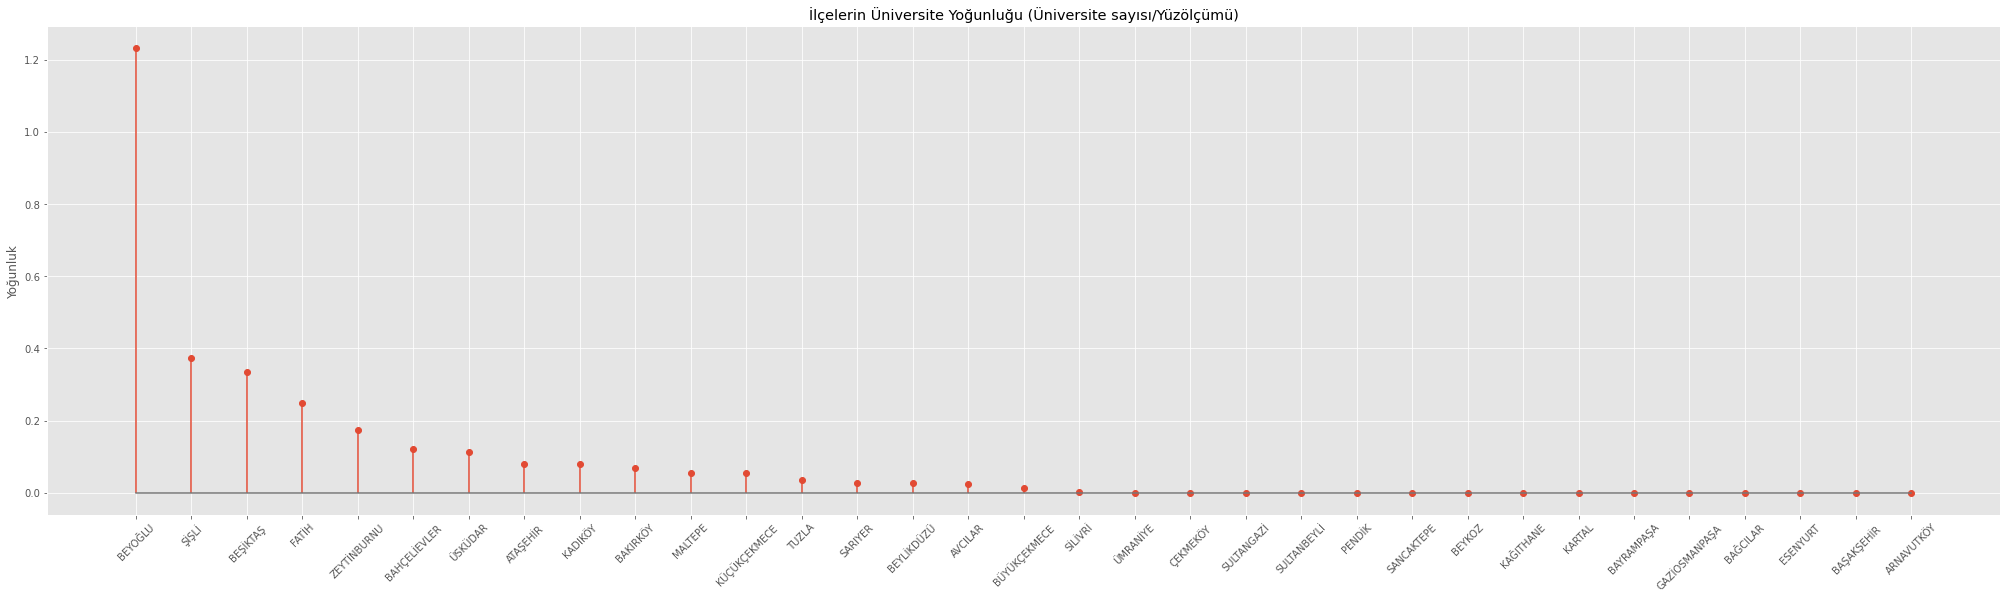

In [224]:
df_vis = df.sort_values(by='Üniversite Yoğunluğu', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "Üniversite Yoğunluğu", data=df_vis)
plt.title("İlçelerin Üniversite Yoğunluğu (Üniversite sayısı/Yüzölçümü)")
plt.ylabel("Yoğunluk")
plt.xticks(rotation=45)
plt.show()


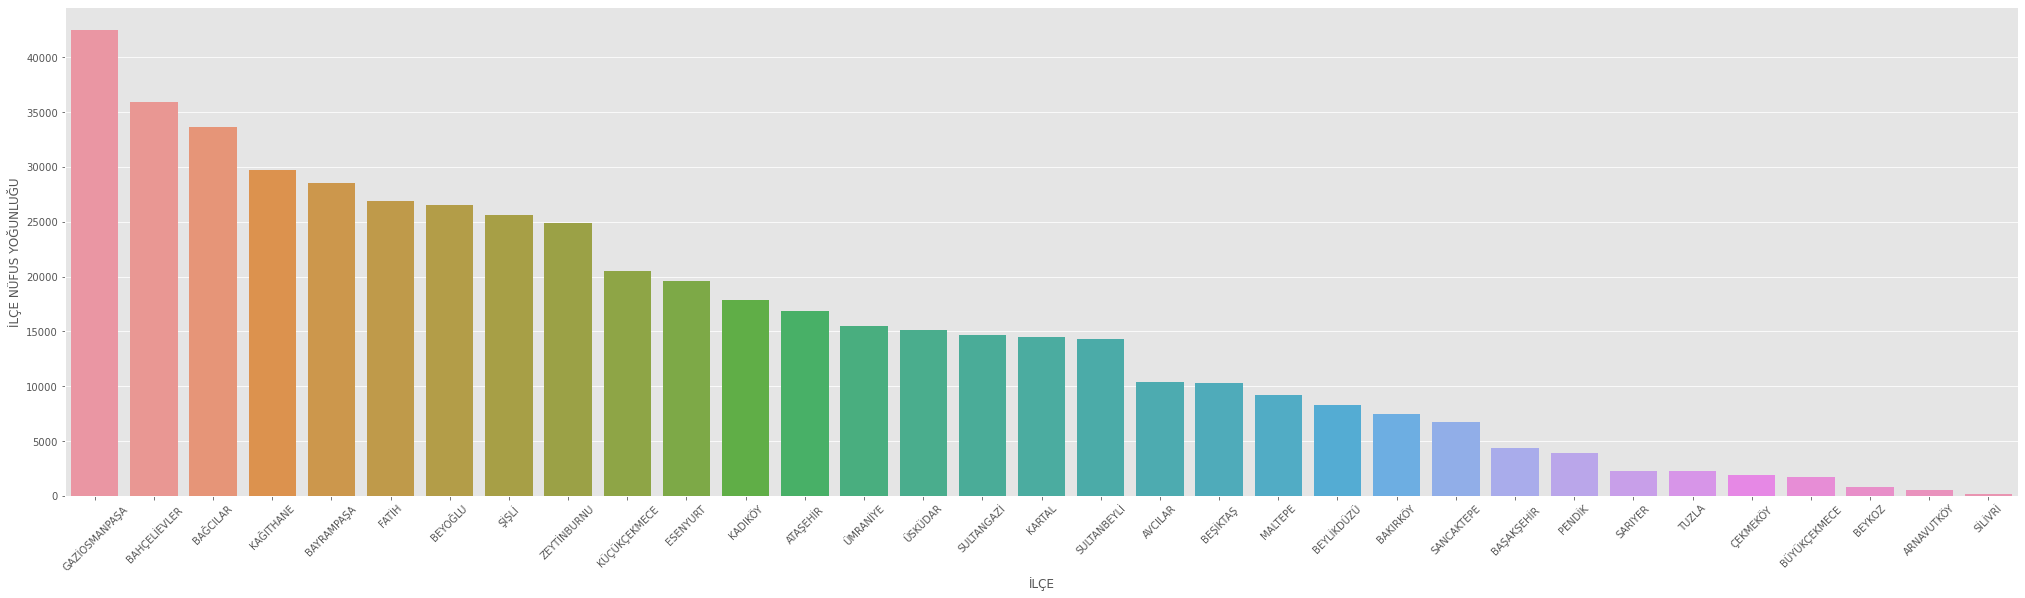

In [227]:
df_vis = df.sort_values(by='İLÇE NÜFUS YOĞUNLUĞU', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
sns.barplot(x=df_vis["İLÇE"], y="İLÇE NÜFUS YOĞUNLUĞU", data=df_vis)
plt.xticks(rotation=45)
plt.show()

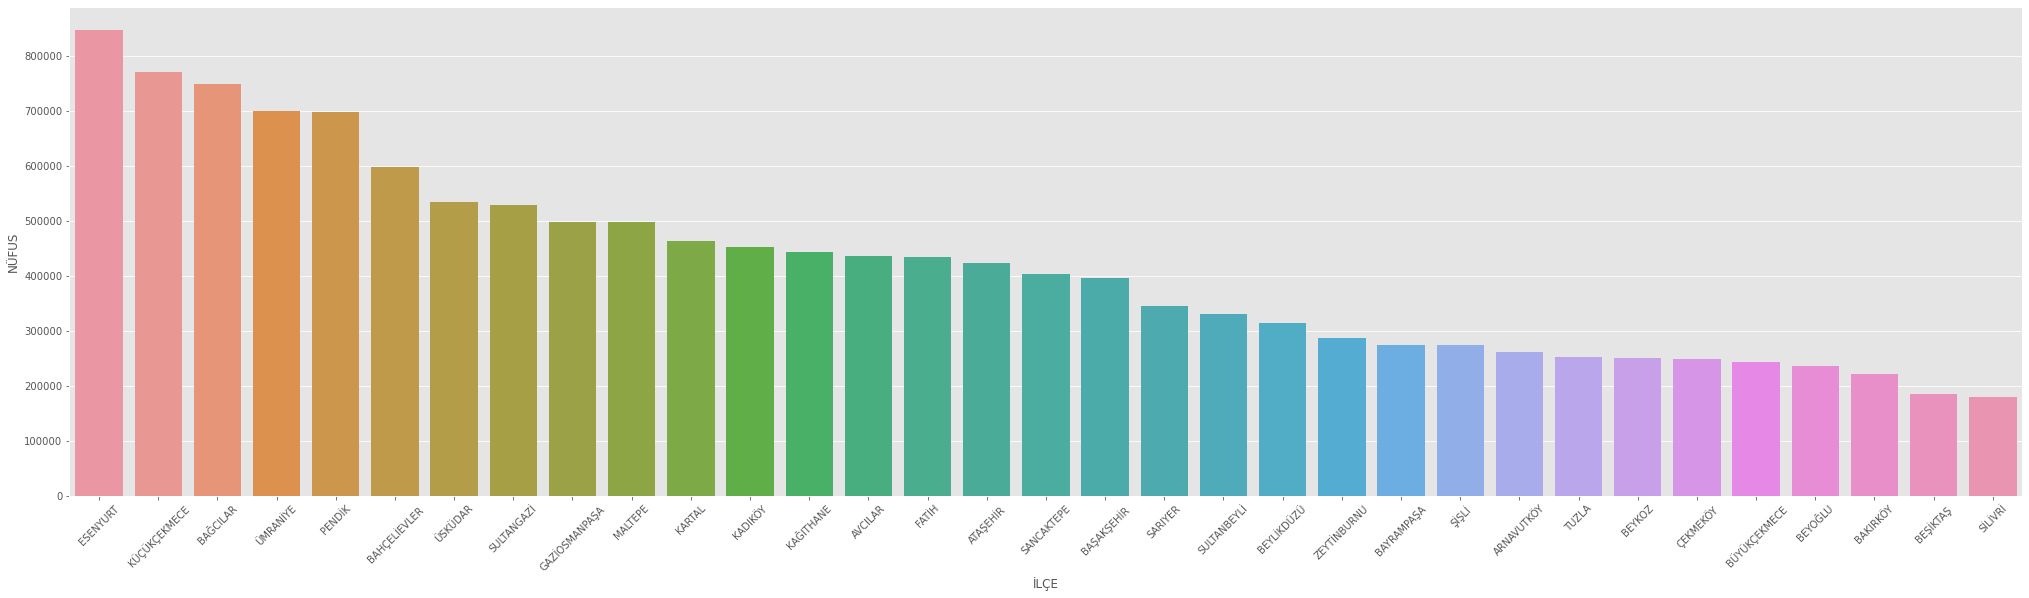

In [344]:
df_vis = df.sort_values(by='NÜFUS', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
sns.barplot(x=df_vis["İLÇE"], y="NÜFUS", data=df_vis)
plt.xticks(rotation=45)
plt.show()

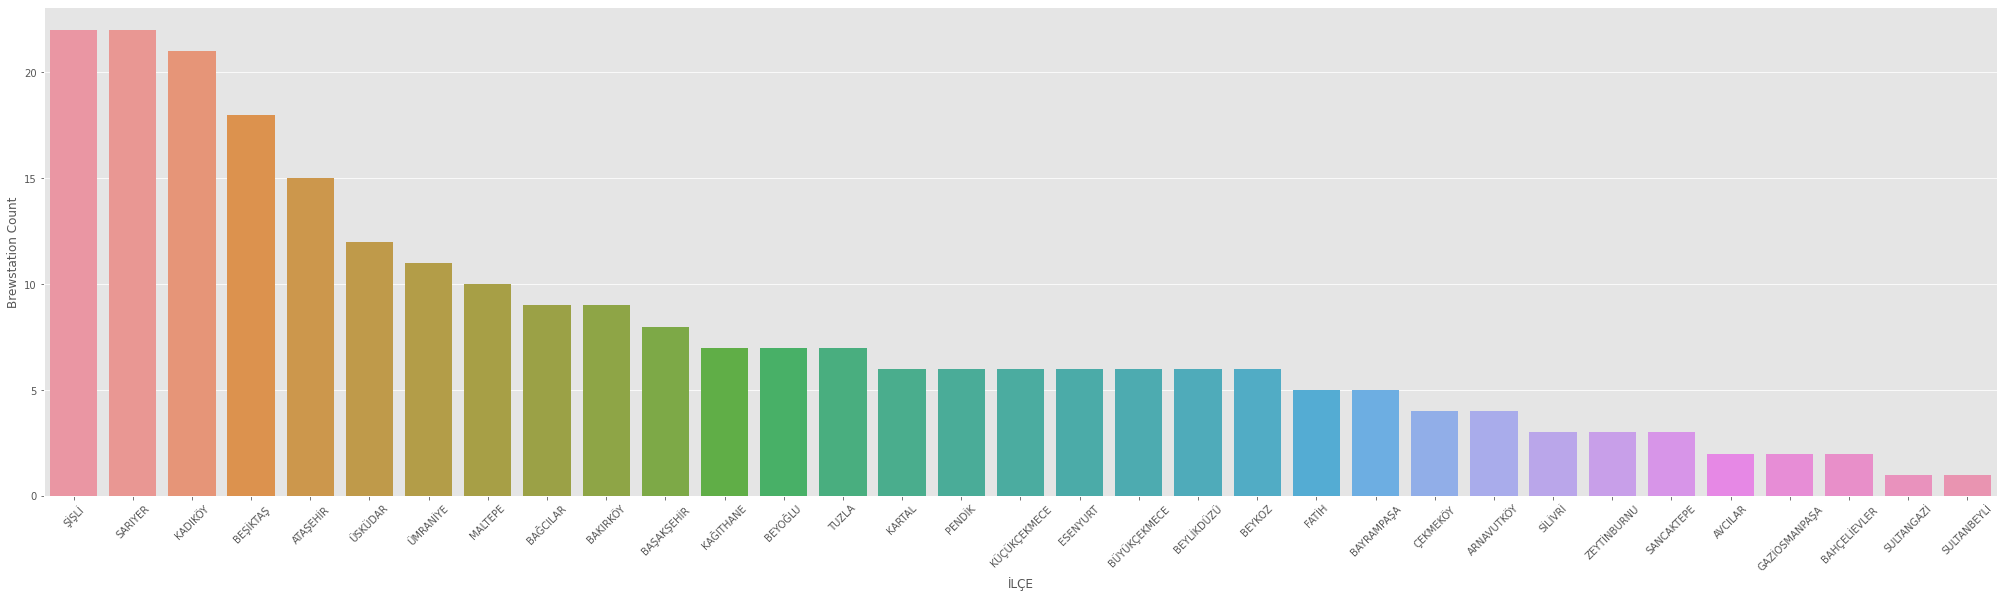

In [230]:
df_vis = df.sort_values(by='İLÇE_YÜZÖLÇÜMÜ(KM2)_count', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
sns.barplot(x=df_vis["İLÇE"], y="İLÇE_YÜZÖLÇÜMÜ(KM2)_count", data=df_vis)
plt.xticks(rotation=45)
plt.ylabel("Brewstation Count")
plt.show()

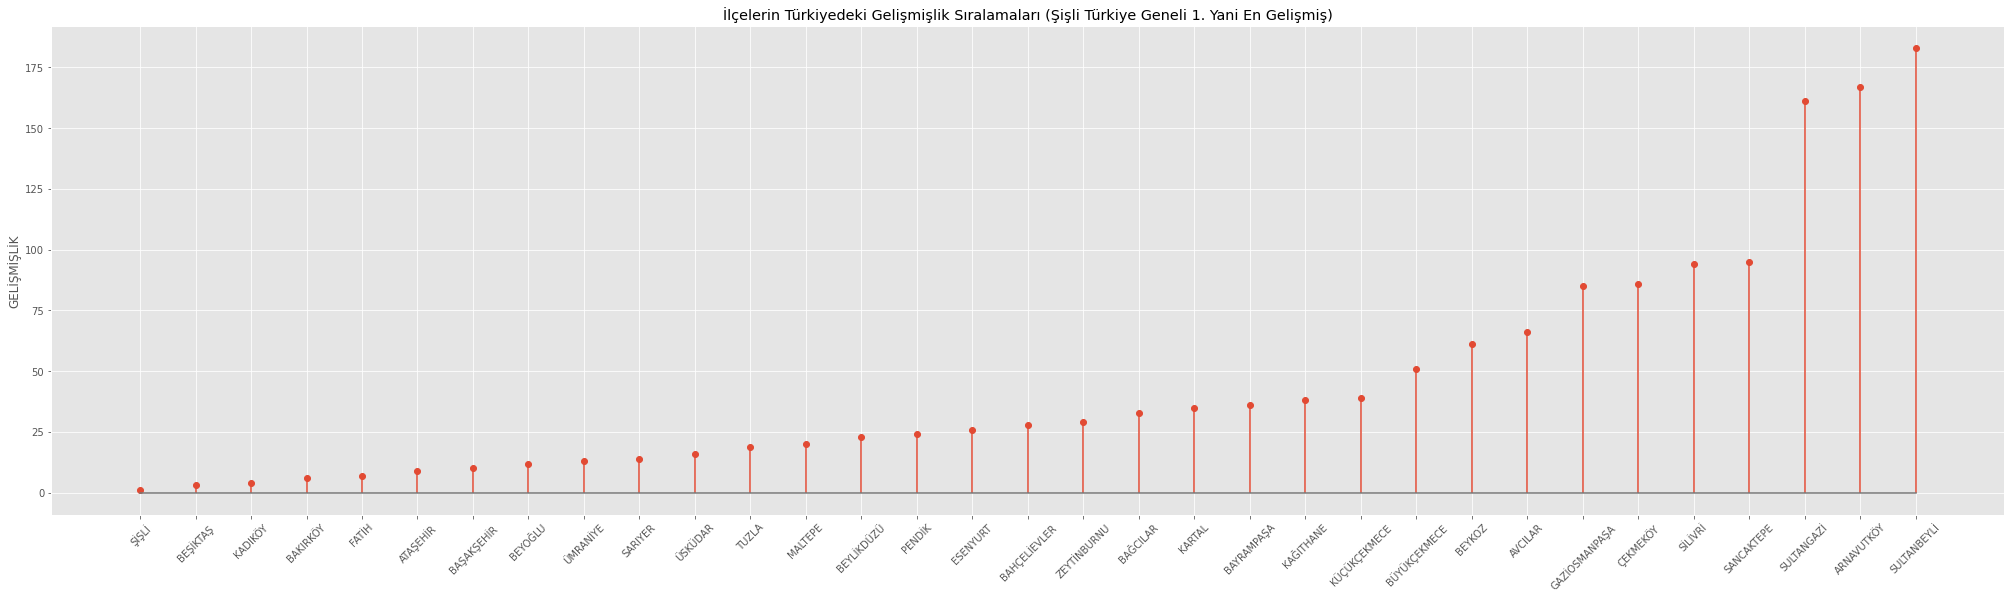

In [ ]:
df = df_brew_analyze_district_only_agg.sort_values(by='İLÇE_Genel Sıralama_max')
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df["İLÇE"], "İLÇE_Genel Sıralama_max", data=df)
plt.title("İlçelerin Türkiyedeki Gelişmişlik Sıralamaları (Şişli Türkiye Geneli 1. Yani En Gelişmiş)")
plt.ylabel("GELİŞMİŞLİK")
plt.xticks(rotation=45)
plt.show()


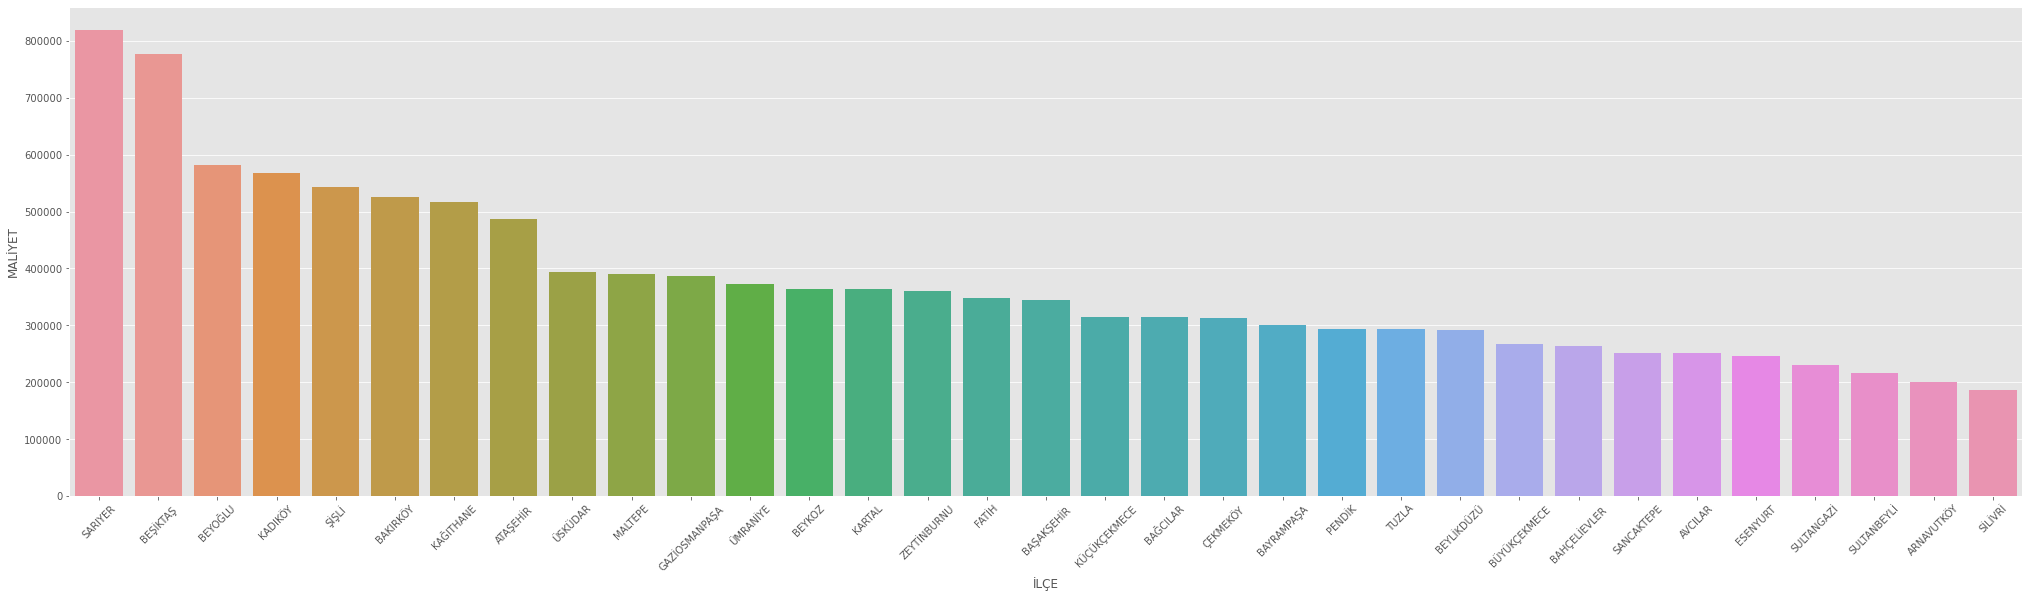

In [231]:
df_vis = df.sort_values(by='İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
sns.barplot(x=df_vis["İLÇE"], y="İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max", data=df_vis)
plt.xticks(rotation=45)
plt.ylabel("MALİYET")
plt.show()

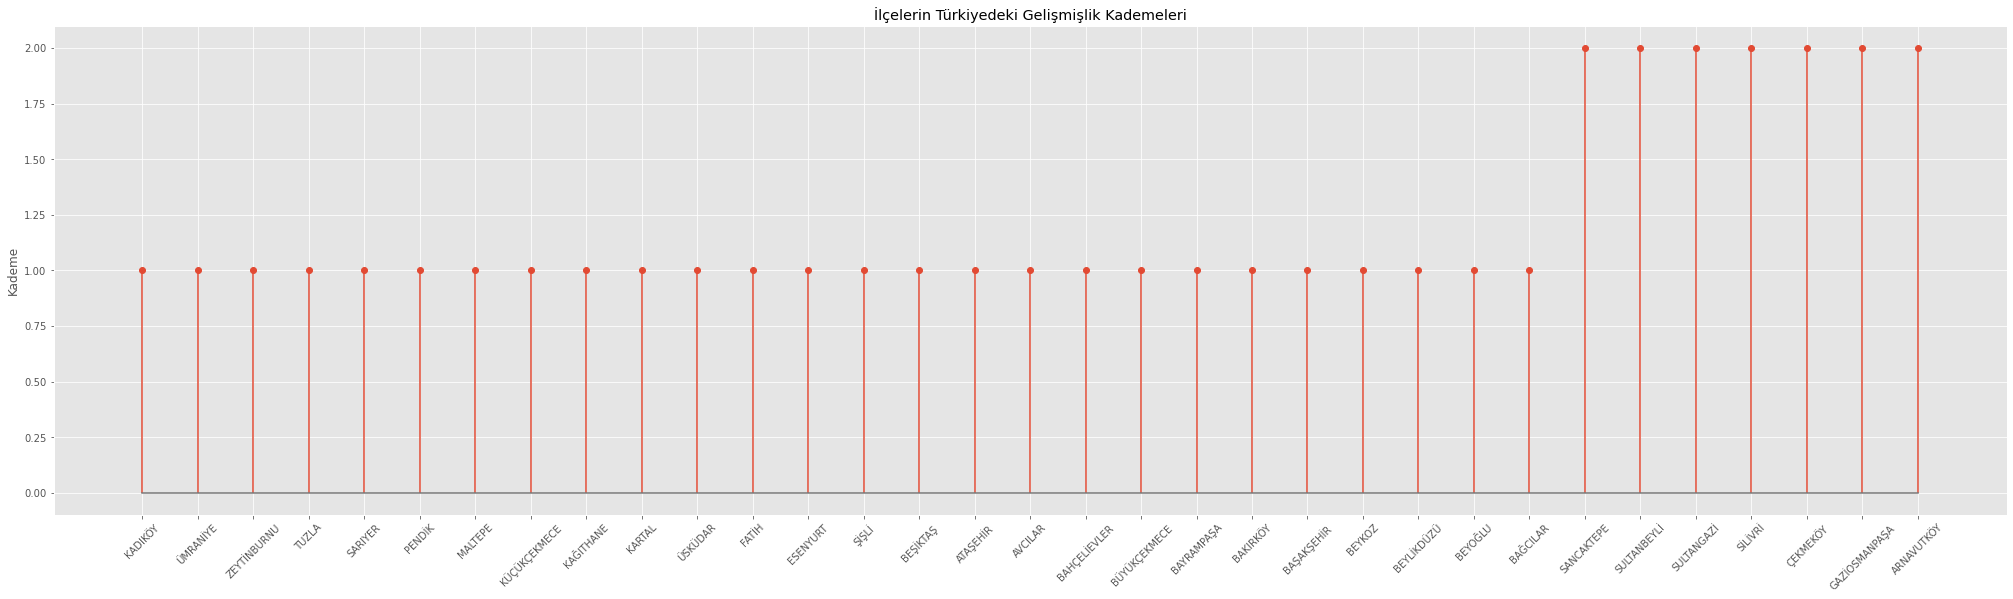

In [345]:
df_vis = df.sort_values(by='İLÇE_Kademe_max')
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_Kademe_max", data=df_vis)
plt.title("İlçelerin Türkiyedeki Gelişmişlik Kademeleri")
plt.ylabel("Kademe")
plt.xticks(rotation=45)
plt.show()


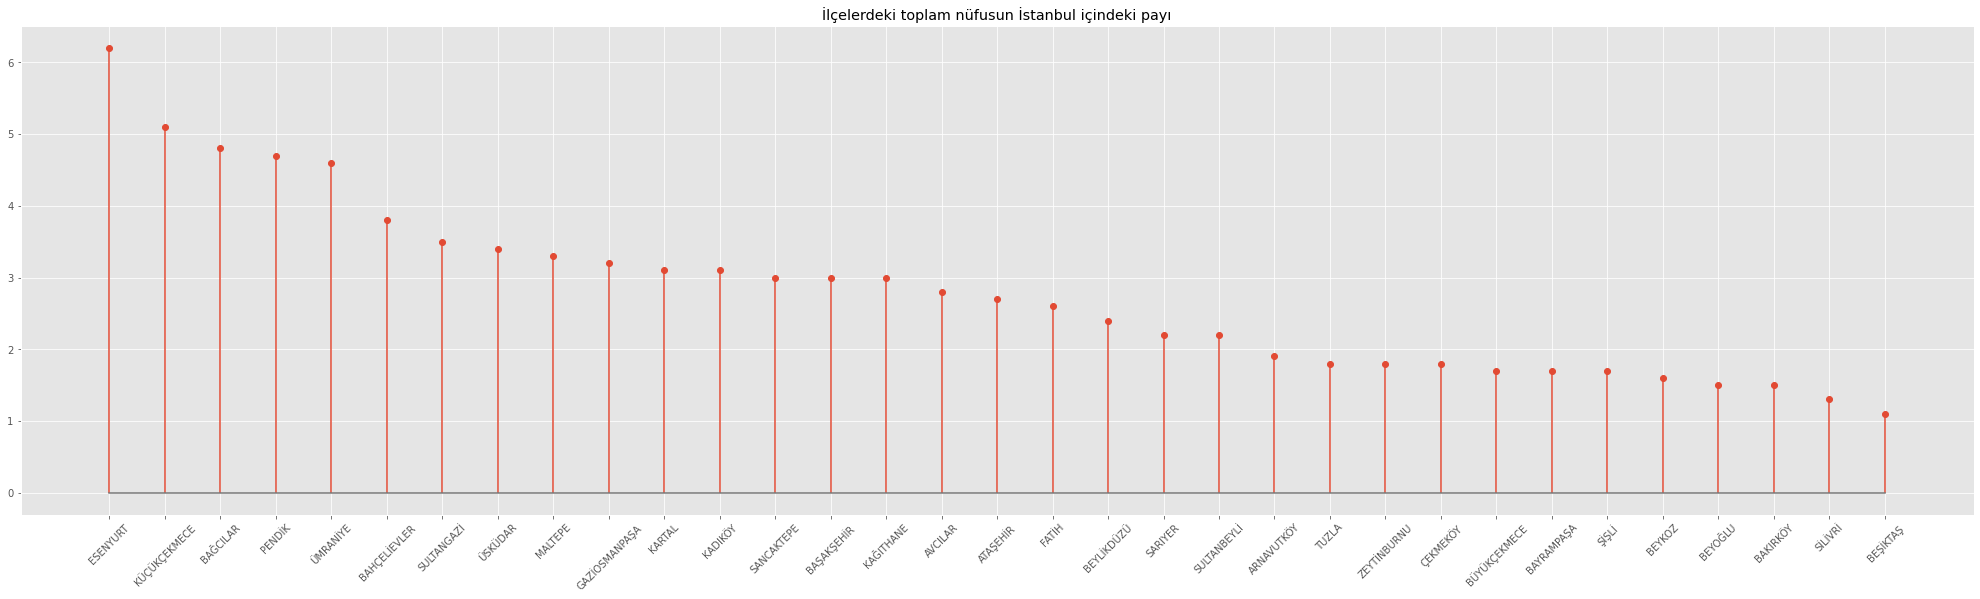

In [346]:
df_vis = df.sort_values(by='İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max", data=df_vis)
plt.title("İlçelerdeki toplam nüfusun İstanbul içindeki payı")
plt.xticks(rotation=45)
plt.show()


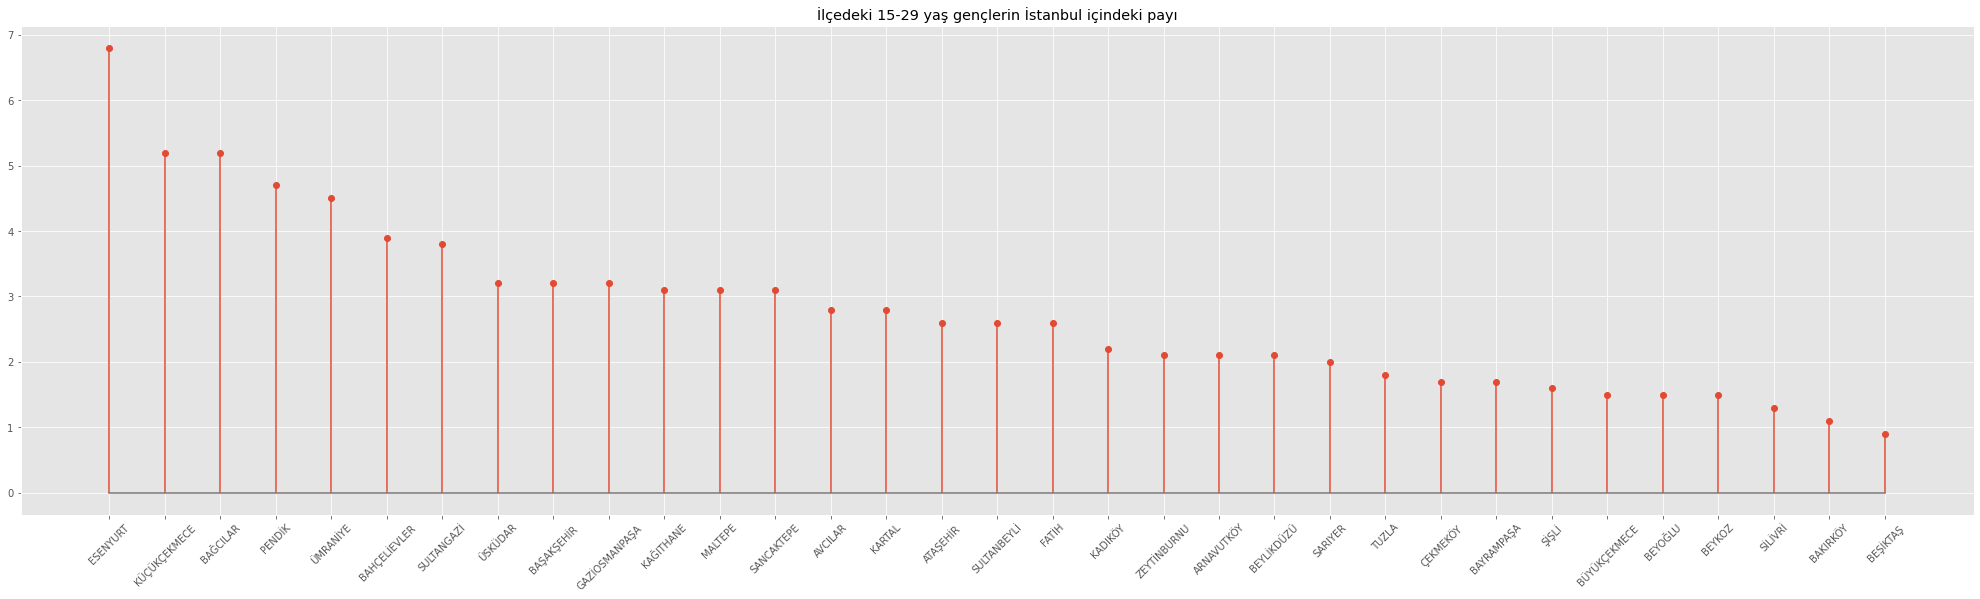

In [347]:
df_vis = df.sort_values(by='İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max", data=df_vis)
plt.title("İlçedeki 15-29 yaş gençlerin İstanbul içindeki payı")
plt.xticks(rotation=45)
plt.show()


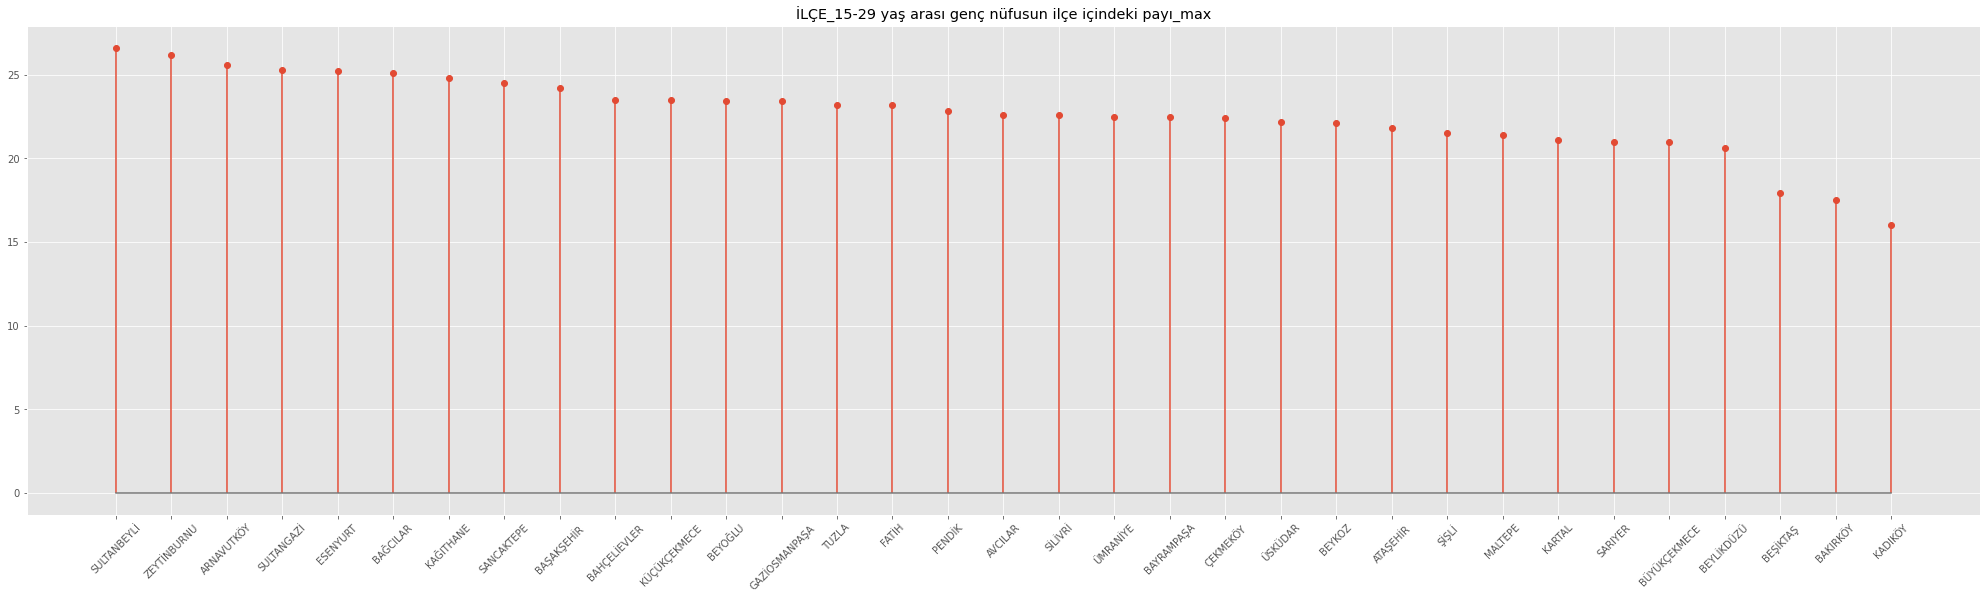

In [348]:


df_vis = df.sort_values(by='İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max", data=df_vis)
plt.title("İLÇE_15-29 yaş arası genç nüfusun ilçe içindeki payı_max")
plt.xticks(rotation=45)
plt.show()


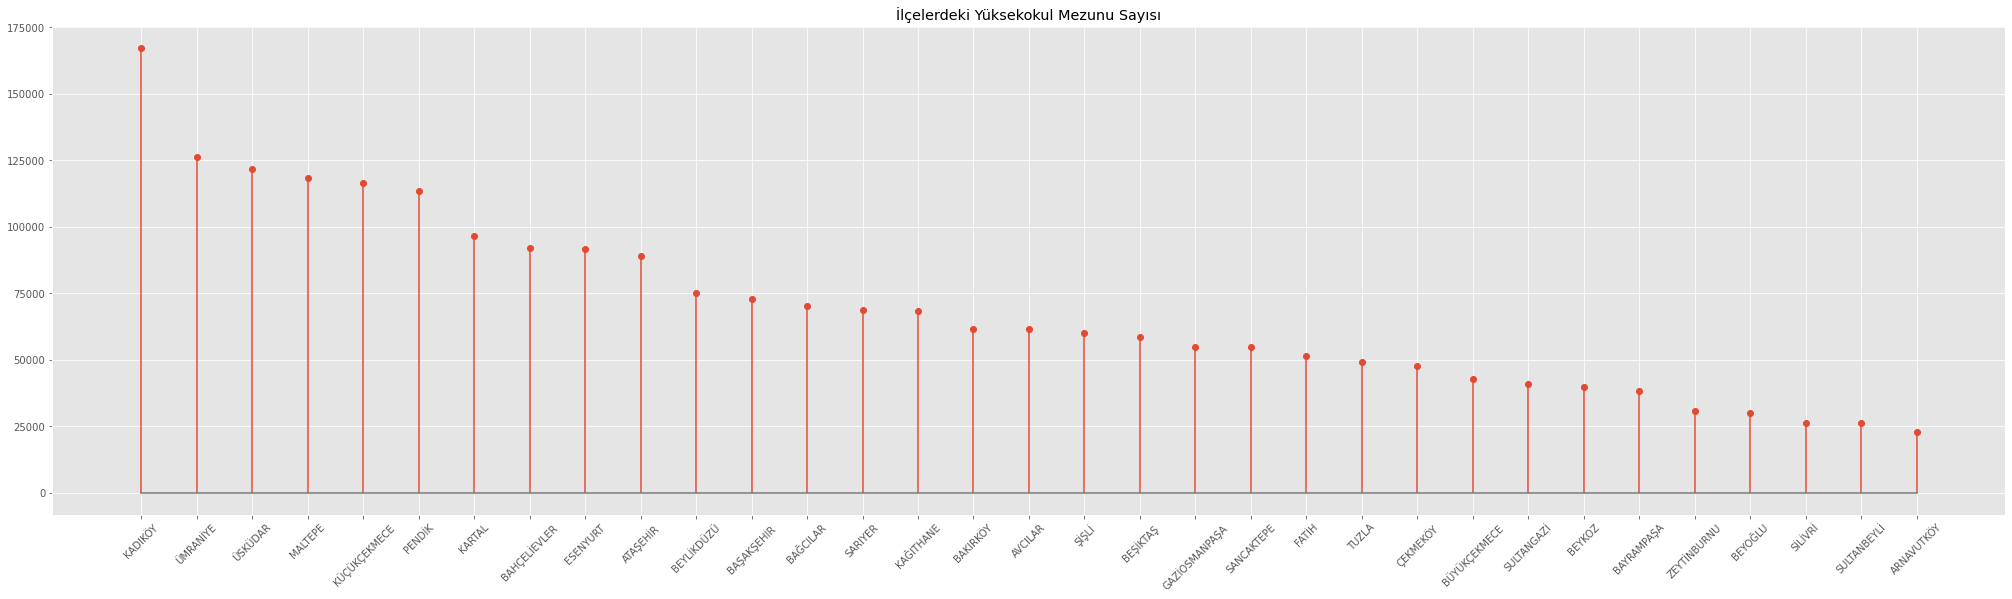

In [349]:

df_vis = df.sort_values(by='İLÇE_Yüksekokul Mezunu Sayısı_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_Yüksekokul Mezunu Sayısı_max", data=df_vis)
plt.title("İlçelerdeki Yüksekokul Mezunu Sayısı")
plt.xticks(rotation=45)
plt.show()


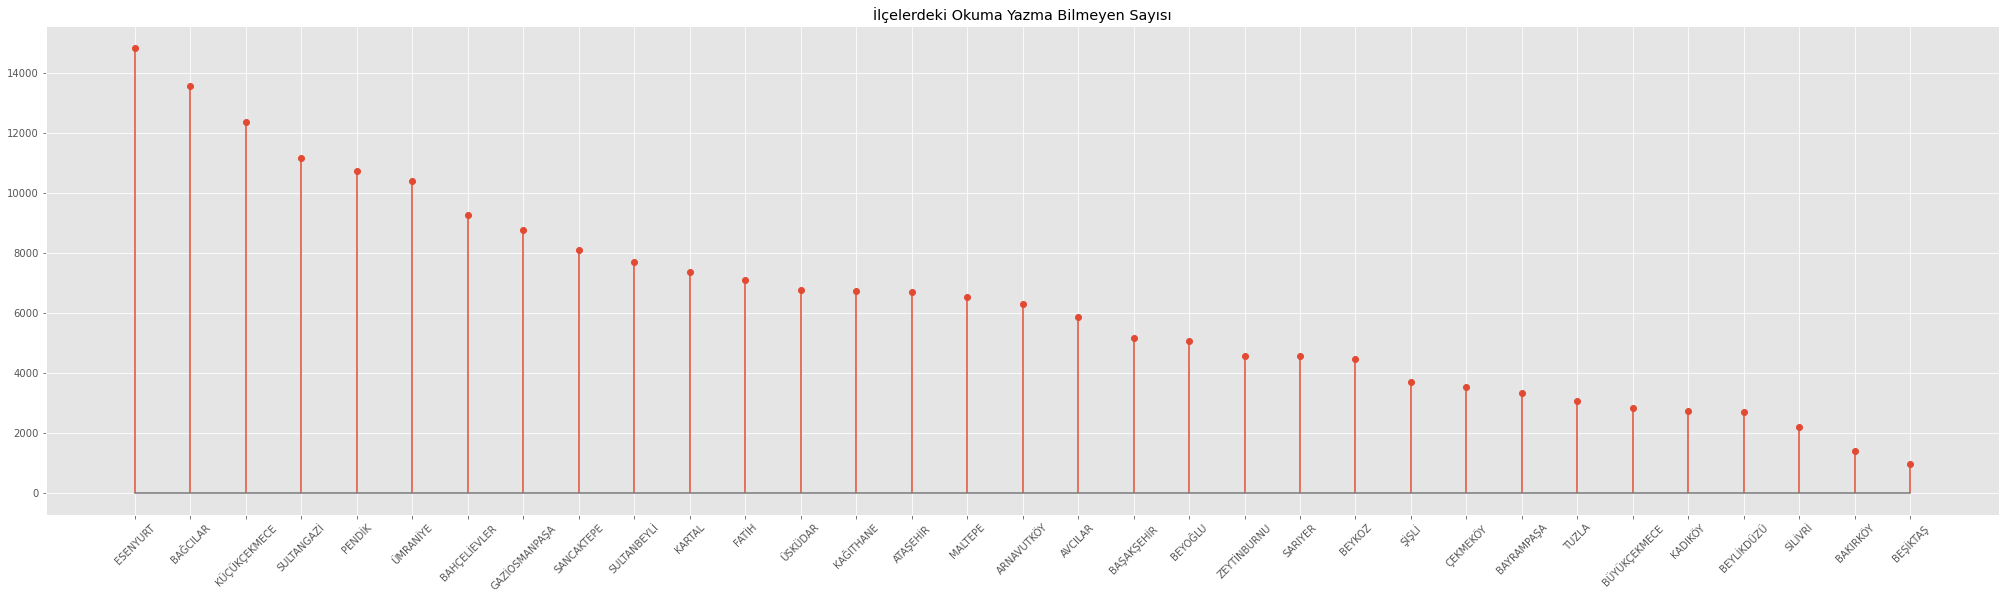

In [350]:
df_vis = df.sort_values(by='İLÇE_Okuma Yazma\nBilmeyen Sayısı_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_Okuma Yazma\nBilmeyen Sayısı_max", data=df_vis)
plt.title("İlçelerdeki Okuma Yazma Bilmeyen Sayısı")
plt.xticks(rotation=45)
plt.show()


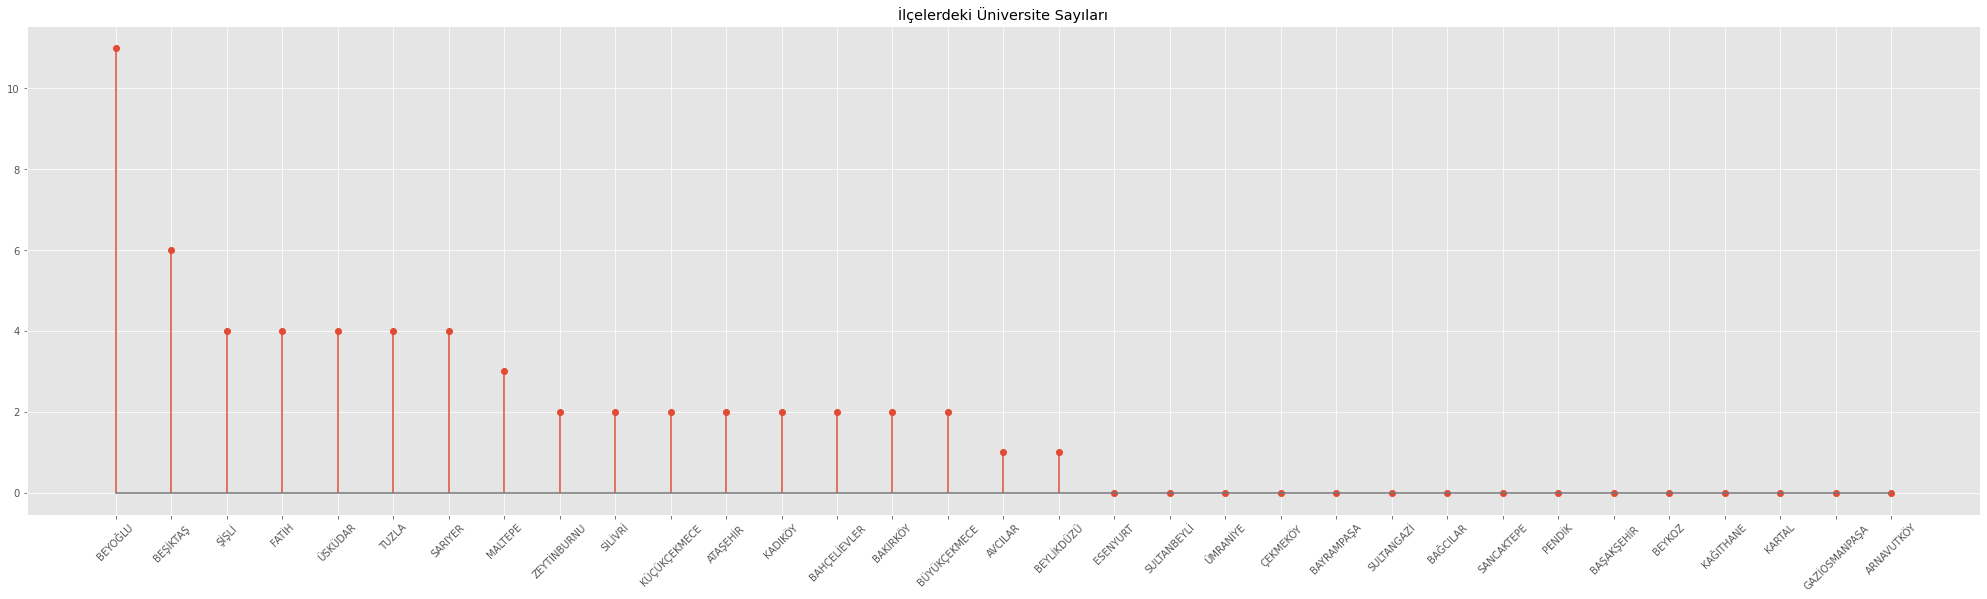

In [351]:
df_vis = df.sort_values(by='İLÇE_Üniversite Sayısı_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_Üniversite Sayısı_max", data=df_vis)
plt.title("İlçelerdeki Üniversite Sayıları")
plt.xticks(rotation=45)
plt.show()


## Modelling

In [232]:
df.head()

İLÇE  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
0    ARNAVUTKÖY                                149.0   
1      ATAŞEHİR                              21205.0   
2       AVCILAR                               7623.0   
3  BAHÇELİEVLER                              19452.0   
4      BAKIRKÖY                              18610.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  \
0                                149.0                                596.0   
1                              11065.0                             203026.0   
2                               4657.0                              12280.0   
3                              19452.0                              38904.0   
4                               1794.0                              91124.0   

   İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
0          5242.0          5242.0         20968.0                     35.3   
1         76344.0         11428.0        526989.0                      3.6   
2         53209.0         21621.0         74830.0                     11.4   
3         61832.0         61832.0        123664.0                      3.2   
4         28206.0          5376.0        183952.0                     13.3   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
0                    35.30                   141.20   
1                     0.71                    38.11   
2                     2.80                    14.20   
3                     3.20                     6.40   
4                     0.29                    39.78   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_count  İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
0                          4                                201000   
1                         15                                486000   
2                          2                                252000   
3                          2                                264000   
4                          9                                525000   

   İLÇE_Genel Sıralama_max  İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  \
0                      167                             36          0.771   
1                        9                              6          3.545   
2                       66                             29          1.640   
3                       28                             17          2.423   
4                        6                              4          4.465   

   İLÇE_Kademe_max  İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                2                                                1.9       
1                1                                                2.7       
2                1                                                2.8       
3                1                                                3.8       
4                1                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                      

In [236]:
df_dummies = pd.get_dummies(df)

In [237]:
df_dummies.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
0                                149.0                                149.0   
1                              21205.0                              11065.0   
2                               7623.0                               4657.0   
3                              19452.0                              19452.0   
4                              18610.0                               1794.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  \
0                                596.0          5242.0          5242.0   
1                             203026.0         76344.0         11428.0   
2                              12280.0         53209.0         21621.0   
3                              38904.0         61832.0         61832.0   
4                              91124.0         28206.0          5376.0   

   İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  İLÇE_YÜZÖLÇÜMÜ(KM2)_min  \
0         20968.0                     35.3                    35.30   
1        526989.0                      3.6                     0.71   
2         74830.0                     11.4                     2.80   
3        123664.0                      3.2                     3.20   
4        183952.0                     13.3                     0.29   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_count  \
0                   141.20                          4   
1                    38.11                         15   
2                    14.20                          2   
3                     6.40                          2   
4                    39.78                          9   

   İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
0                                201000                      167   
1                                486000                        9   
2                                252000                       66   
3                                264000                       28   
4                                525000                        6   

   İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
0                             36          0.771                2   
1                              6          3.545                1   
2                             29          1.640                1   
3                             17          2.423                1   
4                              4          4.465                1   

   İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                                                1.9       
1                                                2.7       
2                                                2.8       
3                                                3.8       
4                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                               11.1                  
3                                           

In [238]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dummies)

In [239]:
df_scaled[0]

array([-1.47616124, -0.69817568, -1.09879541, -1.53825107, -0.56156637,
       -1.09858252,  2.56431321,  4.92562666,  2.46408635, -0.64542257,
       -1.15815244,  2.55985669,  1.63807391, -1.37270929,  1.92724822,
       -0.73422488, -0.50645348,  1.26755385,  1.34101643,  1.03176864,
       -0.75663617, -1.36082213, -0.02421108, -0.87225043,  2.27918392,
       -1.26434109, -0.41687441,  5.65685425, -0.1767767 , -0.1767767 ,
       -0.1767767 , -0.1767767 , -0.1767767 , -0.1767767 , -0.1767767 ,
       -0.1767767 , -0.1767767 , -0.1767767 , -0.1767767 , -0.1767767 ,
       -0.1767767 , -0.1767767 , -0.1767767 , -0.1767767 , -0.1767767 ,
       -0.1767767 , -0.1767767 , -0.1767767 , -0.1767767 , -0.1767767 ,
       -0.1767767 , -0.1767767 , -0.1767767 , -0.1767767 , -0.1767767 ,
       -0.1767767 , -0.1767767 , -0.1767767 , -0.1767767 , -0.1767767 ])

In [240]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

In [253]:
k_means_model = KMeans(n_clusters=3)

In [254]:
k_means_model.fit(df_scaled)

KMeans(n_clusters=3)

In [255]:
cluster_labels = k_means_model.predict(df_scaled)

In [256]:
cluster_labels

array([2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0])

In [257]:
df_dummies["Cluster"] = cluster_labels

In [258]:
df_dummies.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
0                                149.0                                149.0   
1                              21205.0                              11065.0   
2                               7623.0                               4657.0   
3                              19452.0                              19452.0   
4                              18610.0                               1794.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  \
0                                596.0          5242.0          5242.0   
1                             203026.0         76344.0         11428.0   
2                              12280.0         53209.0         21621.0   
3                              38904.0         61832.0         61832.0   
4                              91124.0         28206.0          5376.0   

   İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  İLÇE_YÜZÖLÇÜMÜ(KM2)_min  \
0         20968.0                     35.3                    35.30   
1        526989.0                      3.6                     0.71   
2         74830.0                     11.4                     2.80   
3        123664.0                      3.2                     3.20   
4        183952.0                     13.3                     0.29   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_count  \
0                   141.20                          4   
1                    38.11                         15   
2                    14.20                          2   
3                     6.40                          2   
4                    39.78                          9   

   İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
0                                201000                      167   
1                                486000                        9   
2                                252000                       66   
3                                264000                       28   
4                                525000                        6   

   İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
0                             36          0.771                2   
1                              6          3.545                1   
2                             29          1.640                1   
3                             17          2.423                1   
4                              4          4.465                1   

   İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                                                1.9       
1                                                2.7       
2                                                2.8       
3                                                3.8       
4                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                               11.1                  
3                                           

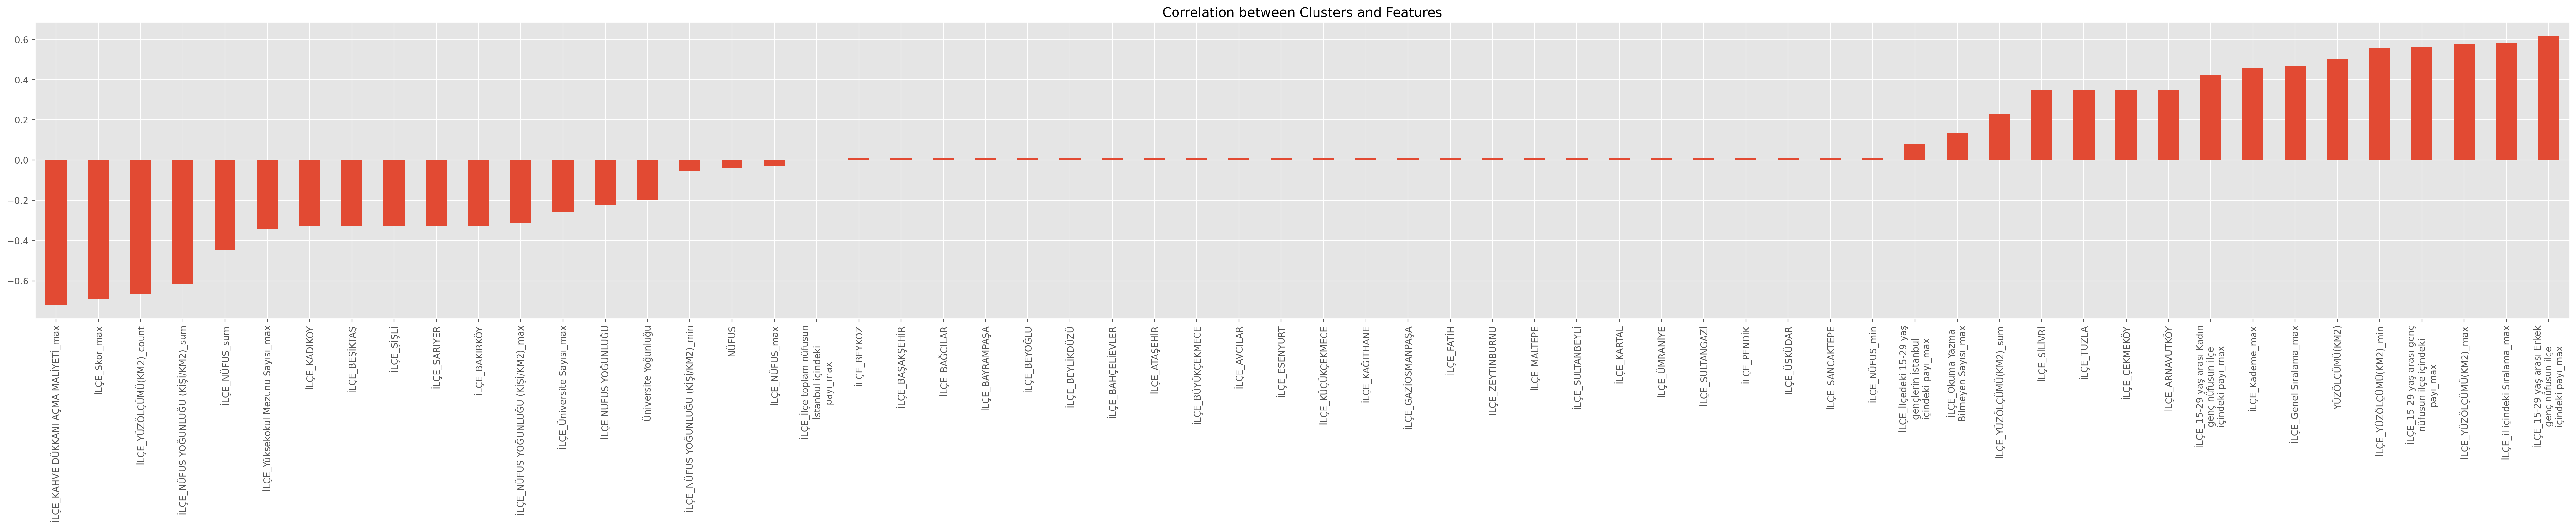

In [259]:
plt.figure(figsize=(50,6),dpi=200)
df_dummies.corr()["Cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Correlation between Clusters and Features")
plt.show()

### in this figure we can see that young population, area, district's economic rank is effective in brewstation numbers like our hypothesis.

In [248]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(df_dummies)
    
    ssd.append(model.inertia_)

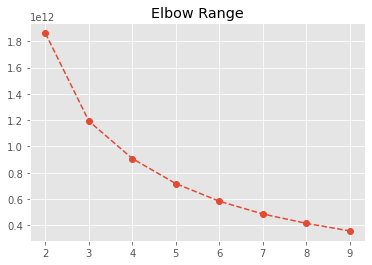

In [249]:
plt.plot(range(2,10),ssd,"o--")
plt.title("Elbow Range")
plt.show()

## İstanbul brewstation hierarchical clustering

In [262]:
df_dummies = pd.get_dummies(df)

In [263]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_dummies)
df_scaled[:5]

array([[0.        , 0.00114713, 0.        , 0.02923751, 0.07013992,
        0.02733349, 0.76398601, 1.        , 0.80236293, 0.14285714,
        0.02369668, 0.91208791, 0.92105263, 0.01386454, 1.        ,
        0.15686275, 0.20338983, 0.90566038, 0.92      , 0.87931034,
        0.        , 0.        , 0.38468741, 0.12182417, 0.54850811,
        0.00849487, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33544687, 0.20744141, 0.5361958 , 0.81370743, 0.154751  ,
        1.        , 0.07124126, 0.0182778 , 0.21111493, 0.66666667,
        0.47393365, 0.04395604, 0.13157895, 0.4

In [264]:
df_scaled  = pd.DataFrame(df_scaled,columns=df_dummies.columns)
df_scaled.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
0                             0.000000                             0.001147   
1                             0.335447                             0.207441   
2                             0.119070                             0.086341   
3                             0.307520                             0.365942   
4                             0.294105                             0.032235   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  \
0                             0.000000        0.029238        0.070140   
1                             0.536196        0.813707        0.154751   
2                             0.030949        0.558458        0.294169   
3                             0.101470        0.653596        0.844168   
4                             0.239790        0.282600        0.071973   

   İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  İLÇE_YÜZÖLÇÜMÜ(KM2)_min  \
0        0.027333                 0.763986                 1.000000   
1        1.000000                 0.071241                 0.018278   
2        0.130866                 0.241696                 0.077596   
3        0.224734                 0.062500                 0.088948   
4        0.340619                 0.283217                 0.006357   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_count  \
0                 0.802363                   0.142857   
1                 0.211115                   0.666667   
2                 0.073985                   0.047619   
3                 0.029250                   0.047619   
4                 0.220693                   0.380952   

   İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
0                              0.023697                 0.912088   
1                              0.473934                 0.043956   
2                              0.104265                 0.357143   
3                              0.123223                 0.148352   
4                              0.535545                 0.027473   

   İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
0                       0.921053       0.013865              1.0   
1                       0.131579       0.455936              0.0   
2                       0.736842       0.152351              0.0   
3                       0.421053       0.277131              0.0   
4                       0.078947       0.602550              0.0   

   İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                                           0.156863       
1                                           0.313725       
2                                           0.333333       
3                                           0.529412       
4                                           0.078431       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                           0.203390                
1                                           0.288136                
2                                           0.322034                
3                                           0.508475                
4                                           0.033898                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                           0.905660            
1                                           0.547170            
2                                           0.622642            
3                                           0.707547            
4                                           0.141509            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               0.92                  
1                                               0.58                  
2                                               0.60                  
3                                           

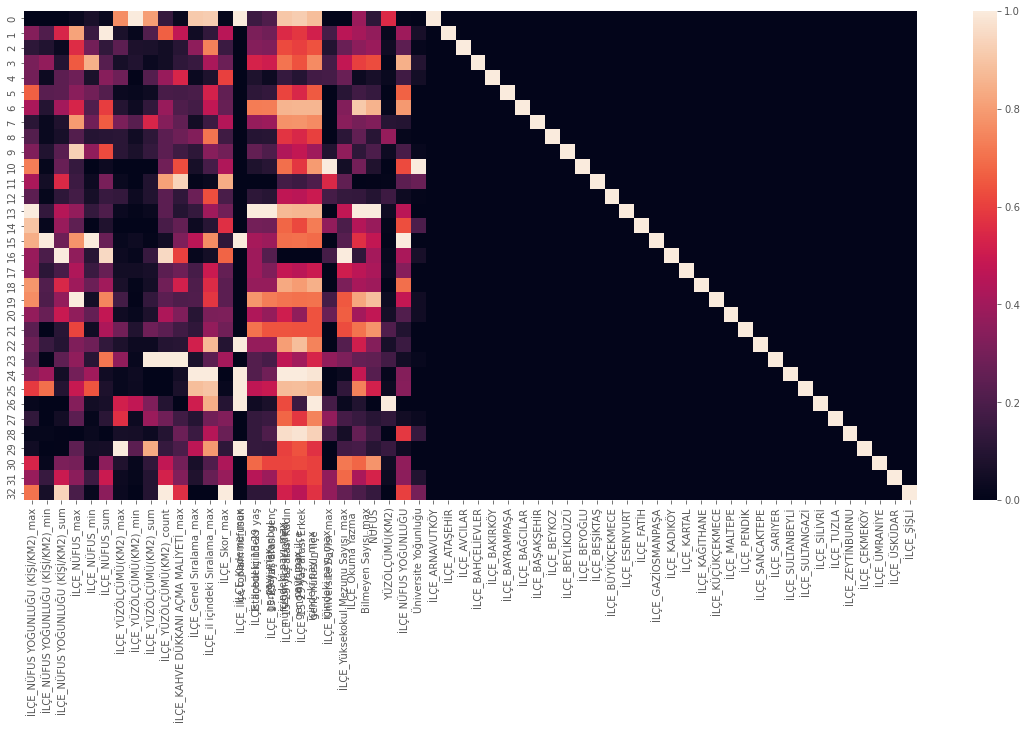

In [265]:
plt.figure(figsize=(20,9))
sns.heatmap(df_scaled)
plt.show()

<Figure size 1440x648 with 0 Axes>

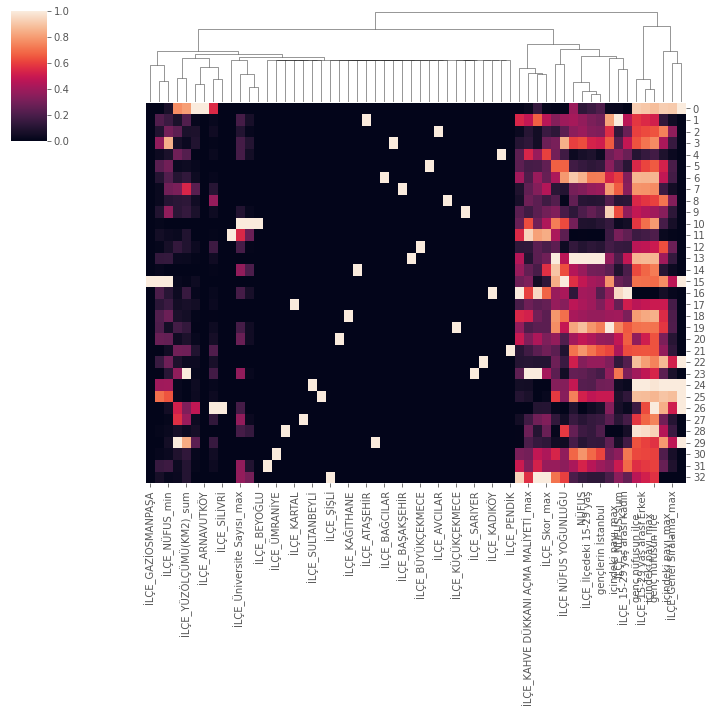

In [266]:
plt.figure(figsize=(20,9))
sns.clustermap(df_scaled,row_cluster=False)
plt.show()

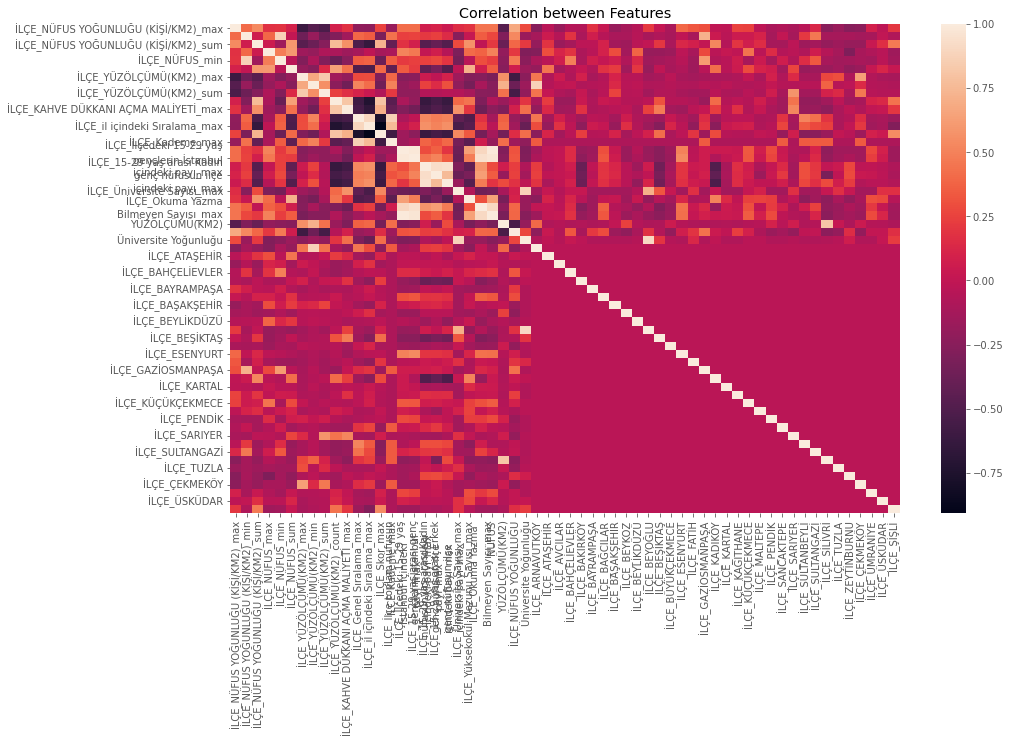

In [267]:
plt.figure(figsize=(15,9))
sns.heatmap(df_scaled.corr())
plt.title("Correlation between Features")
plt.show()

In [268]:
hier_model = AgglomerativeClustering(n_clusters=5,affinity="euclidean")
cluster_labels = hier_model.fit_predict(df_scaled)
cluster_labels[:20]

array([3, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 2, 0, 4, 0, 1, 2, 0, 0, 4],
      dtype=int64)

In [277]:
df_brew_analyze_district_only_agg.head()

İLÇE  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
0    ARNAVUTKÖY                                149.0   
1      ATAŞEHİR                              21205.0   
2       AVCILAR                               7623.0   
3  BAHÇELİEVLER                              19452.0   
4      BAKIRKÖY                              18610.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  \
0                                149.0                                596.0   
1                              11065.0                             203026.0   
2                               4657.0                              12280.0   
3                              19452.0                              38904.0   
4                               1794.0                              91124.0   

   İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
0          5242.0          5242.0         20968.0                     35.3   
1         76344.0         11428.0        526989.0                      3.6   
2         53209.0         21621.0         74830.0                     11.4   
3         61832.0         61832.0        123664.0                      3.2   
4         28206.0          5376.0        183952.0                     13.3   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
0                    35.30                   141.20   
1                     0.71                    38.11   
2                     2.80                    14.20   
3                     3.20                     6.40   
4                     0.29                    39.78   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_count  İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
0                          4                                201000   
1                         15                                486000   
2                          2                                252000   
3                          2                                264000   
4                          9                                525000   

   İLÇE_Genel Sıralama_max  İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  \
0                      167                             36          0.771   
1                        9                              6          3.545   
2                       66                             29          1.640   
3                       28                             17          2.423   
4                        6                              4          4.465   

   İLÇE_Kademe_max  İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                2                                                1.9       
1                1                                                2.7       
2                1                                                2.8       
3                1                                                3.8       
4                1                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                      

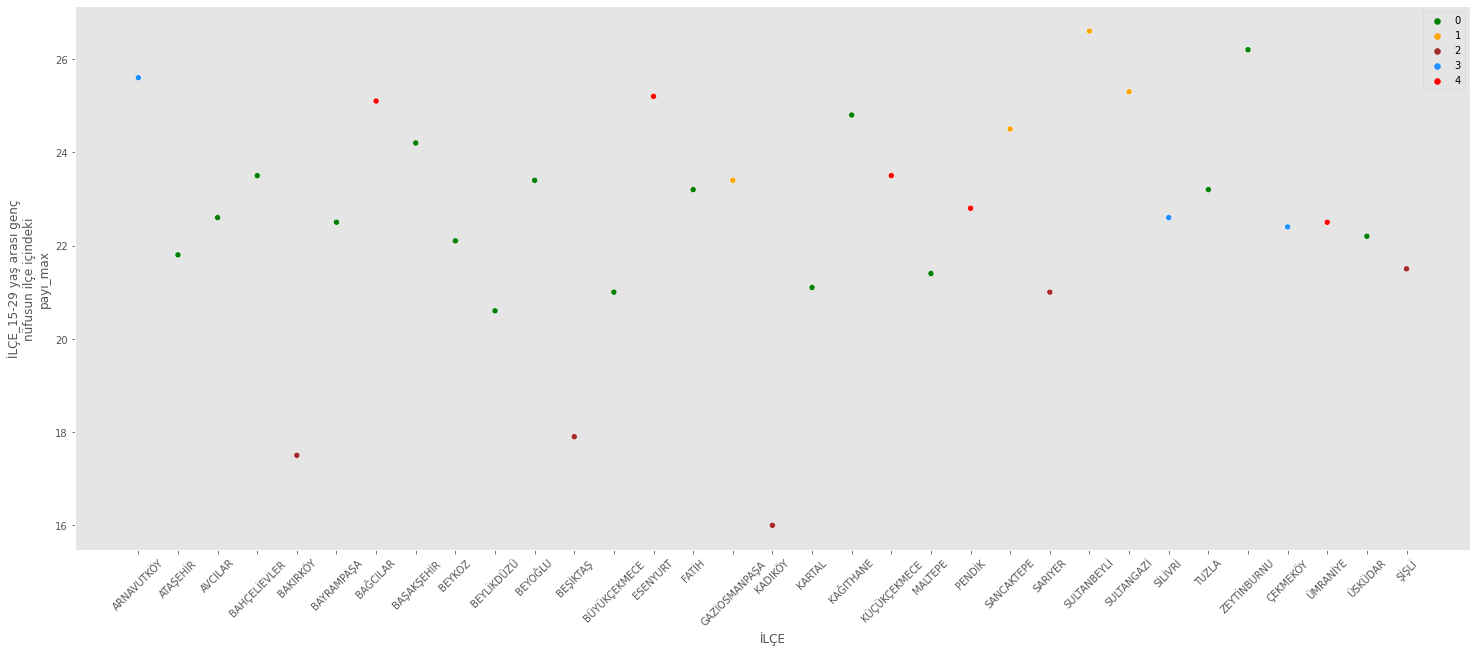

In [283]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=df_brew_analyze_district_only_agg,x="İLÇE",y="İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max",hue=cluster_labels, palette=['green','orange','brown','dodgerblue','red'])
plt.xticks(rotation=45)
plt.grid(False)

In [284]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(hier_model.children_)
linkage_matrix

array([[ 0.        ,  3.        ,  1.41421356,  2.        ],
       [12.        , 13.        ,  1.41421356,  2.        ],
       [ 5.        ,  6.        ,  1.41421356,  2.        ],
       [17.        , 20.        ,  2.23606798,  2.        ],
       [23.        , 33.        ,  2.23606798,  3.        ],
       [26.        , 27.        ,  2.23606798,  2.        ],
       [28.        , 37.        ,  2.23606798,  3.        ],
       [14.        , 16.        ,  3.16227766,  2.        ],
       [ 2.        , 34.        ,  3.16227766,  3.        ],
       [ 1.        ,  9.        ,  3.16227766,  2.        ],
       [29.        , 38.        ,  3.16227766,  4.        ],
       [ 7.        , 10.        ,  3.60555128,  2.        ],
       [18.        , 39.        ,  3.60555128,  3.        ],
       [ 8.        , 41.        ,  3.60555128,  3.        ],
       [11.        , 15.        ,  4.12310563,  2.        ],
       [30.        , 42.        ,  5.38516481,  5.        ],
       [31.        , 47.

In [285]:
linkage_df = pd.DataFrame(linkage_matrix,columns=["First Point","Second Point","Distance Between Points","How many points are there in the cluster?"])
linkage_df.head()

First Point  Second Point  Distance Between Points  \
0          0.0           3.0                 1.414214   
1         12.0          13.0                 1.414214   
2          5.0           6.0                 1.414214   
3         17.0          20.0                 2.236068   
4         23.0          33.0                 2.236068   

   How many points are there in the cluster?  
0                                        2.0  
1                                        2.0  
2                                        2.0  
3                                        2.0  
4                                        3.0

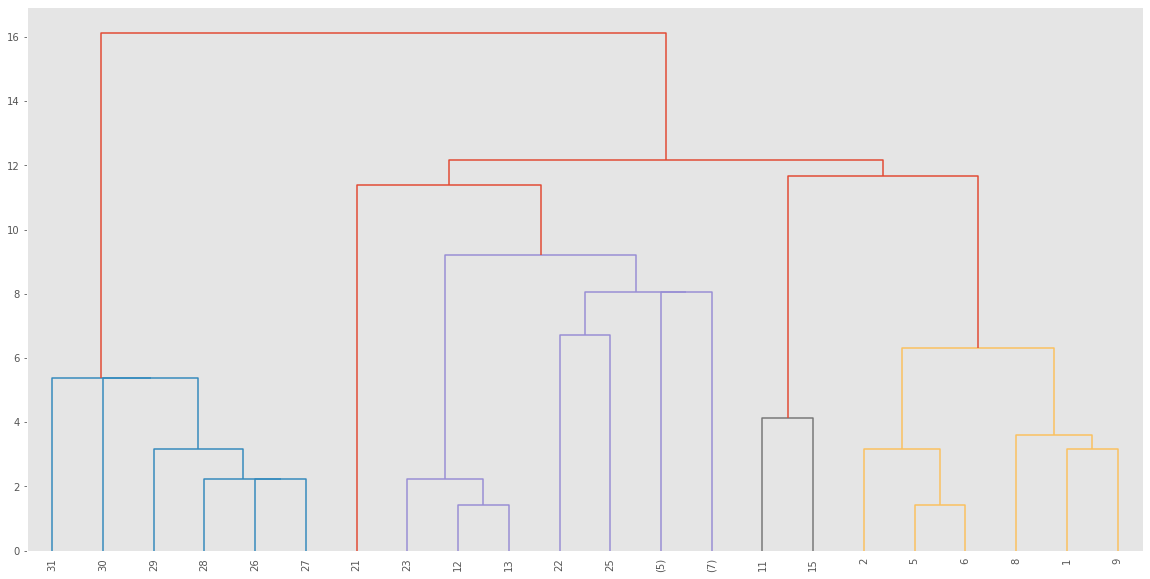

In [286]:
plt.figure(figsize=(20,10))
dendrogram = hierarchy.dendrogram(linkage_matrix,truncate_mode="level",p=5)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

In [163]:
df_istanbul_district_only_agg.head()

İLÇE  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
0    ARNAVUTKÖY                              21607.0   
1      ATAŞEHİR                              31612.0   
2       AVCILAR                              50617.0   
3  BAHÇELİEVLER                              82759.0   
4      BAKIRKÖY                              29809.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  \
0                                 13.7                             121012.2   
1                               5825.0                             345980.0   
2                               1800.0                             216556.0   
3                               7805.0                             569954.0   
4                               1794.0                             212747.0   

   İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
0         33177.0           413.0        261655.0                     41.1   
1         76344.0         10637.0        423372.0                      3.8   
2         71783.0         21621.0        435682.0                     12.5   
3         85464.0         26191.0        598454.0                      4.4   
4         37778.0          1667.0        222370.0                     13.3   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
0                     0.35                   450.48   
1                     0.42                    25.06   
2                     0.86                    41.99   
3                     0.53                    16.67   
4                     0.19                    29.76   

   İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
0                                201000                      167   
1                                486000                        9   
2                                252000                       66   
3                                264000                       28   
4                                525000                        6   

   İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
0                             36          0.771                2   
1                              6          3.545                1   
2                             29          1.640                1   
3                             17          2.423                1   
4                              4          4.465                1   

   İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                                                1.9       
1                                                2.7       
2                                                2.8       
3                                                3.8       
4                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                               11.1                  
3                                               11.3                  
4                                                8.6       

In [164]:
t = df_istanbul_district_only_agg.iloc[:,[0,3,5]]
t.head()

İLÇE  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_min
0    ARNAVUTKÖY                             121012.2           413.0
1      ATAŞEHİR                             345980.0         10637.0
2       AVCILAR                             216556.0         21621.0
3  BAHÇELİEVLER                             569954.0         26191.0
4      BAKIRKÖY                             212747.0          1667.0

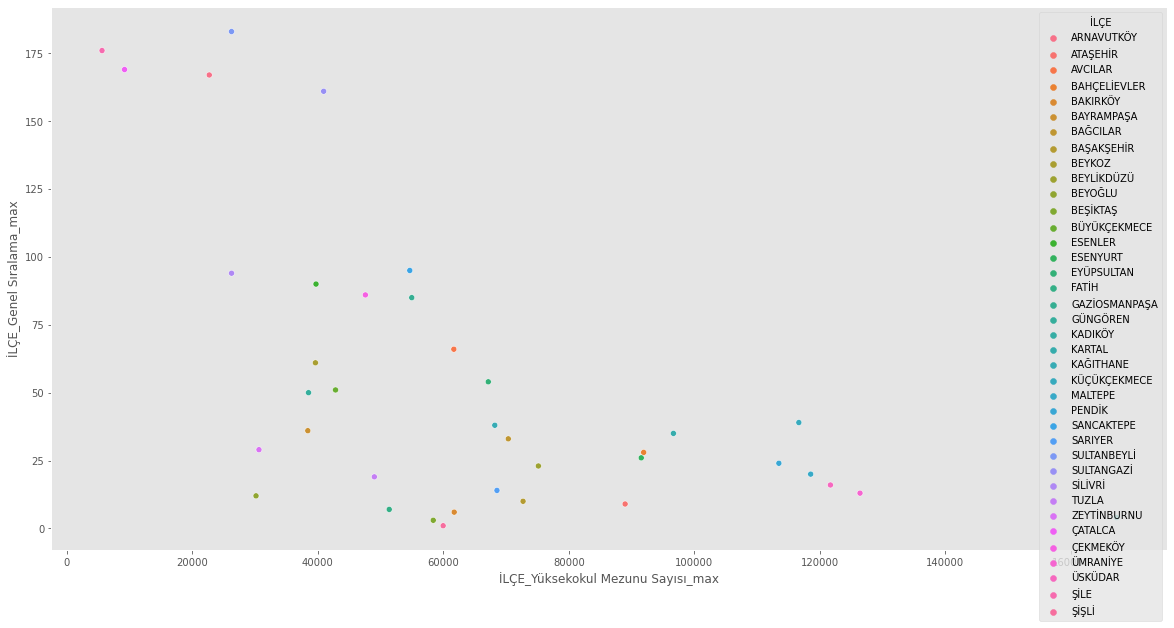

In [166]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_istanbul_district_only_agg,x='İLÇE_Yüksekokul Mezunu Sayısı_max',y='İLÇE_Genel Sıralama_max',hue='İLÇE')
plt.grid(False)
plt.show()

## İstanbul General

In [292]:
set(df_istanbul_district_only_agg.İLÇE) - set(df_brew_analyze_district_only_agg.İLÇE)

{'ESENLER', 'EYÜPSULTAN', 'GÜNGÖREN', 'ÇATALCA', 'ŞİLE'}

### districts that there are no brewstations

In [288]:
df = df_istanbul_district_only_agg.copy()
df = df.merge(df_nufüs_sum, on="İLÇE", how="left")
df.head()

İLÇE  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
0    ARNAVUTKÖY                              21607.0   
1      ATAŞEHİR                              31612.0   
2       AVCILAR                              50617.0   
3  BAHÇELİEVLER                              82759.0   
4      BAKIRKÖY                              29809.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  \
0                                 13.7                             121012.2   
1                               5825.0                             345980.0   
2                               1800.0                             216556.0   
3                               7805.0                             569954.0   
4                               1794.0                             212747.0   

   İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
0         33177.0           413.0        261655.0                     41.1   
1         76344.0         10637.0        423372.0                      3.8   
2         71783.0         21621.0        435682.0                     12.5   
3         85464.0         26191.0        598454.0                      4.4   
4         37778.0          1667.0        222370.0                     13.3   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
0                     0.35                   450.48   
1                     0.42                    25.06   
2                     0.86                    41.99   
3                     0.53                    16.67   
4                     0.19                    29.76   

   İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
0                                201000                      167   
1                                486000                        9   
2                                252000                       66   
3                                264000                       28   
4                                525000                        6   

   İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
0                             36          0.771                2   
1                              6          3.545                1   
2                             29          1.640                1   
3                             17          2.423                1   
4                              4          4.465                1   

   İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                                                1.9       
1                                                2.7       
2                                                2.8       
3                                                3.8       
4                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                               11.1                  
3                                               11.3                  
4                                                8.6       

In [289]:
df["Üniversite Yoğunluğu"] = df["İLÇE_Üniversite Sayısı_max"] / df["YÜZÖLÇÜMÜ(KM2)"]
df.head()

İLÇE  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
0    ARNAVUTKÖY                              21607.0   
1      ATAŞEHİR                              31612.0   
2       AVCILAR                              50617.0   
3  BAHÇELİEVLER                              82759.0   
4      BAKIRKÖY                              29809.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  \
0                                 13.7                             121012.2   
1                               5825.0                             345980.0   
2                               1800.0                             216556.0   
3                               7805.0                             569954.0   
4                               1794.0                             212747.0   

   İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
0         33177.0           413.0        261655.0                     41.1   
1         76344.0         10637.0        423372.0                      3.8   
2         71783.0         21621.0        435682.0                     12.5   
3         85464.0         26191.0        598454.0                      4.4   
4         37778.0          1667.0        222370.0                     13.3   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
0                     0.35                   450.48   
1                     0.42                    25.06   
2                     0.86                    41.99   
3                     0.53                    16.67   
4                     0.19                    29.76   

   İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
0                                201000                      167   
1                                486000                        9   
2                                252000                       66   
3                                264000                       28   
4                                525000                        6   

   İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
0                             36          0.771                2   
1                              6          3.545                1   
2                             29          1.640                1   
3                             17          2.423                1   
4                              4          4.465                1   

   İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                                                1.9       
1                                                2.7       
2                                                2.8       
3                                                3.8       
4                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                               11.1                  
3                                               11.3                  
4                                                8.6       

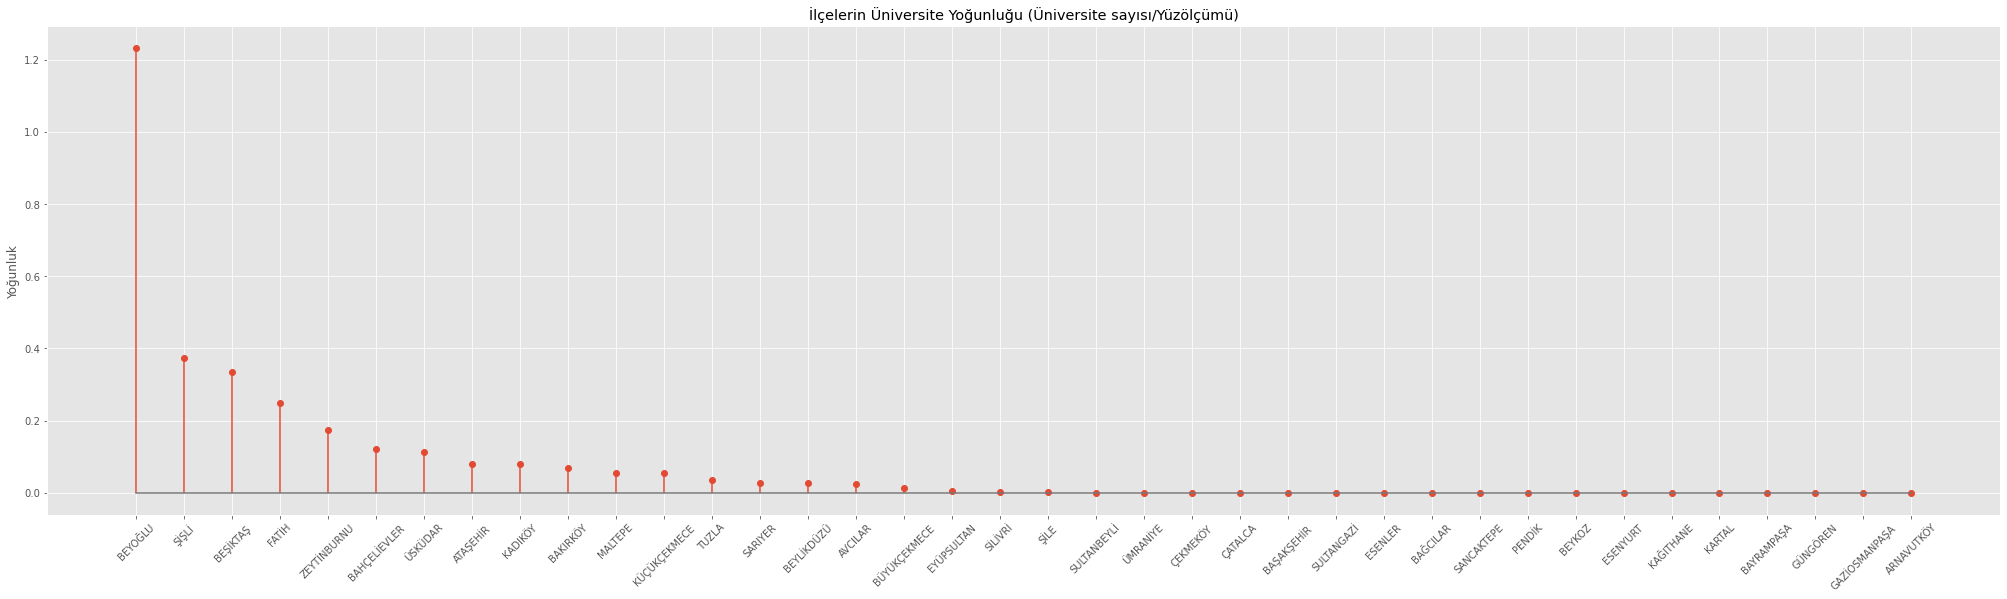

In [290]:
df_vis = df.sort_values(by='Üniversite Yoğunluğu', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "Üniversite Yoğunluğu", data=df_vis)
plt.title("İlçelerin Üniversite Yoğunluğu (Üniversite sayısı/Yüzölçümü)")
plt.ylabel("Yoğunluk")
plt.xticks(rotation=45)
plt.show()


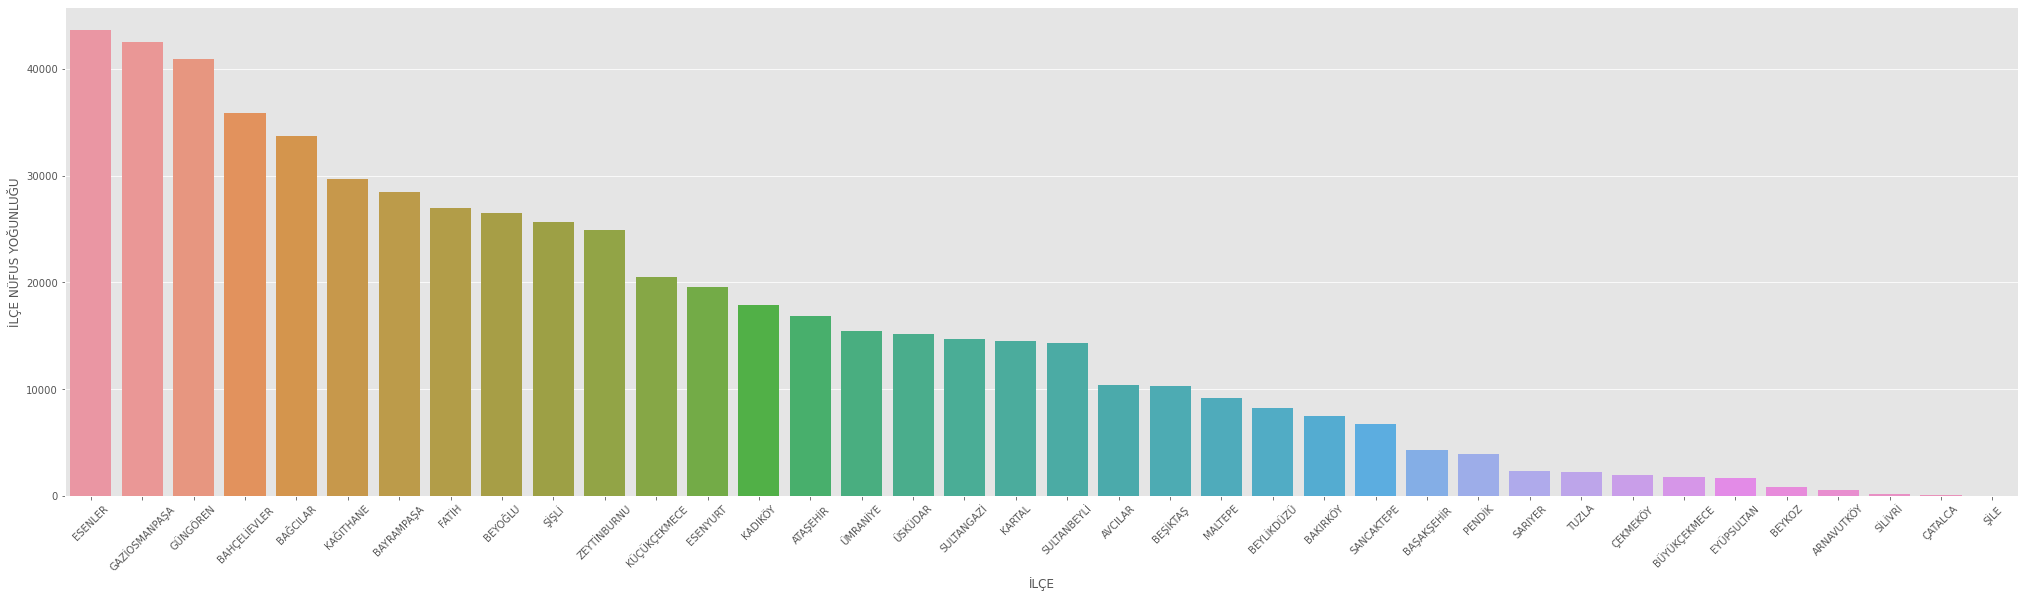

In [293]:
df_vis = df.sort_values(by='İLÇE NÜFUS YOĞUNLUĞU', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
sns.barplot(x=df_vis["İLÇE"], y="İLÇE NÜFUS YOĞUNLUĞU", data=df_vis)
plt.xticks(rotation=45)
plt.show()

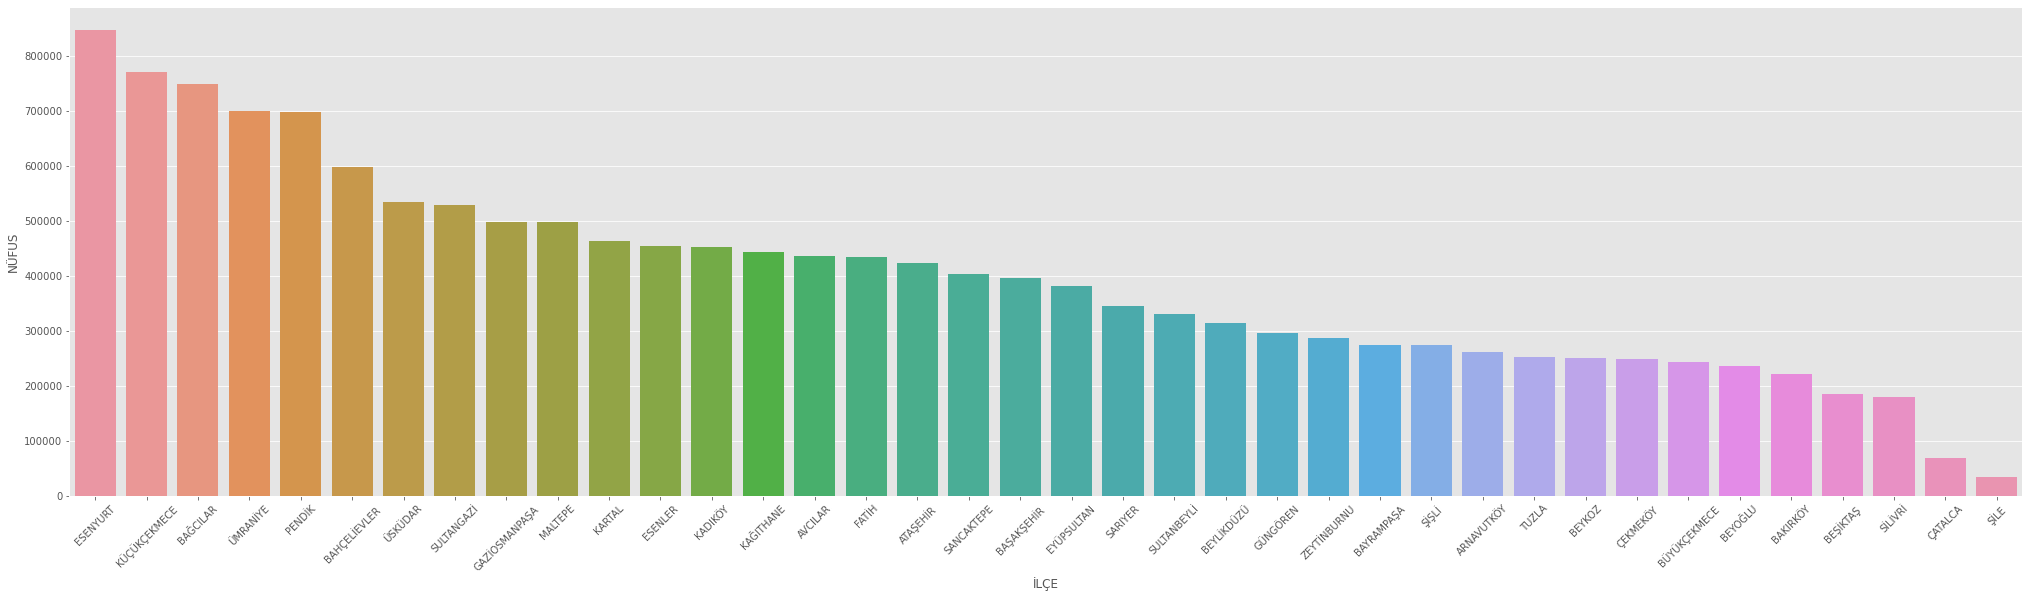

In [295]:
df_vis = df.sort_values(by='NÜFUS', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
sns.barplot(x=df_vis["İLÇE"], y="NÜFUS", data=df_vis)
plt.xticks(rotation=45)
plt.show()

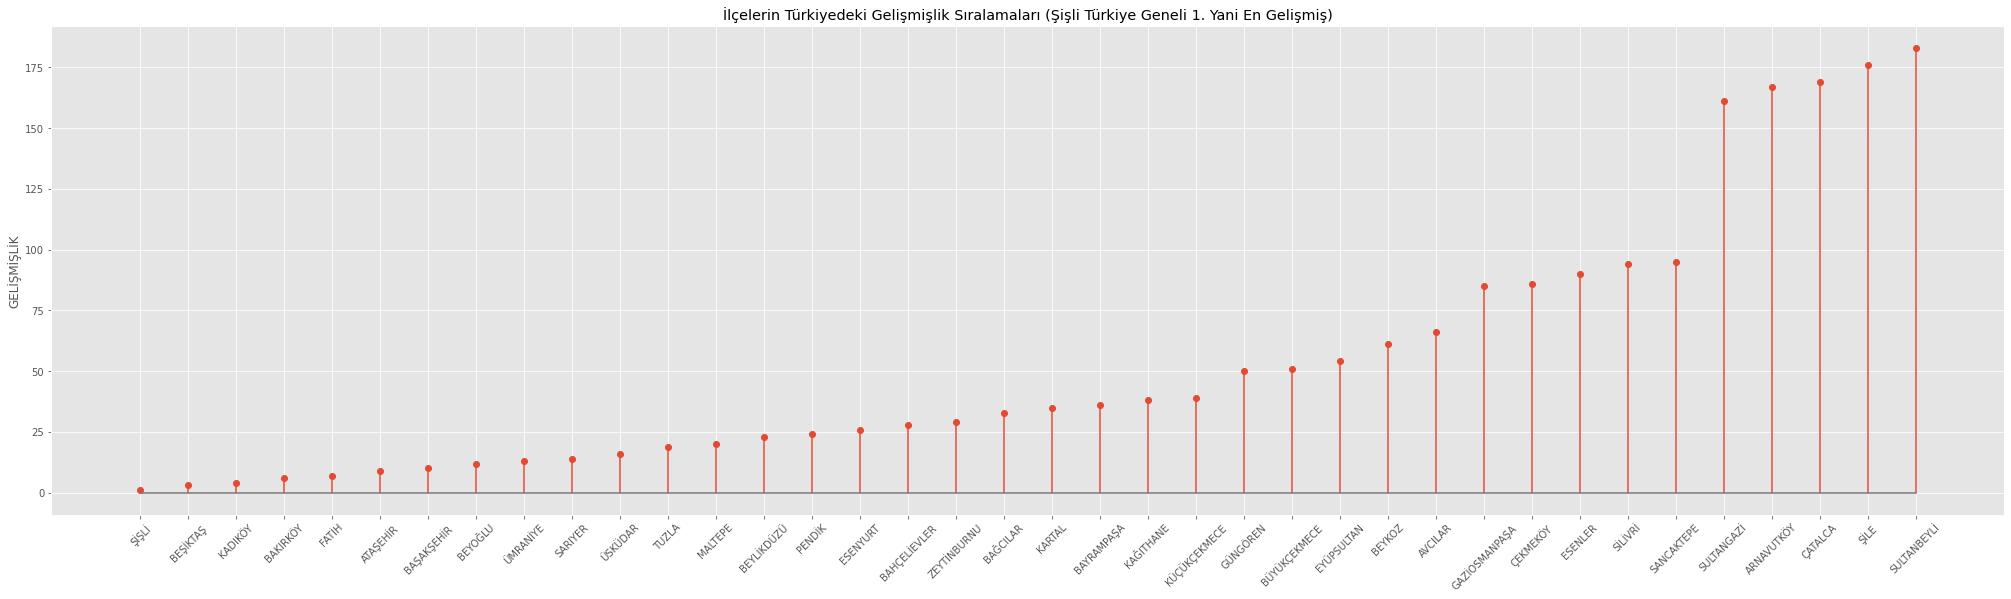

In [298]:
df_vis = df.sort_values(by='İLÇE_Genel Sıralama_max')
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_Genel Sıralama_max", data=df_vis)
plt.title("İlçelerin Türkiyedeki Gelişmişlik Sıralamaları (Şişli Türkiye Geneli 1. Yani En Gelişmiş)")
plt.ylabel("GELİŞMİŞLİK")
plt.xticks(rotation=45)
plt.show()


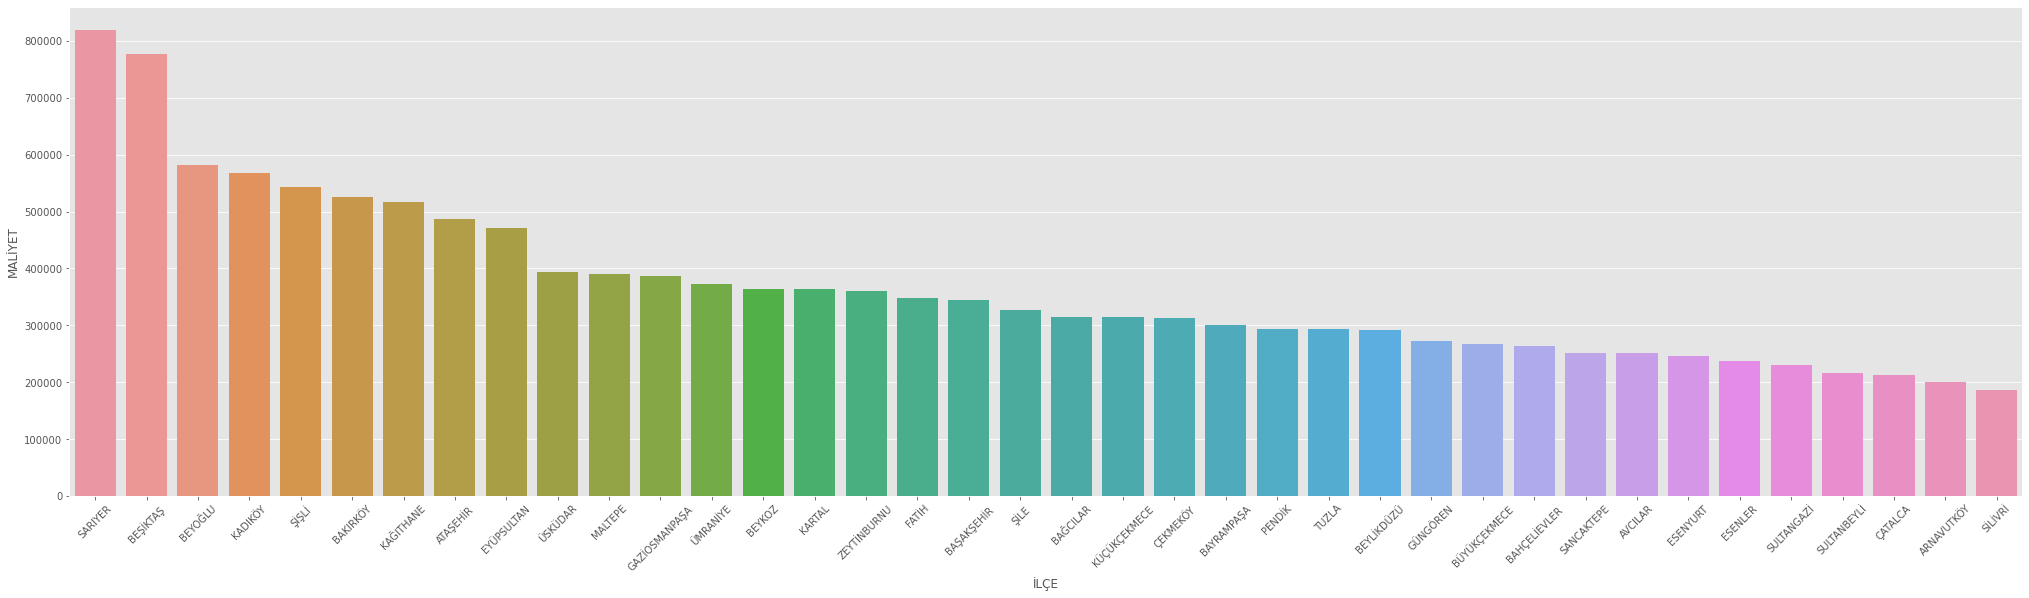

In [299]:
df_vis = df.sort_values(by='İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
sns.barplot(x=df_vis["İLÇE"], y="İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max", data=df_vis)
plt.xticks(rotation=45)
plt.ylabel("MALİYET")
plt.show()

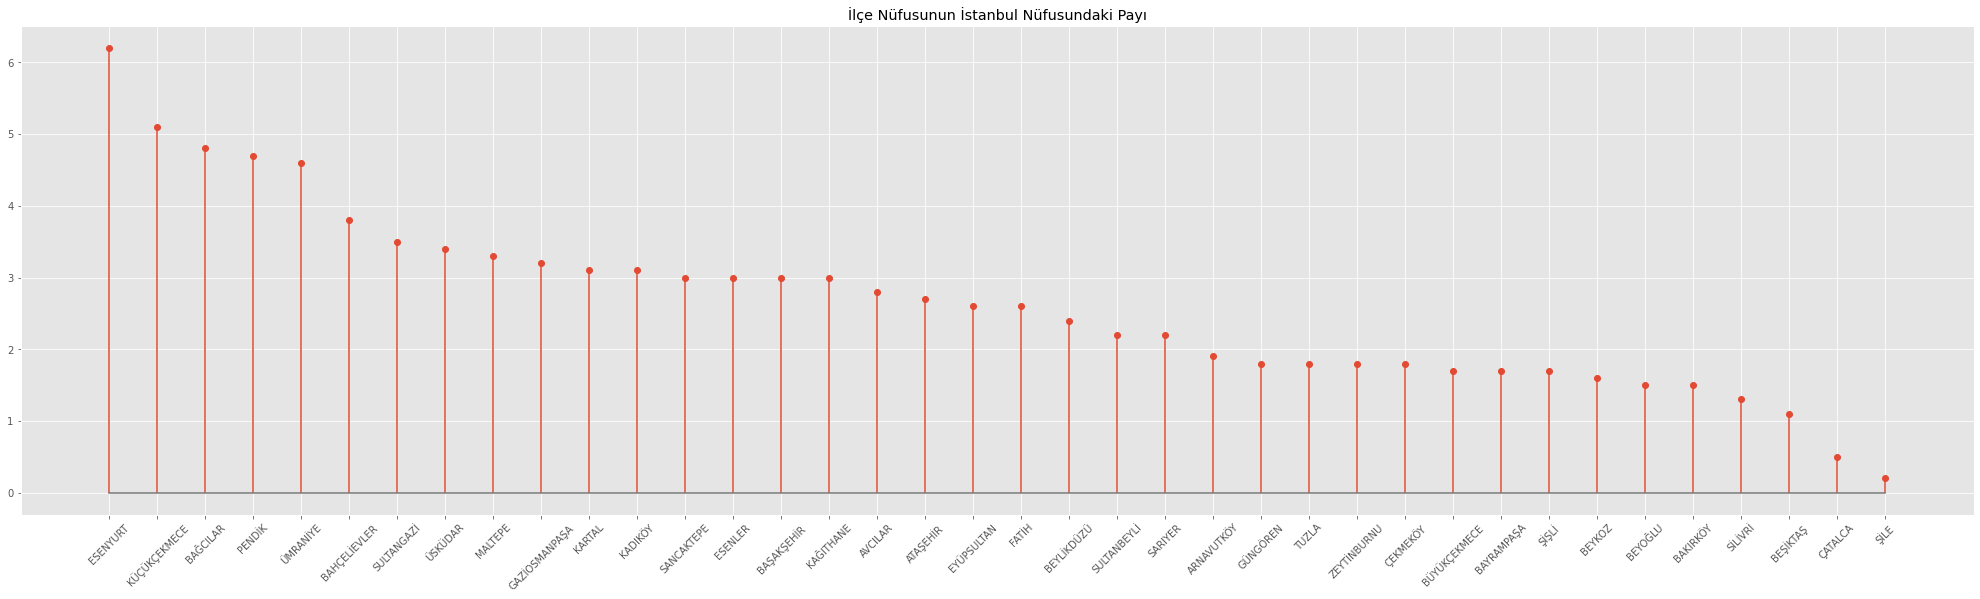

In [303]:
df_vis = df.sort_values(by='İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max", data=df_vis)
plt.title("İlçe Nüfusunun İstanbul Nüfusundaki Payı")
plt.xticks(rotation=45)
plt.show()


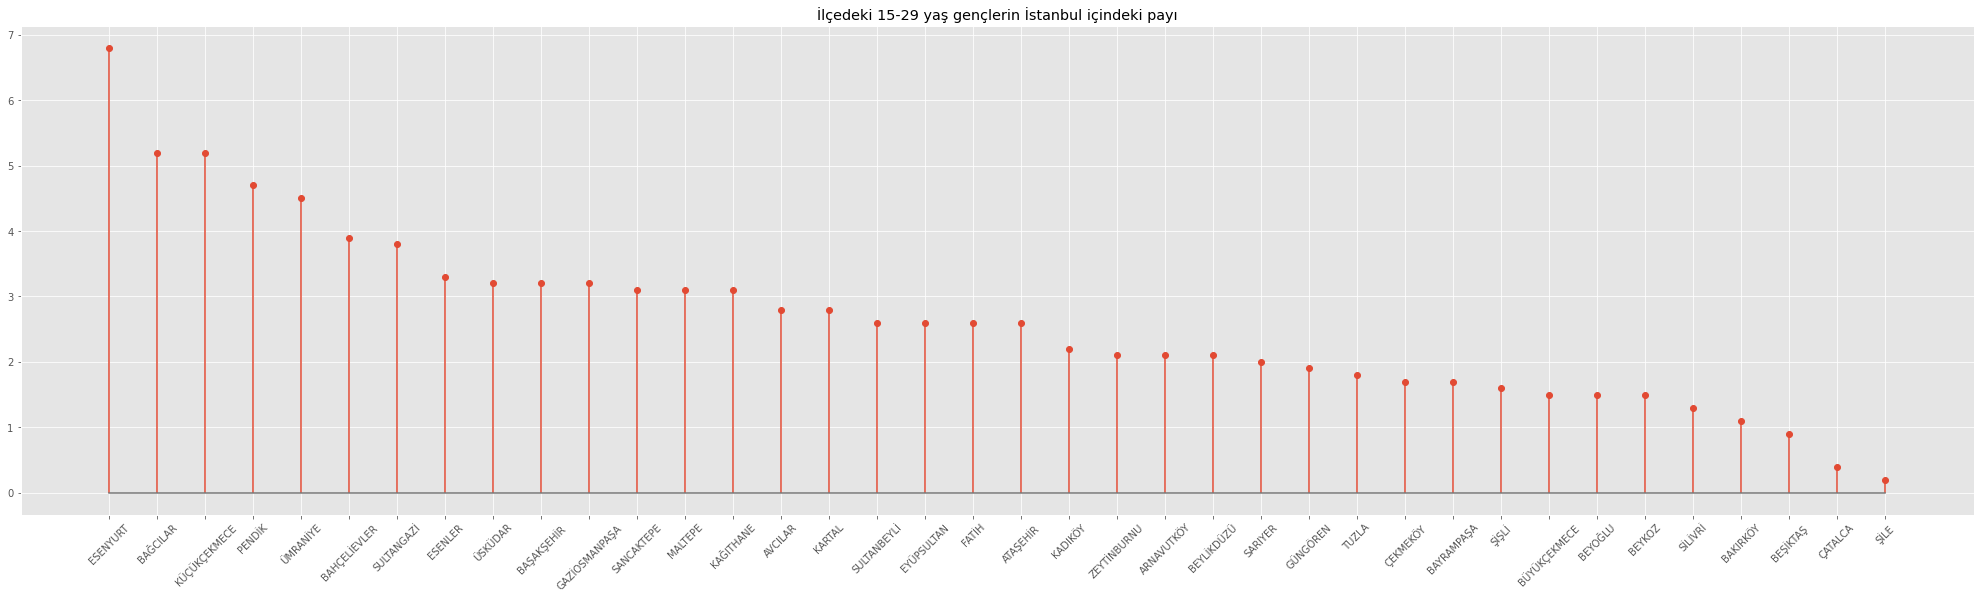

In [304]:
df_vis = df.sort_values(by='İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max", data=df_vis)
plt.title("İlçedeki 15-29 yaş gençlerin İstanbul içindeki payı")
plt.xticks(rotation=45)
plt.show()


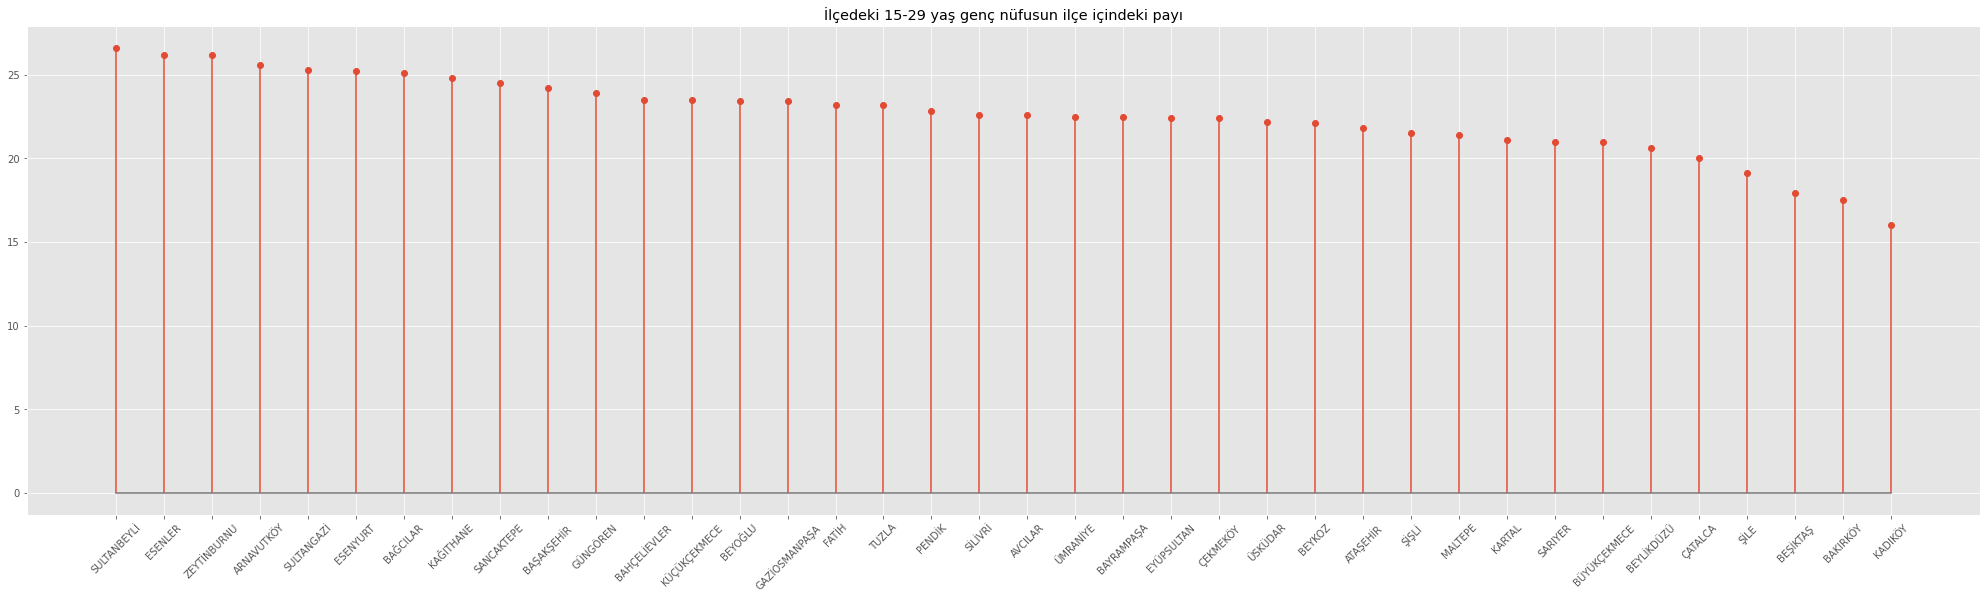

In [306]:

df_vis = df.sort_values(by='İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max", data=df_vis)
plt.title("İlçedeki 15-29 yaş genç nüfusun ilçe içindeki payı")
plt.xticks(rotation=45)
plt.show()


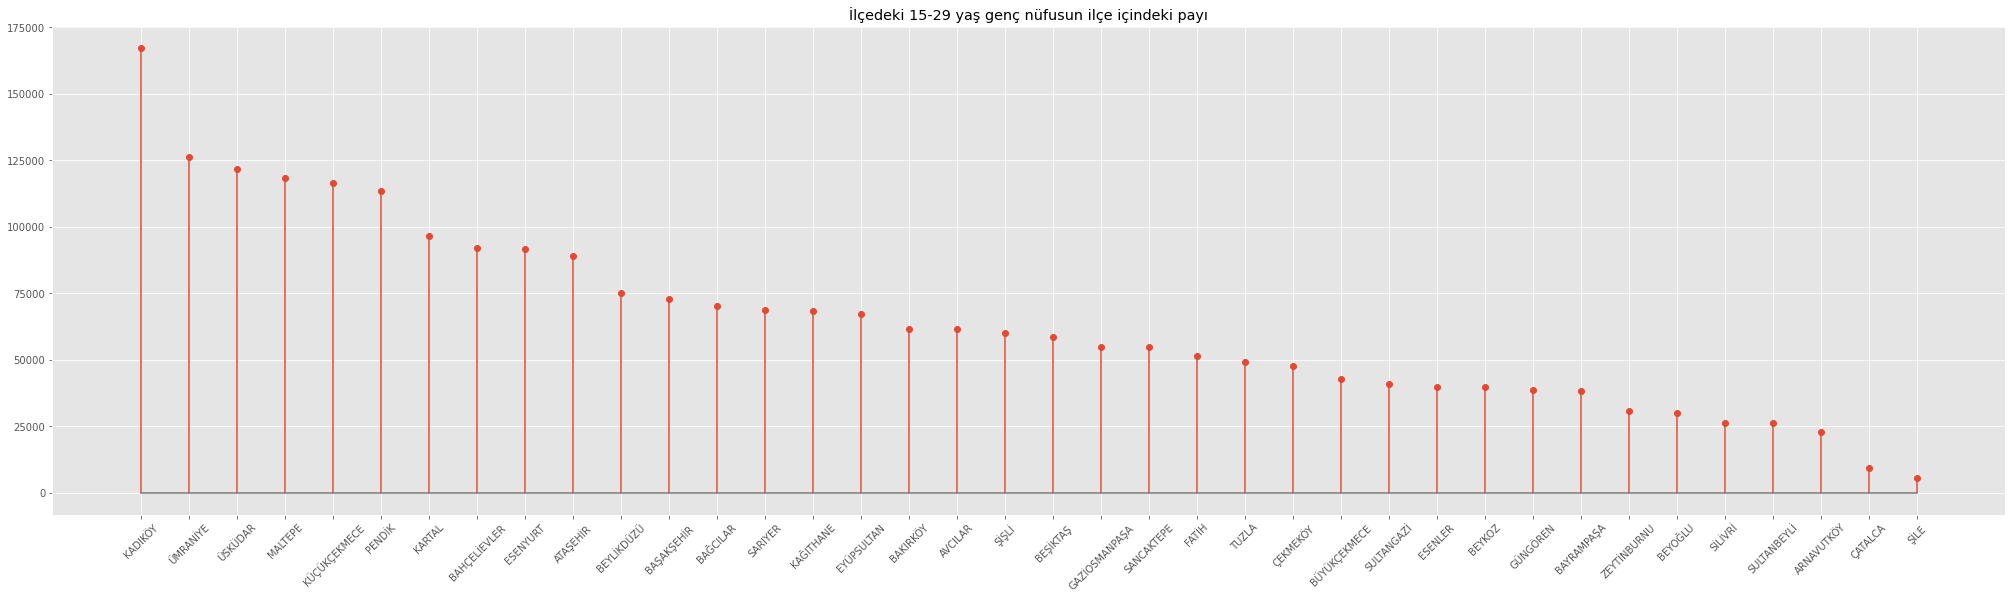

In [307]:

df_vis = df.sort_values(by='İLÇE_Yüksekokul Mezunu Sayısı_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_Yüksekokul Mezunu Sayısı_max", data=df_vis)
plt.title("İlçedeki 15-29 yaş genç nüfusun ilçe içindeki payı")
plt.xticks(rotation=45)
plt.show()



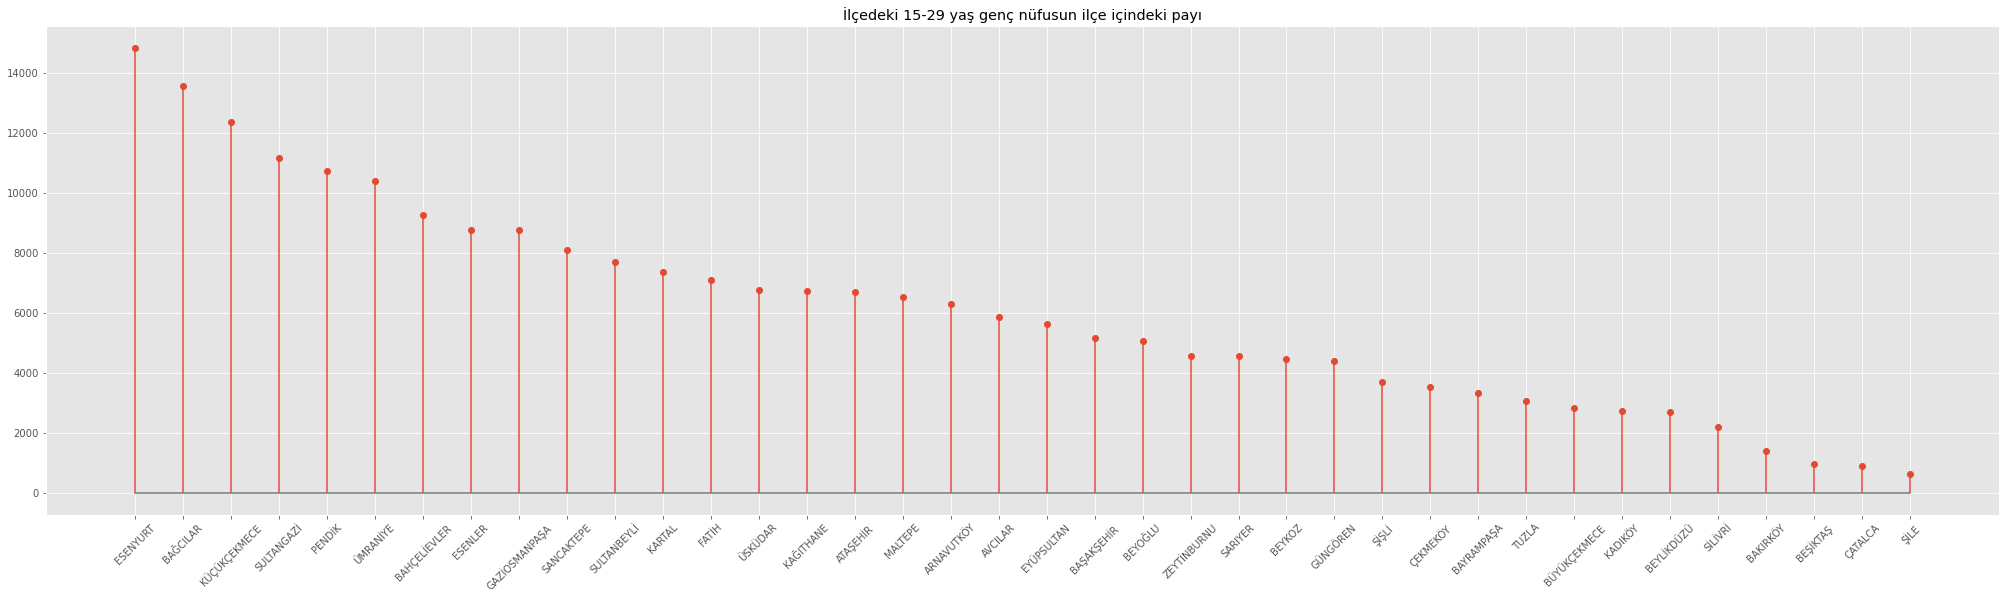

In [308]:

df_vis = df.sort_values(by='İLÇE_Okuma Yazma\nBilmeyen Sayısı_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_Okuma Yazma\nBilmeyen Sayısı_max", data=df_vis)
plt.title("İlçedeki 15-29 yaş genç nüfusun ilçe içindeki payı")
plt.xticks(rotation=45)
plt.show()




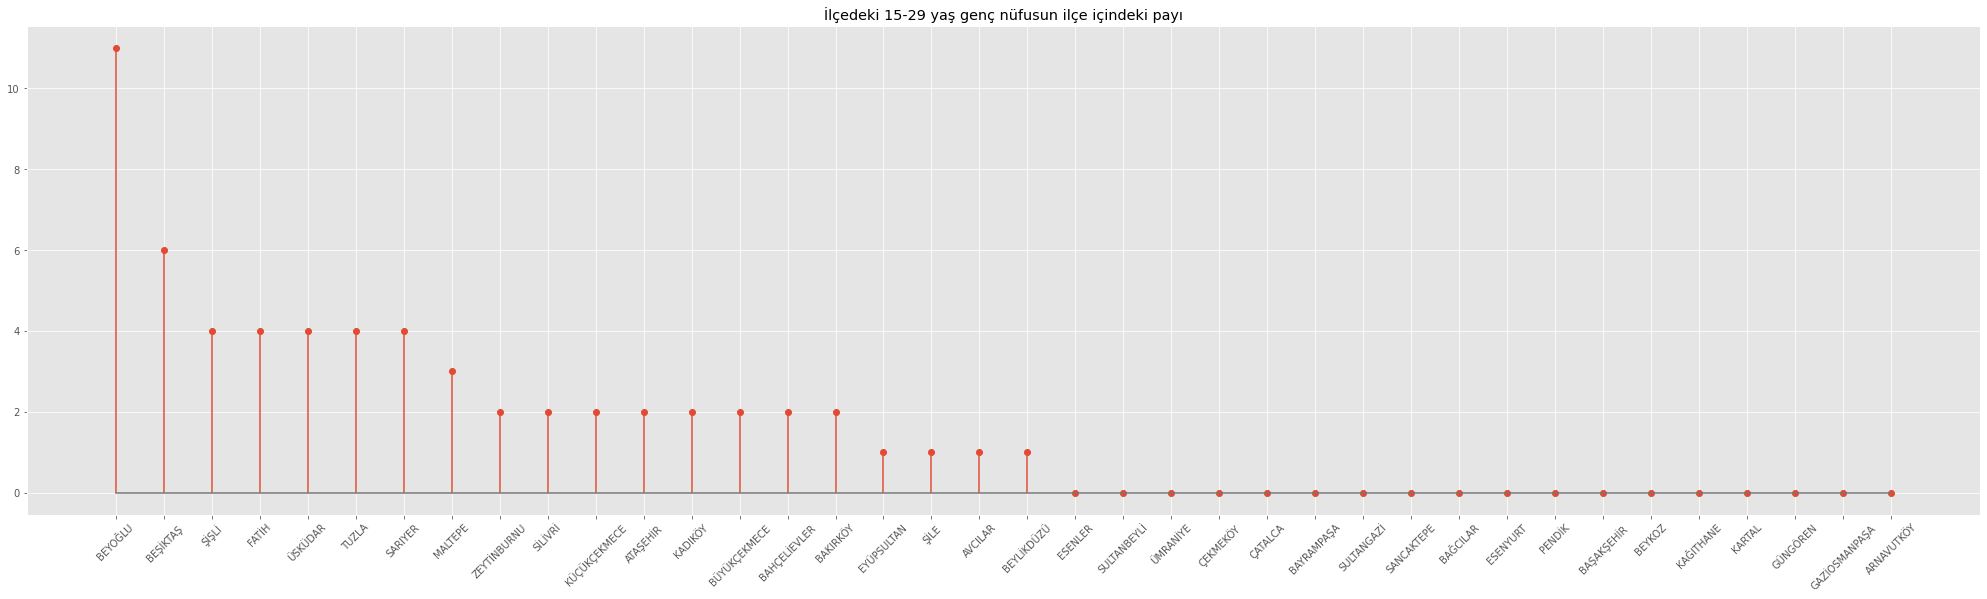

In [312]:


df_vis = df.sort_values(by='İLÇE_Üniversite Sayısı_max', ascending=False)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(35, 9))
ax.stem(df_vis["İLÇE"], "İLÇE_Üniversite Sayısı_max", data=df_vis)
plt.title("İlçedeki 15-29 yaş genç nüfusun ilçe içindeki payı")
plt.xticks(rotation=45)
plt.show()




In [313]:
df.head()

İLÇE  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
0    ARNAVUTKÖY                              21607.0   
1      ATAŞEHİR                              31612.0   
2       AVCILAR                              50617.0   
3  BAHÇELİEVLER                              82759.0   
4      BAKIRKÖY                              29809.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  \
0                                 13.7                             121012.2   
1                               5825.0                             345980.0   
2                               1800.0                             216556.0   
3                               7805.0                             569954.0   
4                               1794.0                             212747.0   

   İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
0         33177.0           413.0        261655.0                     41.1   
1         76344.0         10637.0        423372.0                      3.8   
2         71783.0         21621.0        435682.0                     12.5   
3         85464.0         26191.0        598454.0                      4.4   
4         37778.0          1667.0        222370.0                     13.3   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
0                     0.35                   450.48   
1                     0.42                    25.06   
2                     0.86                    41.99   
3                     0.53                    16.67   
4                     0.19                    29.76   

   İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
0                                201000                      167   
1                                486000                        9   
2                                252000                       66   
3                                264000                       28   
4                                525000                        6   

   İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
0                             36          0.771                2   
1                              6          3.545                1   
2                             29          1.640                1   
3                             17          2.423                1   
4                              4          4.465                1   

   İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                                                1.9       
1                                                2.7       
2                                                2.8       
3                                                3.8       
4                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                               11.1                  
3                                               11.3                  
4                                                8.6       

In [314]:
df_dummies = pd.get_dummies(df)

In [315]:
df_dummies.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
0                              21607.0                                 13.7   
1                              31612.0                               5825.0   
2                              50617.0                               1800.0   
3                              82759.0                               7805.0   
4                              29809.0                               1794.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  \
0                             121012.2         33177.0           413.0   
1                             345980.0         76344.0         10637.0   
2                             216556.0         71783.0         21621.0   
3                             569954.0         85464.0         26191.0   
4                             212747.0         37778.0          1667.0   

   İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  İLÇE_YÜZÖLÇÜMÜ(KM2)_min  \
0        261655.0                     41.1                     0.35   
1        423372.0                      3.8                     0.42   
2        435682.0                     12.5                     0.86   
3        598454.0                      4.4                     0.53   
4        222370.0                     13.3                     0.19   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
0                   450.48                                201000   
1                    25.06                                486000   
2                    41.99                                252000   
3                    16.67                                264000   
4                    29.76                                525000   

   İLÇE_Genel Sıralama_max  İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  \
0                      167                             36          0.771   
1                        9                              6          3.545   
2                       66                             29          1.640   
3                       28                             17          2.423   
4                        6                              4          4.465   

   İLÇE_Kademe_max  İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                2                                                1.9       
1                1                                                2.7       
2                1                                                2.8       
3                1                                                3.8       
4                1                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                               11.1                  
3                                               11.3                  
4                                                8.6                  

   İLÇE_15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı_max  \
0                      

In [316]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dummies)

In [317]:
df_scaled[0]

array([-0.95439186, -0.65181716, -0.97126085, -0.61102063, -0.75725448,
       -0.71626536,  0.76639314, -0.22715713,  1.30095418, -1.12886753,
        2.1434833 ,  1.42672983, -1.24541534,  1.67332005, -0.58296404,
       -0.38762877,  1.26588862,  1.35211022,  1.01511482, -0.71126802,
       -1.1821122 ,  0.06282547, -0.71626536,  1.30095418, -1.13312291,
       -0.38492743,  6.08276253, -0.16439899, -0.16439899, -0.16439899,
       -0.16439899, -0.16439899, -0.16439899, -0.16439899, -0.16439899,
       -0.16439899, -0.16439899, -0.16439899, -0.16439899, -0.16439899,
       -0.16439899, -0.16439899, -0.16439899, -0.16439899, -0.16439899,
       -0.16439899, -0.16439899, -0.16439899, -0.16439899, -0.16439899,
       -0.16439899, -0.16439899, -0.16439899, -0.16439899, -0.16439899,
       -0.16439899, -0.16439899, -0.16439899, -0.16439899, -0.16439899,
       -0.16439899, -0.16439899, -0.16439899, -0.16439899])

## Model

In [318]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

In [319]:
k_means_model = KMeans(n_clusters=3)

In [320]:
k_means_model.fit(df_scaled)

KMeans(n_clusters=3)

In [321]:
cluster_labels = k_means_model.predict(df_scaled)

In [322]:
cluster_labels

array([2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0])

In [323]:
df_dummies["Cluster"] = cluster_labels

In [324]:
df_dummies.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
0                              21607.0                                 13.7   
1                              31612.0                               5825.0   
2                              50617.0                               1800.0   
3                              82759.0                               7805.0   
4                              29809.0                               1794.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  \
0                             121012.2         33177.0           413.0   
1                             345980.0         76344.0         10637.0   
2                             216556.0         71783.0         21621.0   
3                             569954.0         85464.0         26191.0   
4                             212747.0         37778.0          1667.0   

   İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  İLÇE_YÜZÖLÇÜMÜ(KM2)_min  \
0        261655.0                     41.1                     0.35   
1        423372.0                      3.8                     0.42   
2        435682.0                     12.5                     0.86   
3        598454.0                      4.4                     0.53   
4        222370.0                     13.3                     0.19   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
0                   450.48                                201000   
1                    25.06                                486000   
2                    41.99                                252000   
3                    16.67                                264000   
4                    29.76                                525000   

   İLÇE_Genel Sıralama_max  İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  \
0                      167                             36          0.771   
1                        9                              6          3.545   
2                       66                             29          1.640   
3                       28                             17          2.423   
4                        6                              4          4.465   

   İLÇE_Kademe_max  İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                2                                                1.9       
1                1                                                2.7       
2                1                                                2.8       
3                1                                                3.8       
4                1                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                               11.1                  
3                                               11.3                  
4                                                8.6                  

   İLÇE_15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı_max  \
0                      

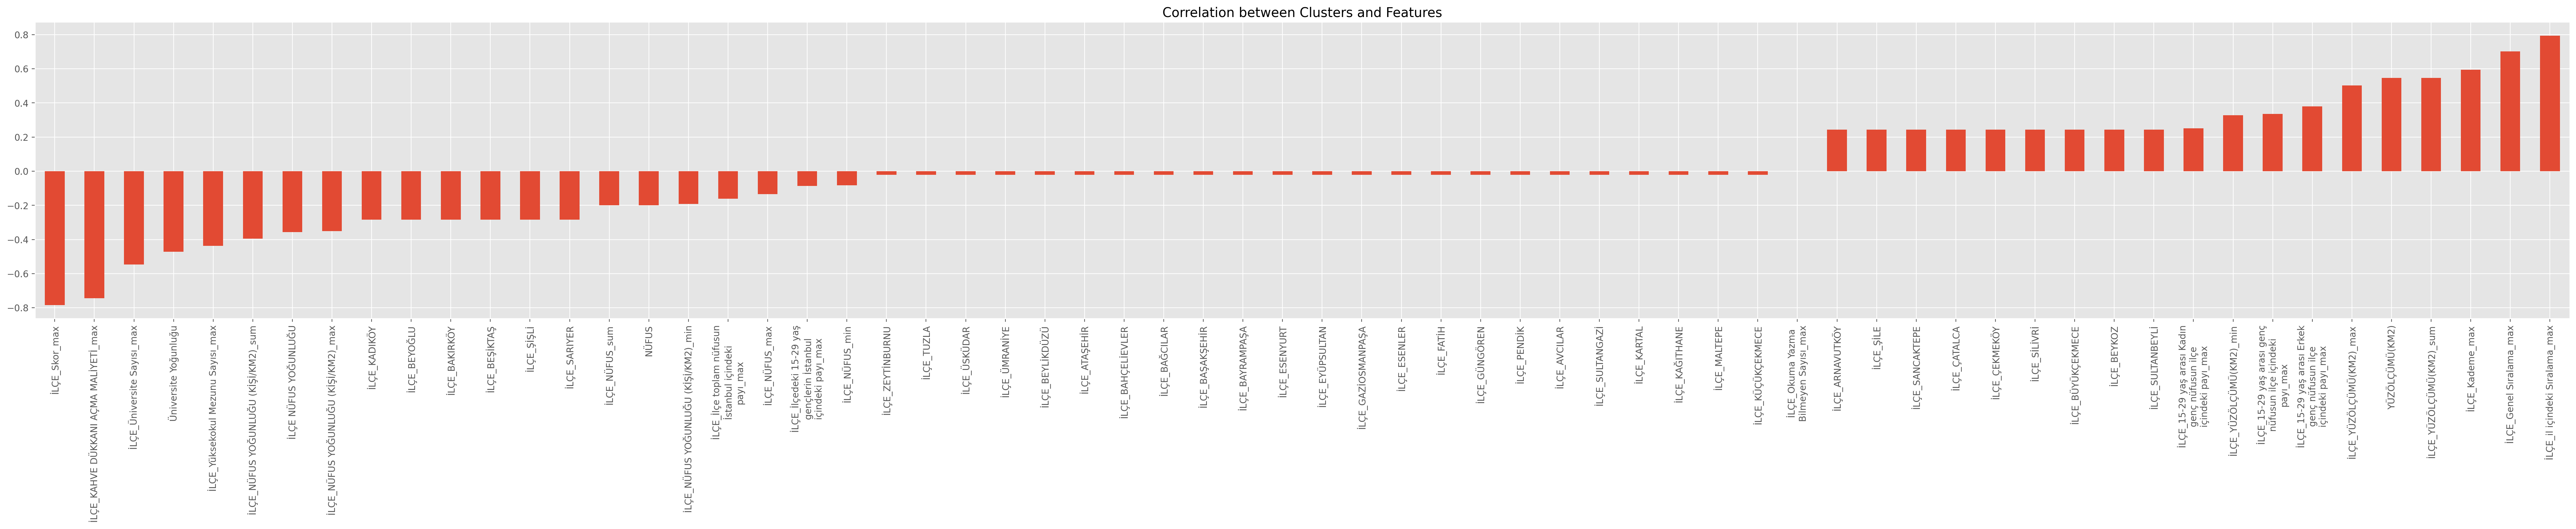

In [325]:
plt.figure(figsize=(50,6),dpi=200)
df_dummies.corr()["Cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Correlation between Clusters and Features")
plt.show()

In [326]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(df_dummies)
    
    ssd.append(model.inertia_)

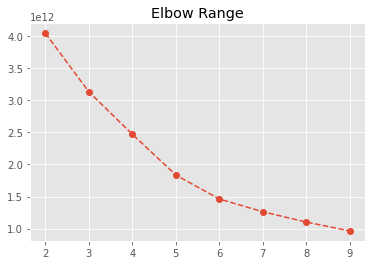

In [327]:
plt.plot(range(2,10),ssd,"o--")
plt.title("Elbow Range")
plt.show()

## İstanbul general hierarchical clustering

In [330]:
df_dummies = pd.get_dummies(df)

In [331]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_dummies)
df_scaled[:5]

array([[2.17009410e-01, 3.63499676e-04, 8.40440091e-02, 2.90609902e-01,
        1.52423884e-02, 2.79190151e-01, 2.37317990e-01, 6.11750454e-02,
        4.13204803e-01, 2.36966825e-02, 9.12087912e-01, 9.21052632e-01,
        1.38645418e-02, 1.00000000e+00, 2.83333333e-01, 2.87878788e-01,
        9.05660377e-01, 9.20000000e-01, 8.79310345e-01, 0.00000000e+00,
        1.05713279e-01, 3.99437610e-01, 2.79190151e-01, 4.13204803e-01,
        1.22969096e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [332]:
df_scaled  = pd.DataFrame(df_scaled,columns=df_dummies.columns)
df_scaled.head()

İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  \
0                             0.217009                             0.000363   
1                             0.321504                             0.240410   
2                             0.519995                             0.074150   
3                             0.855693                             0.322197   
4                             0.302673                             0.073902   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  \
0                             0.084044        0.290610        0.015242   
1                             0.244607        0.800539        0.405814   
2                             0.152235        0.746660        0.825419   
3                             0.404461        0.908273        1.000000   
4                             0.149517        0.344961        0.063147   

   İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  İLÇE_YÜZÖLÇÜMÜ(KM2)_min  \
0        0.279190                 0.237318                 0.061175   
1        0.478506                 0.018318                 0.075308   
2        0.493678                 0.069399                 0.164143   
3        0.694294                 0.021841                 0.097517   
4        0.230772                 0.074096                 0.028871   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
0                 0.413205                              0.023697   
1                 0.016595                              0.473934   
2                 0.032378                              0.104265   
3                 0.008773                              0.123223   
4                 0.020976                              0.535545   

   İLÇE_Genel Sıralama_max  İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  \
0                 0.912088                       0.921053       0.013865   
1                 0.043956                       0.131579       0.455936   
2                 0.357143                       0.736842       0.152351   
3                 0.148352                       0.421053       0.277131   
4                 0.027473                       0.078947       0.602550   

   İLÇE_Kademe_max  İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0              1.0                                           0.283333       
1              0.0                                           0.416667       
2              0.0                                           0.433333       
3              0.0                                           0.600000       
4              0.0                                           0.216667       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                           0.287879                
1                                           0.363636                
2                                           0.393939                
3                                           0.560606                
4                                           0.136364                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                           0.905660            
1                                           0.547170            
2                                           0.622642            
3                                           0.707547            
4                                           0.141509            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               0.92                  
1                                               0.58                  
2                                               0.60                  
3                                               0.64                  
4                                               0.10                  

   İLÇE_15-29 yaş arası Erkek\ngenç nüfusun ilçe\niçindeki payı_max  \
0                      

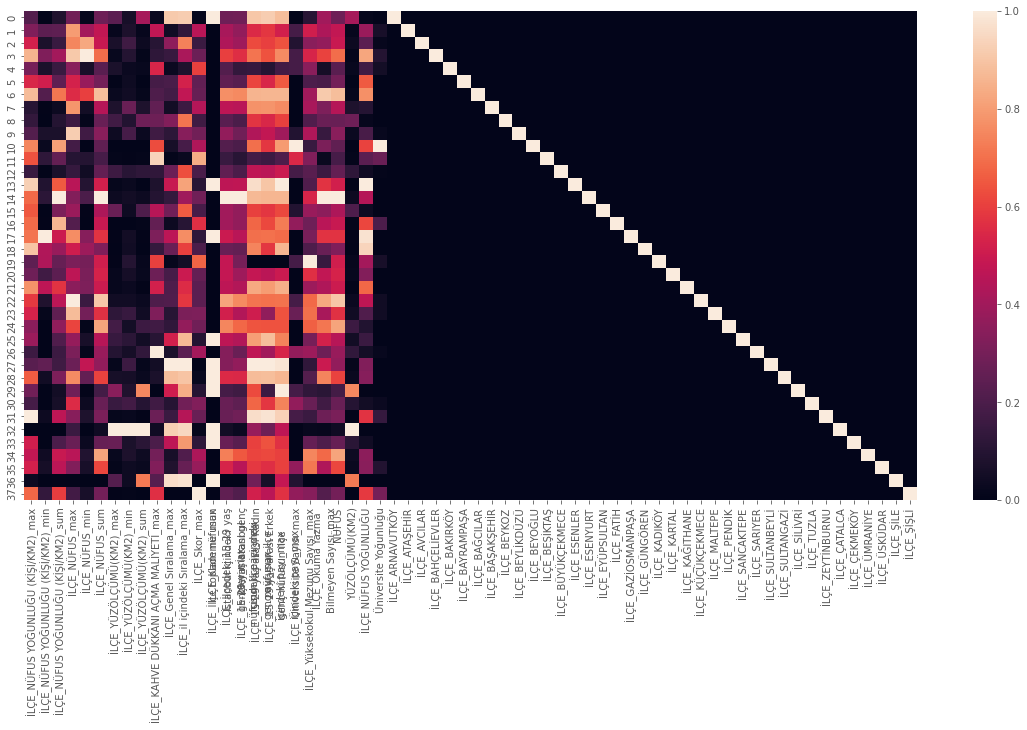

In [333]:
plt.figure(figsize=(20,9))
sns.heatmap(df_scaled)
plt.show()

<Figure size 1440x648 with 0 Axes>

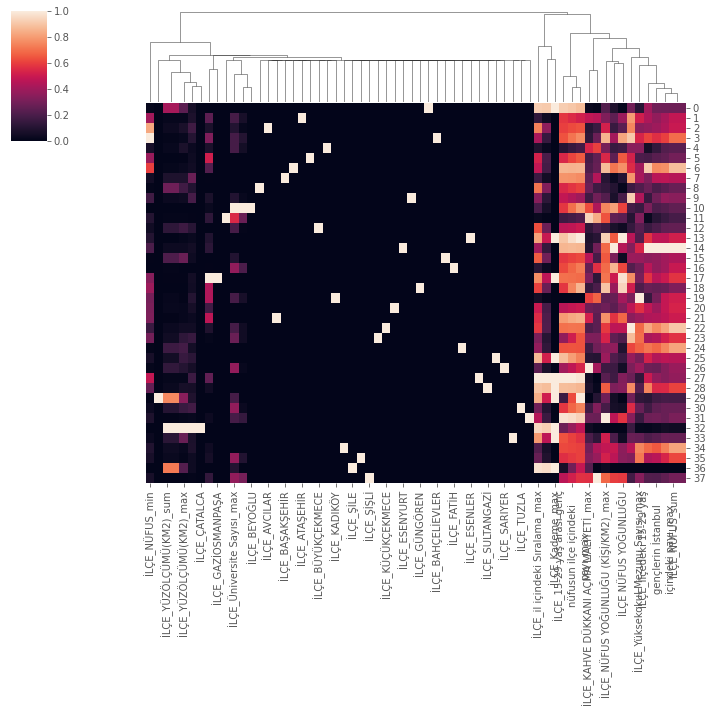

In [334]:
plt.figure(figsize=(20,9))
sns.clustermap(df_scaled,row_cluster=False)
plt.show()

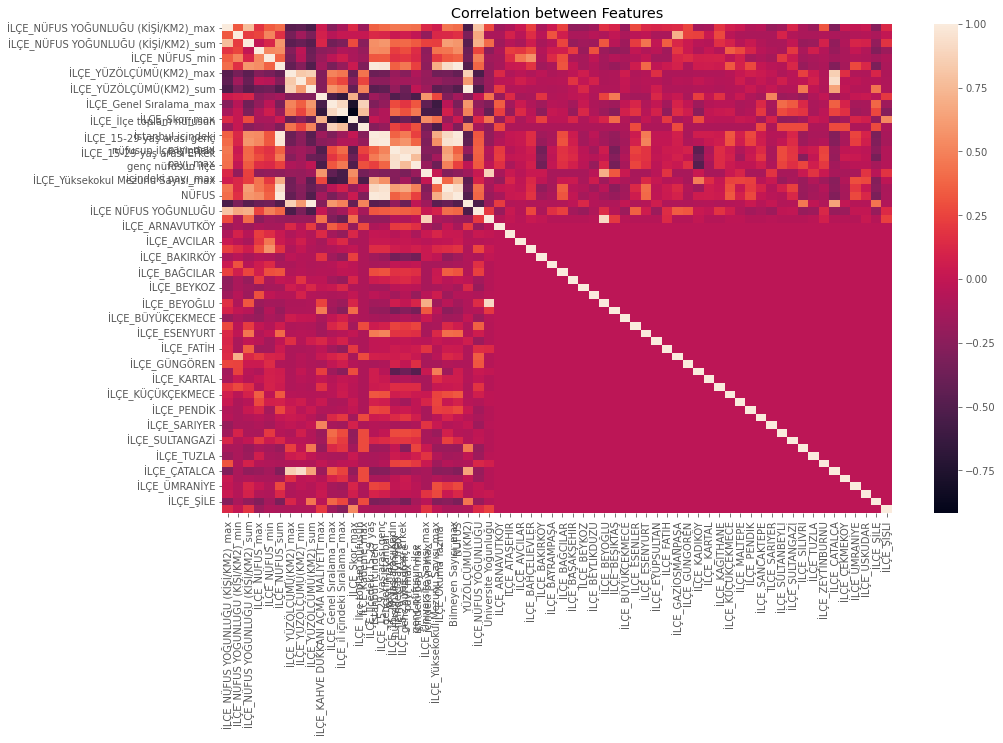

In [335]:
plt.figure(figsize=(15,9))
sns.heatmap(df_scaled.corr())
plt.title("Correlation between Features")
plt.show()

In [ ]:
3, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 2, 0, 4, 0, 1, 2, 0, 0, 4

In [336]:
hier_model = AgglomerativeClustering(n_clusters=5,affinity="euclidean")
cluster_labels = hier_model.fit_predict(df_scaled)
cluster_labels[:20]

array([3, 0, 0, 0, 1, 0, 4, 0, 0, 0, 1, 1, 0, 3, 4, 0, 1, 3, 0, 1],
      dtype=int64)

In [337]:
df_istanbul_district_only_agg.head()

İLÇE  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
0    ARNAVUTKÖY                              21607.0   
1      ATAŞEHİR                              31612.0   
2       AVCILAR                              50617.0   
3  BAHÇELİEVLER                              82759.0   
4      BAKIRKÖY                              29809.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  \
0                                 13.7                             121012.2   
1                               5825.0                             345980.0   
2                               1800.0                             216556.0   
3                               7805.0                             569954.0   
4                               1794.0                             212747.0   

   İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
0         33177.0           413.0        261655.0                     41.1   
1         76344.0         10637.0        423372.0                      3.8   
2         71783.0         21621.0        435682.0                     12.5   
3         85464.0         26191.0        598454.0                      4.4   
4         37778.0          1667.0        222370.0                     13.3   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
0                     0.35                   450.48   
1                     0.42                    25.06   
2                     0.86                    41.99   
3                     0.53                    16.67   
4                     0.19                    29.76   

   İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
0                                201000                      167   
1                                486000                        9   
2                                252000                       66   
3                                264000                       28   
4                                525000                        6   

   İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
0                             36          0.771                2   
1                              6          3.545                1   
2                             29          1.640                1   
3                             17          2.423                1   
4                              4          4.465                1   

   İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                                                1.9       
1                                                2.7       
2                                                2.8       
3                                                3.8       
4                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                               11.1                  
3                                               11.3                  
4                                                8.6       

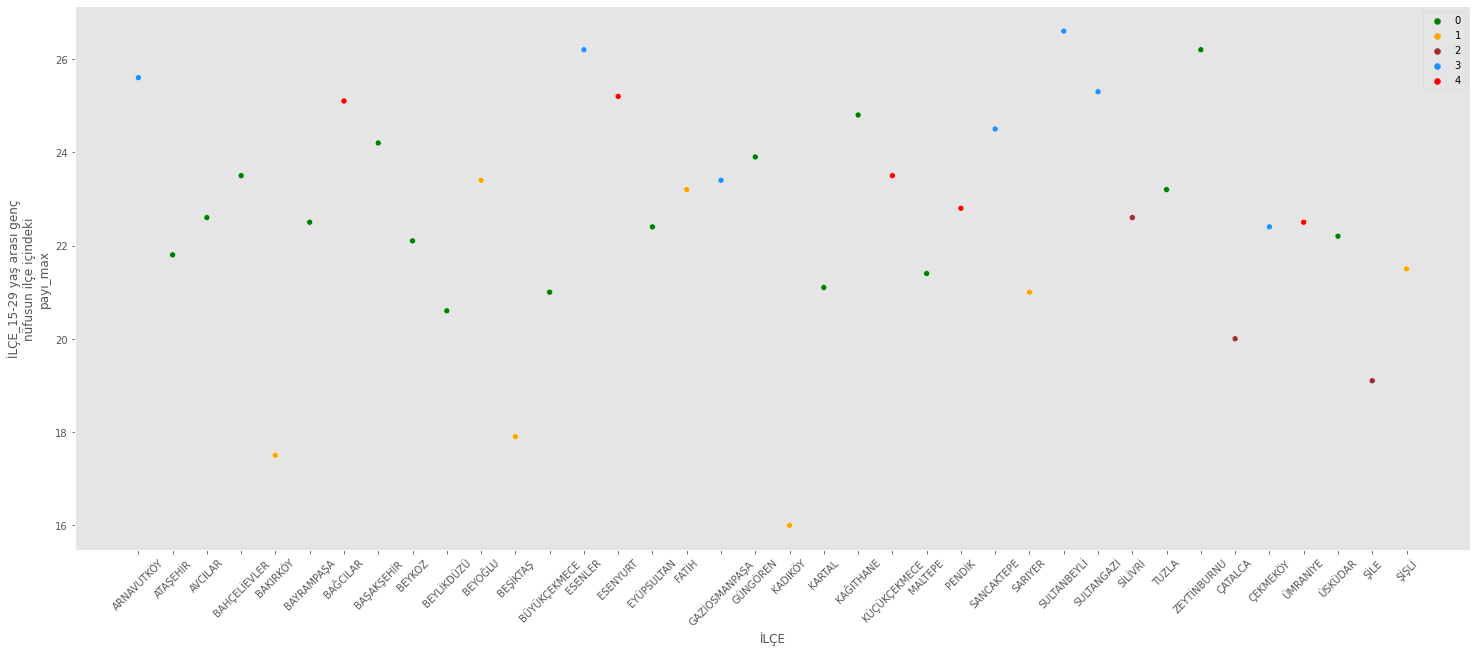

In [338]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=df_istanbul_district_only_agg,x="İLÇE",y="İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max",hue=cluster_labels, palette=['green','orange','brown','dodgerblue','red'])
plt.xticks(rotation=45)
plt.grid(False)

In [339]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(hier_model.children_)
linkage_matrix

array([[ 1.        ,  4.        ,  1.41421356,  2.        ],
       [11.        , 14.        ,  1.41421356,  2.        ],
       [32.        , 35.        ,  1.41421356,  2.        ],
       [30.        , 31.        ,  2.23606798,  2.        ],
       [33.        , 39.        ,  2.23606798,  3.        ],
       [ 0.        , 10.        ,  2.82842712,  2.        ],
       [ 5.        , 13.        ,  2.82842712,  2.        ],
       [ 8.        , 42.        ,  3.60555128,  3.        ],
       [18.        , 21.        ,  3.60555128,  2.        ],
       [23.        , 25.        ,  3.60555128,  2.        ],
       [34.        , 36.        ,  3.60555128,  2.        ],
       [ 2.        , 44.        ,  4.12310563,  4.        ],
       [ 3.        , 15.        ,  4.12310563,  2.        ],
       [12.        , 37.        ,  4.24264069,  3.        ],
       [16.        , 50.        ,  5.        ,  4.        ],
       [24.        , 26.        ,  5.        ,  2.        ],
       [28.        , 40.

In [340]:
linkage_df = pd.DataFrame(linkage_matrix,columns=["First Point","Second Point","Distance Between Points","How many points are there in the cluster?"])
linkage_df.head()

First Point  Second Point  Distance Between Points  \
0          1.0           4.0                 1.414214   
1         11.0          14.0                 1.414214   
2         32.0          35.0                 1.414214   
3         30.0          31.0                 2.236068   
4         33.0          39.0                 2.236068   

   How many points are there in the cluster?  
0                                        2.0  
1                                        2.0  
2                                        2.0  
3                                        2.0  
4                                        3.0

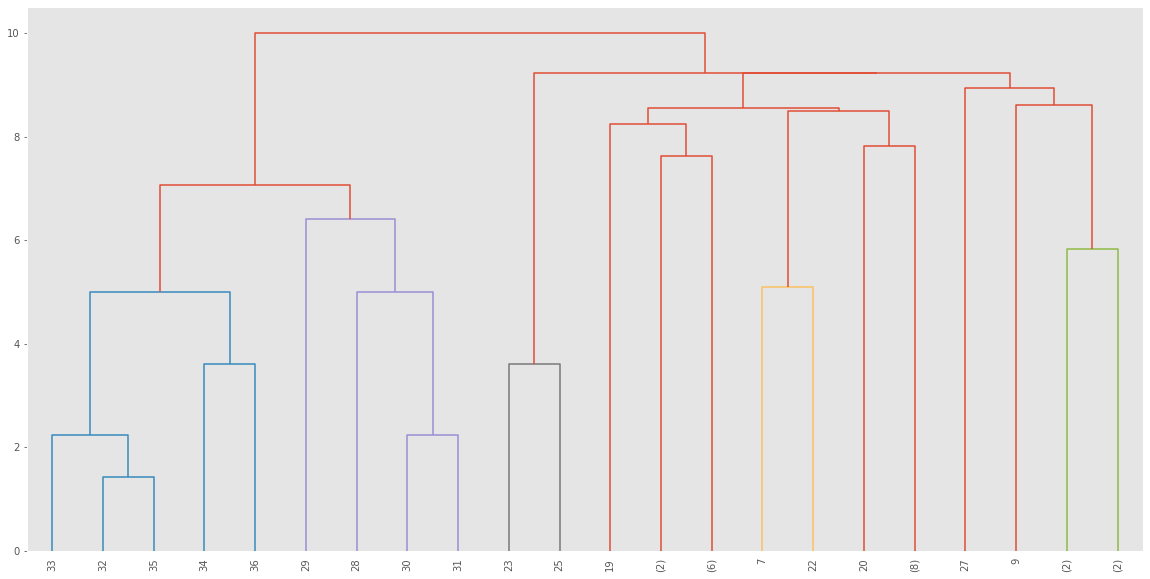

In [341]:
plt.figure(figsize=(20,10))
dendrogram = hierarchy.dendrogram(linkage_matrix,truncate_mode="level",p=5)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

In [352]:
df_istanbul_district_only_agg.head()

İLÇE  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
0    ARNAVUTKÖY                              21607.0   
1      ATAŞEHİR                              31612.0   
2       AVCILAR                              50617.0   
3  BAHÇELİEVLER                              82759.0   
4      BAKIRKÖY                              29809.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  \
0                                 13.7                             121012.2   
1                               5825.0                             345980.0   
2                               1800.0                             216556.0   
3                               7805.0                             569954.0   
4                               1794.0                             212747.0   

   İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
0         33177.0           413.0        261655.0                     41.1   
1         76344.0         10637.0        423372.0                      3.8   
2         71783.0         21621.0        435682.0                     12.5   
3         85464.0         26191.0        598454.0                      4.4   
4         37778.0          1667.0        222370.0                     13.3   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
0                     0.35                   450.48   
1                     0.42                    25.06   
2                     0.86                    41.99   
3                     0.53                    16.67   
4                     0.19                    29.76   

   İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  İLÇE_Genel Sıralama_max  \
0                                201000                      167   
1                                486000                        9   
2                                252000                       66   
3                                264000                       28   
4                                525000                        6   

   İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  İLÇE_Kademe_max  \
0                             36          0.771                2   
1                              6          3.545                1   
2                             29          1.640                1   
3                             17          2.423                1   
4                              4          4.465                1   

   İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                                                1.9       
1                                                2.7       
2                                                2.8       
3                                                3.8       
4                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                               11.1                  
3                                               11.3                  
4                                                8.6       

In [355]:
df_brew_analyze_district_only_agg.head()

İLÇE  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_max  \
0    ARNAVUTKÖY                                149.0   
1      ATAŞEHİR                              21205.0   
2       AVCILAR                               7623.0   
3  BAHÇELİEVLER                              19452.0   
4      BAKIRKÖY                              18610.0   

   İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_min  İLÇE_NÜFUS YOĞUNLUĞU (KİŞİ/KM2)_sum  \
0                                149.0                                596.0   
1                              11065.0                             203026.0   
2                               4657.0                              12280.0   
3                              19452.0                              38904.0   
4                               1794.0                              91124.0   

   İLÇE_NÜFUS_max  İLÇE_NÜFUS_min  İLÇE_NÜFUS_sum  İLÇE_YÜZÖLÇÜMÜ(KM2)_max  \
0          5242.0          5242.0         20968.0                     35.3   
1         76344.0         11428.0        526989.0                      3.6   
2         53209.0         21621.0         74830.0                     11.4   
3         61832.0         61832.0        123664.0                      3.2   
4         28206.0          5376.0        183952.0                     13.3   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_min  İLÇE_YÜZÖLÇÜMÜ(KM2)_sum  \
0                    35.30                   141.20   
1                     0.71                    38.11   
2                     2.80                    14.20   
3                     3.20                     6.40   
4                     0.29                    39.78   

   İLÇE_YÜZÖLÇÜMÜ(KM2)_count  İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max  \
0                          4                                201000   
1                         15                                486000   
2                          2                                252000   
3                          2                                264000   
4                          9                                525000   

   İLÇE_Genel Sıralama_max  İLÇE_il içindeki Sıralama_max  İLÇE_Skor_max  \
0                      167                             36          0.771   
1                        9                              6          3.545   
2                       66                             29          1.640   
3                       28                             17          2.423   
4                        6                              4          4.465   

   İLÇE_Kademe_max  İLÇE_İlçe toplam nüfusun\nİstanbul içindeki\npayı_max  \
0                2                                                1.9       
1                1                                                2.7       
2                1                                                2.8       
3                1                                                3.8       
4                1                                                1.5       

   İLÇE_İlçedeki 15-29 yaş\ngençlerin İstanbul\niçindeki payı_max  \
0                                                2.1                
1                                                2.6                
2                                                2.8                
3                                                3.9                
4                                                1.1                

   İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max  \
0                                               25.6            
1                                               21.8            
2                                               22.6            
3                                               23.5            
4                                               17.5            

   İLÇE_15-29 yaş arası Kadın\ngenç nüfusun ilçe\niçindeki payı_max  \
0                                               12.7                  
1                                               11.0                  
2                                      

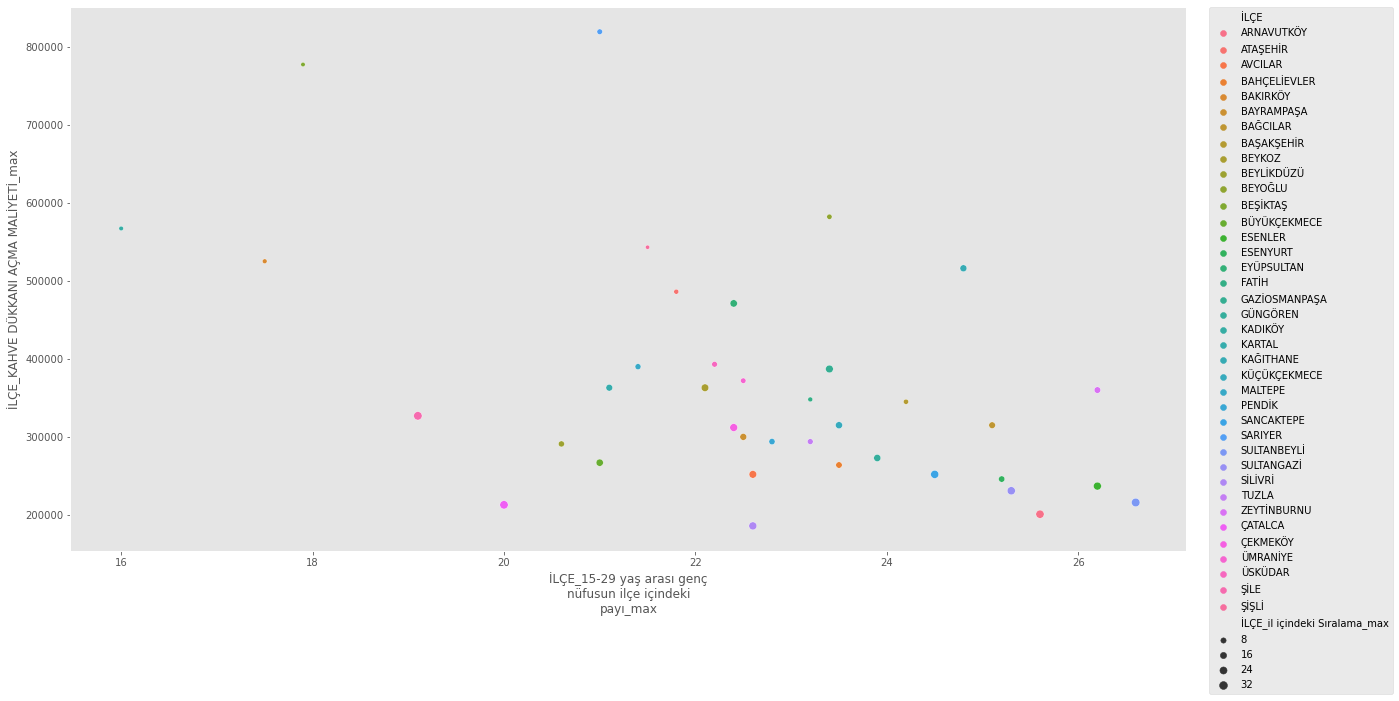

In [365]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_istanbul_district_only_agg,x='İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max',y='İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max',hue='İLÇE', size='İLÇE_il içindeki Sıralama_max')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);
plt.grid(False)
plt.show()

### in order to our analysis, location decision is positive correlated with young population, economical rank and area of district. some negative correlation features are cost, brewstation count, district total population.

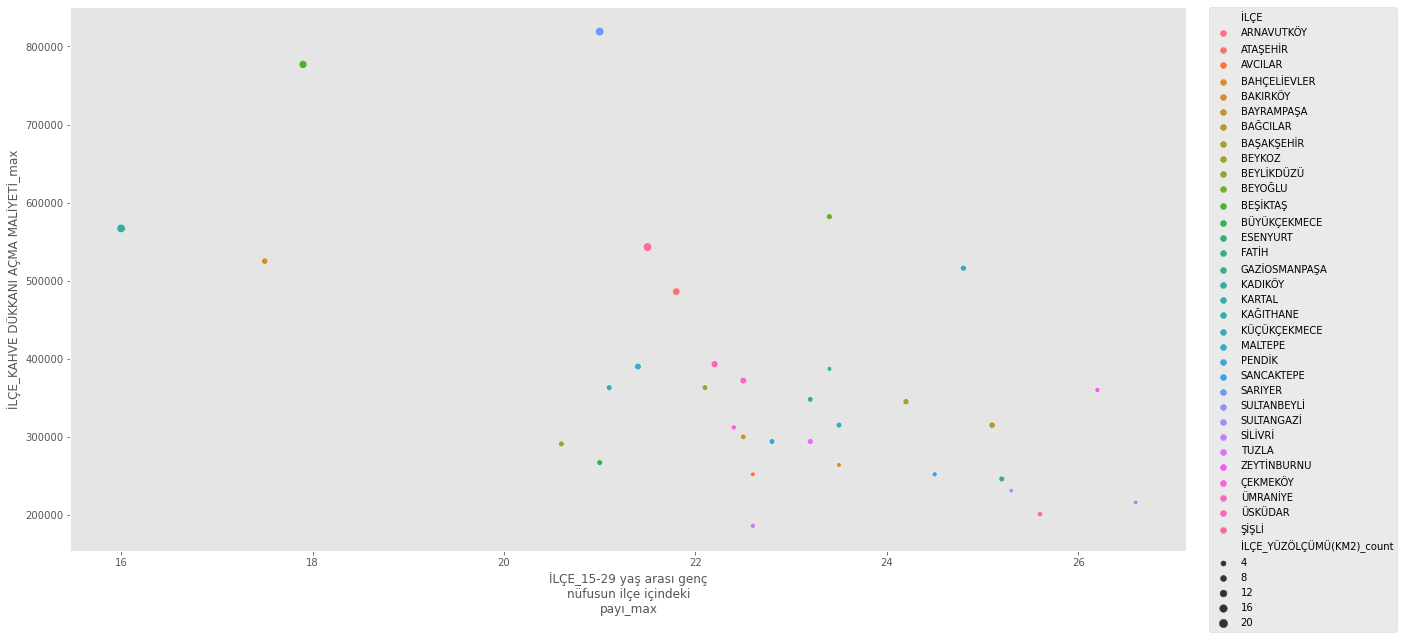

In [364]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_brew_analyze_district_only_agg,x='İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max',y='İLÇE_KAHVE DÜKKANI AÇMA MALİYETİ_max',hue='İLÇE', size='İLÇE_YÜZÖLÇÜMÜ(KM2)_count')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);
plt.grid(False)
plt.show()

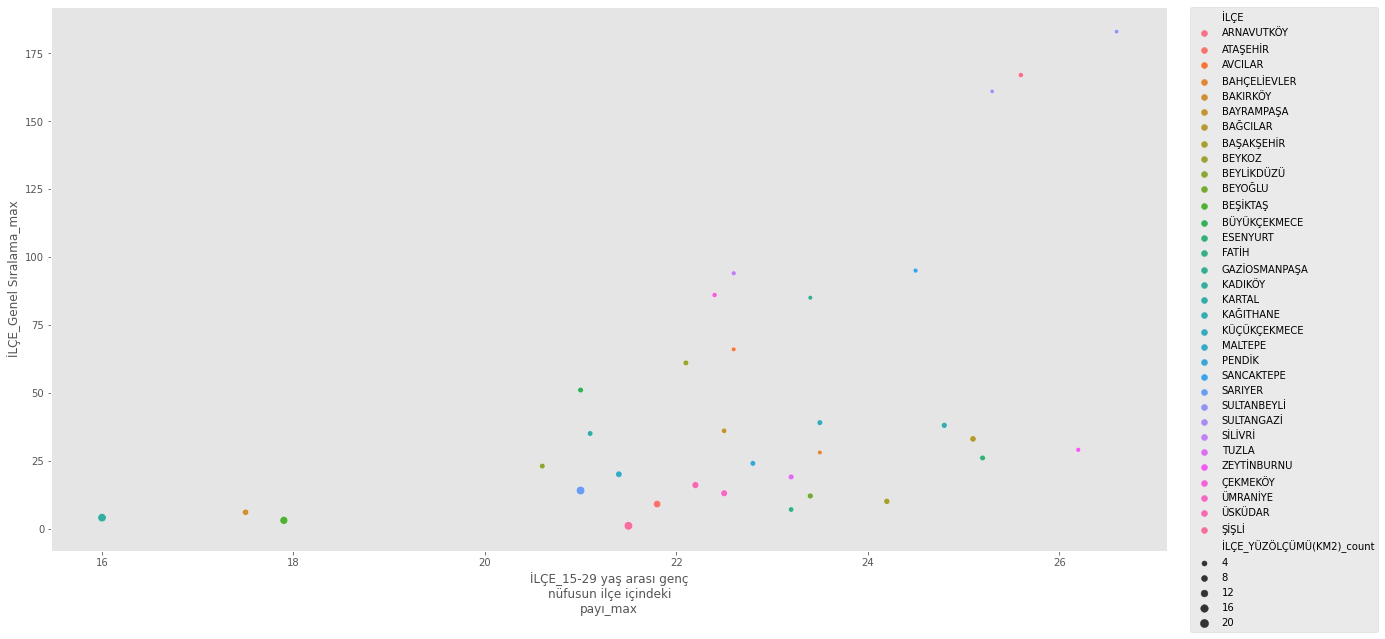

In [368]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_brew_analyze_district_only_agg,x='İLÇE_15-29 yaş arası genç\nnüfusun ilçe içindeki\npayı_max',y='İLÇE_Genel Sıralama_max',hue='İLÇE', size='İLÇE_YÜZÖLÇÜMÜ(KM2)_count')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);
plt.grid(False)
plt.show()

### when i check both brewstation and istanbul general plots, i decided to open cafes in çekmeköy, zeytinburnu, ümraniye, üsküdar, küçükçekmece, kartal, avcılar, bahçelievler and pendik. because these districts are highly young populated, costs are less, brewstation cafe counts lower and district economical rank is quite high. with this way company can maximize the profit. we did district base location analysis. i want to go deep and make analyses for neighbourhoods and even open address about brew stations. but i don't have time for it. for the continue of analys we could do for transportation data subway and bus stations, office counts and maybe mall counts would be effective in this problem i think. in this problem our budget was 3M TL and my district decisions costs 2,955,000 TL.

### External Data
- https://www.ito.org.tr/documents/Duyurular/2022_dokumanlar/lcelerin-sosyo-ekonomik-gelismislik-siralamasi-arastirmasi-sayfalar-silindi.pdf
- https://biraradadernek.org/wp-content/uploads/2022/07/TR-istanbulda-mahalle-bazli-genc-nufus-temsilleri.pdf
- https://tr.wikipedia.org/wiki/Kategori:%C4%B0l%C3%A7elerine_g%C3%B6re_%C4%B0stanbul%27daki_%C3%BCniversiteler